In [ ]:
!pip install transformers sentence-transformers
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import pandas as pd
file_path =r"/content/drive/MyDrive/Colab Notebooks/merged_subfolders/A_aligned_merged.csv"
df = pd.read_csv(file_path)
# df.head(70)
df.shape

(114466, 3)

In [ ]:
import csv
import pandas as pd

data = []

with open(file_path, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row) != 3:
            continue  # Skip malformed rows
        try:
            col1 = row[0].strip()
            col2 = row[1].strip()
            sim = float(row[2])
            data.append([col1, col2, sim])
        except ValueError:
            continue  # Skip if similarity is not a number

# Create DataFrame
df_clean = pd.DataFrame(data, columns=['COLUMN-1', 'COLUMN-2', 'SIMILARITY'])
df_clean.drop_duplicates(inplace=True)
df_clean.reset_index(drop=True, inplace=True)

print(f"✅ Loaded {len(df_clean)} valid records.")
print(df_clean.head(5))
df_clean.shape

✅ Loaded 114466 valid records.
                                            COLUMN-1  \
0  Stop taking A-Bex-SF Expectorant and inform yo...   
1  A-Bex-SF Expectorant is taken with or without ...   
2  If you do not find any relief in your symptoms...   
3  A-Bex-SF Expectorant may be unsafe to use duri...   
4  Information regarding the use of A-Bex-SF Expe...   

                                            COLUMN-2  SIMILARITY  
0  Stop taking A-Bex-SF Expectorant and inform yo...         1.0  
1  A-Bex-SF Expectorant is taken with or without ...         1.0  
2  If you do not find any relief in your symptoms...         1.0  
3  A-Bex-SF Expectorant may be unsafe to use duri...         1.0  
4  Information regarding the use of A-Bex-SF Expe...         1.0  


(114466, 3)

In [ ]:

try:
    # Read the cleaned CSV file
    df_aligned_A = pd.read_csv(file_path, encoding='utf-8-sig')

    print(f"✅ File loaded successfully: {file_path}")
    print(f"📊 Total records: {len(df_aligned_A)}")
    print("\n📌 First 5 records:")
    print(df_aligned_A.head())

except Exception as e:
    print(f"❌ Error reading the file: {e}")

✅ File loaded successfully: /content/drive/MyDrive/Colab Notebooks/merged_subfolders/A_aligned_merged.csv
📊 Total records: 114466

📌 First 5 records:
                                            COLUMN-1  \
0  Stop taking A-Bex-SF Expectorant and inform yo...   
1  A-Bex-SF Expectorant is taken with or without ...   
2  If you do not find any relief in your symptoms...   
3  A-Bex-SF Expectorant may be unsafe to use duri...   
4  Information regarding the use of A-Bex-SF Expe...   

                                            COLUMN-2  SIMILARITY  
0  Stop taking A-Bex-SF Expectorant and inform yo...         1.0  
1  A-Bex-SF Expectorant is taken with or without ...         1.0  
2  If you do not find any relief in your symptoms...         1.0  
3  A-Bex-SF Expectorant may be unsafe to use duri...         1.0  
4  Information regarding the use of A-Bex-SF Expe...         1.0  


In [ ]:
df_aligned_A.head(20)

COLUMN-1  \
0   Stop taking A-Bex-SF Expectorant and inform yo...   
1   A-Bex-SF Expectorant is taken with or without ...   
2   If you do not find any relief in your symptoms...   
3   A-Bex-SF Expectorant may be unsafe to use duri...   
4   Information regarding the use of A-Bex-SF Expe...   
5   The most common side effects are nausea, diarr...   
6   A-Bex-SF Expectorant also soothes your throat ...   
7   Limited data available suggests that dose adju...   
8   Ambroxol is a mucolytic which thins and loosen...   
9   It is not known whether it is safe to consume ...   
10  It is not recommended to use A-Bex-SF Expector...   
11  It is not known whether A-Bex-SF Expectorant a...   
12  A-Bex-SF Expectorant is indicated in the treat...   
13  A-Bex-SF Expectorant is probably safe to use i...   
14  A-Bex-SF Expectorant is probably safe to use i...   
15  A-Bex-SF Expectorant may be taken with or with...   
16  A-Bex-SF Expectorant relieves cough associated...   
17  A-Bex-SF Expectorant A-Bex-SF Expectorant is a...   
18  Cough <br>A-Bex-SF Expectorant gives relief fr...   
19                        Please consult your doctor.   

                                             COLUMN-2  SIMILARITY  
0   Stop taking A-Bex-SF Expectorant and inform yo...    1.000000  
1   A-Bex-SF Expectorant is taken with or without ...    1.000000  
2   If you do not find any relief in your symptoms...    1.000000  
3   A-Bex-SF Expectorant may be unsafe to use duri...    1.000000  
4   Information regarding the use of A-Bex-SF Expe...    1.000000  
5   The most common side effects are nausea, diarr...    1.000000  
6   A-Bex-SF Expectorant also soothes your throat ...    1.000000  
7   Limited data available suggests that dose adju...    1.000000  
8   Ambroxol is a mucolytic which thins and loosen...    1.000000  
9   It is not known whether it is safe to consume ...    1.000000  
10  It is not recommended to use A-Bex-SF Expector...    1.000000  
11  It is not known whether A-Bex-SF Expectorant a...    1.000000  
12  A-Bex-SF Expectorant is indicated in the treat...    1.000000  
13  A-Bex-SF Expectorant is probably safe to use i...    1.000000  
14  A-Bex-SF Expectorant is probably safe to use i...    1.000000  
15  A-Bex-SF Expectorant may be taken with or with...    1.000000  
16  A-Bex-SF Expectorant relieves cough associated...    1.000000  
17  A-Bex-SF Expectorant is a combination medicine...    0.962713  
18  खांसी  A-Bex-SF Expectorant gives relief from ...    0.951151  
19                     कृपया अपने डॉक्टर से सलाह लें.    0.936654

In [ ]:
df_aligned_A.shape

(114466, 3)

In [ ]:
# Check basic info
print(df_aligned_A.info())

# Check for nulls
print("\n🔍 Null values:\n", df_aligned_A.isnull().sum())

# Remove rows with nulls or empty strings
df_aligned_A = df_aligned_A.dropna()
df_aligned_A = df_aligned_A[
    (df_aligned_A['COLUMN-1'].str.strip() != '') &
    (df_aligned_A['COLUMN-2'].str.strip() != '')
].reset_index(drop=True)

# Check duplicate sentence pairs
duplicates = df_aligned_A[df_aligned_A.duplicated()]
print(f"🔁 Found {len(duplicates)} exact duplicate rows.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114466 entries, 0 to 114465
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   COLUMN-1    114466 non-null  object 
 1   COLUMN-2    114466 non-null  object 
 2   SIMILARITY  114466 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.6+ MB
None

🔍 Null values:
 COLUMN-1      0
COLUMN-2      0
SIMILARITY    0
dtype: int64
🔁 Found 0 exact duplicate rows.


In [ ]:
# Remove sentence pairs where English == Hindi
df_aligned_A = df_aligned_A[df_aligned_A['COLUMN-1'] != df_aligned_A['COLUMN-2']].reset_index(drop=True)
print(f" After removing identical sentence pairs: {df_aligned_A.shape[0]} rows remain.")


 After removing identical sentence pairs: 112146 rows remain.


In [ ]:
df_aligned_A.head(10)

COLUMN-1  \
0  A-Bex-SF Expectorant A-Bex-SF Expectorant is a...   
1  Cough <br>A-Bex-SF Expectorant gives relief fr...   
2                        Please consult your doctor.   
3             It may cause dizziness and sleepiness.   
4                             Shake well before use.   
5  If you are diabetic, monitor your blood glucos...   
6  Let your doctor know about all other medicatio...   
7  No, taking higher than the recommended dose ma...   
8  Make sure it is not consumed by pets, children...   
9  Store it according to the instructions mention...   

                                            COLUMN-2  SIMILARITY  
0  A-Bex-SF Expectorant is a combination medicine...    0.962713  
1  खांसी  A-Bex-SF Expectorant gives relief from ...    0.951151  
2                     कृपया अपने डॉक्टर से सलाह लें.    0.936654  
3                      इससे चक्कर और नींद आ सकती है.    0.912795  
4        इस्तेमाल करने के पहले अच्छी तरह से हिलायें.    0.912591  
5  अगर आपको डायबिटीज है, तो इस दवा को लेते समय नि...    0.900022  
6  डॉक्टर को आपके द्वारा ली जाने वाली अन्य सभी दव...    0.899882  
7  नहीं, डॉक्टर द्वारा निर्धारित खुराक से अधिक ले...    0.899286  
8  यह सुनिश्चित करें कि पालतू जानवरों, बच्चों और ...    0.898460  
9  पैक या लेबल पर दिए गए निर्देशों के अनुसार इसे ...    0.895108

In [ ]:
df_aligned_A.tail(10)

COLUMN-1  \
112136  It is also recommended to avoid exposure to su...   
112137  Dose adjustment of Azzotek 500mg Tablet may be...   
112138  Treatment of Bacterial infections <br>Azzotek ...   
112139  Azzotek 500mg Tablet should be used with cauti...   
112140  Yes, the use of Azzotek 500mg Tablet can cause...   
112141  Azzotek 500mg Tablet is taken orally, preferab...   
112142  Azzotek 500mg Tablet may be taken with or with...   
112143  Some people may get a fungal or yeast infectio...   
112144  Azzotek 500mg Tablet does not usually affect y...   
112145  Consult your doctor if they persist or if you’...   

                                                 COLUMN-2  SIMILARITY  
112136  सूर्य की रोशनी या टेनिंग बेड के संपर्क से बचने...    0.910990  
112137  एजोटेक 500mg टैबलेट की खुराक में बदलाव की आवश्...    0.910838  
112138  Treatment of Bacterial infections  एजोटेक 500m...    0.909491  
112139  गंभीर गुर्दे की बीमारी से पीड़ित मरीज सावधानी क...    0.907753  
112140  हां, एजोटेक 500mg टैबलेट का इस्तेमाल डायरिया (...    0.902010  
112141  एजोटेक 500mg टैबलेट को आमतौर पर खाने से एक घंट...    0.900284  
112142  एजोटेक 500mg टैबलेट को खाने के साथ या भूखे पेट...    0.880308  
112143  कुछ लोगों को एजोटेक 500mg टैबलेट लेने के बाद थ...    0.867885  
112144  एजोटेक 500mg टैबलेट के सेवन से आपकी गाड़ी चलाने...    0.857841  
112145  अगर साइड इफ़ेक्ट बने रहते हैं या लक्षण बिगड़ने ल...    0.676796

In [ ]:
pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=3c1735223d18d589ef08aeb014267aeba0ba6351df14b99184298ccbbb4eaa67
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [ ]:
import re
from tqdm import tqdm

def count_english_words(text):
    # Split by whitespace and punctuation
    words = re.findall(r'\b[a-zA-Z]+\b', text)
    # Filter out units like 'mg', 'ml', 'gm' that you want to keep (case-insensitive)
    units_to_keep = {'mg', 'ml', 'gm', 'g', 'mcg', 'kg', 'l'}
    count = 0
    for w in words:
        if w.lower() not in units_to_keep:
            count += 1
    return count

tqdm.pandas()
df_aligned_A['english_word_count_in_hindi'] = df_aligned_A['COLUMN-2'].progress_apply(count_english_words)

# Now filter rows where English word count (excluding units) in Hindi column is <= 1 (allow max 1 English word)
df_aligned_A = df_aligned_A[df_aligned_A['english_word_count_in_hindi'] <= 1].reset_index(drop=True)

# Drop helper column
df_aligned_A.drop(columns=['english_word_count_in_hindi'], inplace=True)

print(f"✅ Filtered dataset based on English words in Hindi side. Remaining rows: {df_aligned_A.shape[0]}")


100%|██████████| 112146/112146 [00:01<00:00, 56381.59it/s]

✅ Filtered dataset based on English words in Hindi side. Remaining rows: 109027


In [ ]:
df_aligned_A.head(40)

COLUMN-1  \
0                         Please consult your doctor.   
1              It may cause dizziness and sleepiness.   
2                              Shake well before use.   
3   If you are diabetic, monitor your blood glucos...   
4   Let your doctor know about all other medicatio...   
5   No, taking higher than the recommended dose ma...   
6   Make sure it is not consumed by pets, children...   
7   Store it according to the instructions mention...   
8   If you stop treatment too early your symptoms ...   
9   Inform your doctor if you have a history of th...   
10  Menthol is an organic compound which produces ...   
11  Never support self-medication or recommend you...   
12  Along with medications, drink enough luke warm...   
13  Before taking this medicine, you should tell y...   
14  This medicine can also cause sleepiness, so do...   
15  Most of these are temporary and usually resolv...   
16  Avoid drinking alcohol while taking this medic...   
17  Avoid the medication if you have pre-existing ...   
18                    Dispose of the unused medicine.   
19  Guaifenesin is an expectorant which works by d...   
20  You should keep taking this medicine for as lo...   
21  It thins the mucus in the nose and windpipe, m...   
22  Contact your doctor straight away if you are a...   
23  This reduces the frequency of coughing and mak...   
24  Terbutaline is a bronchodilator which relaxs t...   
25  It is beneficial to have plenty of fluids whil...   
26  Keep this medicine in the container it came in...   
27  Although there are limited studies in humans, ...   
28  Do not drive or do anything that requires ment...   
29  This medicine also relieves throat irritation ...   
30  The dose you are given will depend on your con...   
31  Consult your doctor if they persist or if you’...   
32  Your doctor will weigh the benefits and any po...   
33  It also makes it easier for air to move in and...   
34  Measure it with a measuring cup and take it by...   
35  Most side effects do not require any medical a...   
36         Check the label for directions before use.   
37  Do not drive if you experience any symptoms th...   
38  A C Ford 100mg Tablet is usually prescribed fo...   
39            A C Ford 100mg Tablet is an antibiotic.   

                                             COLUMN-2  SIMILARITY  
0                      कृपया अपने डॉक्टर से सलाह लें.    0.936654  
1                       इससे चक्कर और नींद आ सकती है.    0.912795  
2         इस्तेमाल करने के पहले अच्छी तरह से हिलायें.    0.912591  
3   अगर आपको डायबिटीज है, तो इस दवा को लेते समय नि...    0.900022  
4   डॉक्टर को आपके द्वारा ली जाने वाली अन्य सभी दव...    0.899882  
5   नहीं, डॉक्टर द्वारा निर्धारित खुराक से अधिक ले...    0.899286  
6   यह सुनिश्चित करें कि पालतू जानवरों, बच्चों और ...    0.898460  
7   पैक या लेबल पर दिए गए निर्देशों के अनुसार इसे ...    0.895108  
8   अगर आप इलाज को जल्दी रोकते हैं तो आपके लक्षण व...    0.894206  
9   अगर थायरॉइड या हृदय रोग का इतिहास है तो अपने ड...    0.893313  
10  मेन्थोल एक ऑर्गेनिक यौगिक है जो ठंडकनुमा संवेद...    0.891516  
11  सेल्फ-मेडिकेशन का समर्थन न करें या किसी दूसरे ...    0.890074  
12  बीमारी के लक्षणों से आराम के लिए दवा के साथ-सा...    0.884060  
13  इस दवा को लेने से पहले, अगर आप गर्भवती हैं, गर...    0.880606  
14  इस दवा से नींद आ सकती है, इसलिए जब तक आप यह ना...    0.879659  
15  इनमें से अधिकांश अस्थायी होते हैं और आमतौर पर ...    0.867179  
16  यह दवा लेने के दौरान शराब पीने से बचें क्योंकि...    0.863727  
17  अगर आपके पास पहले से मौजूद इस्केमिक हृदय रोग, ...    0.862701  
18              इस्तेमाल न किए गए दवा को नष्ट कर दें.    0.859725  
19  गुआइफेनसिन एक ऐसा एक्सपेक्टोरेंट है जो श्वसन म...    0.858701  
20  डॉक्टर द्वारा निर्धारित अवधि तक इस दवा का सेवन...    0.854003  
21  यह नाक और विंडपाइप में बलगम को पतला करता है, ज...    0.851450  
22  अगर आप इनमें से किसी भी साइड इफेक्ट को लेकर चि...    0.848004  
23  यह खांसी की फ्रीक्वेंसी को कम करता है और आपको ...    0.841503  
24  टर्

In [ ]:
df_aligned_A.tail(40)

COLUMN-1  \
108987  Azyxin Plus 250 mg/75 mg Tablet should be used...   
108988  Take Azyxin Plus 250 mg/75 mg Tablet as soon a...   
108989  Dose adjustment of Azyxin Plus 250 mg/75 mg Ta...   
108990  No, do not stop taking Azyxin Plus 250 mg/75 m...   
108991  Treatment of Respiratory tract infection <br>A...   
108992  It is not known whether Azyxin Plus 250 mg/75 ...   
108993  Azyxin Plus 250 mg/75 mg Tablet may be taken w...   
108994  Azyxin Plus 250 mg/75 mg Tablet Azyxin Plus 25...   
108995  Azyxin Plus 250 mg/75 mg Tablet is a combinati...   
108996  Consult your doctor if they persist or if you’...   
108997  Azithromycin and Ambroxol which treat respirat...   
108998  Azzotek 500mg Tablet starts working within a f...   
108999             Azzotek 500mg Tablet is an antibiotic.   
109000  Azzotek 500mg Tablet is safe to use during bre...   
109001  Do not take antacids 2 hours before or after t...   
109002  Azzotek 500mg Tablet is usually prescribed onc...   
109003  Antibiotics such as Azzotek 500mg Tablet can k...   
109004  Azzotek 500mg Tablet is an effective antibioti...   
109005  Also, inform your doctor if you get a white pa...   
109006  Stop taking Azzotek 500mg Tablet and inform yo...   
109007  However, you must take Azzotek 500mg Tablet ex...   
109008  Azzotek 500mg Tablet is generally considered s...   
109009  It is unsafe to consume alcohol with Azzotek 5...   
109010  Azzotek 500mg Tablet Azzotek 500mg Tablet is a...   
109011  You should inform your doctor if you do not no...   
109012  Compared to other antibiotics, Azzotek 500mg T...   
109013  Compared to other antibiotics, Azzotek 500mg T...   
109014  Azzotek 500mg Tablet should be used with cauti...   
109015  Generally, it is recommended that patients tak...   
109016  Azzotek 500mg Tablet is not necessarily given ...   
109017  Azzotek 500mg Tablet is safe if used at prescr...   
109018  It is also recommended to avoid exposure to su...   
109019  Dose adjustment of Azzotek 500mg Tablet may be...   
109020  Azzotek 500mg Tablet should be used with cauti...   
109021  Yes, the use of Azzotek 500mg Tablet can cause...   
109022  Azzotek 500mg Tablet is taken orally, preferab...   
109023  Azzotek 500mg Tablet may be taken with or with...   
109024  Some people may get a fungal or yeast infectio...   
109025  Azzotek 500mg Tablet does not usually affect y...   
109026  Consult your doctor if they persist or if you’...   

                                                 COLUMN-2  SIMILARITY  
108987  गंभीर गुर्दे की बीमारी से पीड़ित मरीज सावधानी क...    0.937751  
108988  जैसे ही याद आए, एज़ीक्सिन प्लस 250 एमजी/75 एमज...    0.936198  
108989  एज़ीक्सिन प्लस 250 एमजी/75 एमजी टैबलेट की खुरा...    0.933998  
108990  नहीं, अगर आपको बेहतर महसूस होने लगा है तो भी ए...    0.923319  
108991  श्वास नली में संक्रमण का इलाज  एज़ीक्सिन प्लस ...    0.917022  
108992  यह ज्ञात नहीं है कि एज़ीक्सिन प्लस 250 एमजी/75...    0.916081  
108993  एज़ीक्सिन प्लस 250 एमजी/75 एमजी टैबलेट को खाने...    0.913129  
108994  एज़ीक्सिन प्लस 250 एमजी/75 एमजी टैबलेट एक कॉम्...    0.911015  
108995  एज़ीक्सिन प्लस 250 एमजी/75 एमजी टैबलेट दो दवाओ...    0.831013  
108996  अगर साइड इफ़ेक्ट बने रहते हैं या लक्षण बिगड़ने ल...    0.763377  
108997  एज़ीक्सिन प्लस 250 एमजी/75 एमजी टैबलेट दो दवाओ...    0.618298  
108998  एजोटेक 500mg टैबलेट इसे लेने के कुछ घंटों के भ...    0.948002  
108999             एजोटेक 500mg टैबलेट एक एंटीबायोटिक है.    0.939524  
109000  स्तनपान के दौरान एजोटेक 500mg टैबलेट का इस्तेम...    0.929740  
109001  एजोटेक 500mg टैबलेट लेने के कम से कम 2 घंटे पह...    0.928224  
109002  एजोटेक 500mg टैबलेट को आमतौर पर रोज़ एक बार लि...    0.923784  
109003  एजोटेक 500mg टैबलेट जैसे एंटीबायोटिक्स थ्रश की...    0.922710  
109004  एजोटेक 500mg टैबलेट एक प्रभावी एंटीबायोटिक है ...    0.922231  
109005  इसके अलावा, अगर आपको एजोटेक 500mg टैबलेट लेने ...    0.921674  
109006  अगर आपको रैशेज, चेहरे, गले या जीभ में सूजन या ...    0.921309  
109007  हालांकि, आपको एजोटेक 500mg 

In [ ]:
import re

# Define a regex to detect HTML/XML-like tags
html_tag_pattern = re.compile(r'<[^>]+>')

# Filter rows where COLUMN-2 contains HTML/XML tags
html_rows = df_aligned_A[df_aligned_A['COLUMN-2'].str.contains(html_tag_pattern)]

print(f"⚠️ Found {len(html_rows)} rows with HTML/XML tags or suspicious content in Hindi column.")
display(html_rows.head(40))  # Show first few for inspection


⚠️ Found 227 rows with HTML/XML tags or suspicious content in Hindi column.


COLUMN-1  \
2065   <br /> Avoid taking hot tea, coffee, spicy foo...   
2072   Some healthy tips to prevent acidity from happ...   
2227   Aarpred 8mg Tablet is to be taken with food.<b...   
2390   AB Cin 250mg Tablet may be taken with or witho...   
2418   AB Cin 500mg Tablet may be taken with or witho...   
2710   Abact 250mg Tablet may be taken with or withou...   
2737   Abact 500mg Tablet may be taken with or withou...   
2759   Abactum 250mg Tablet is to be taken with food....   
2795   Abactum 500mg Tablet is to be taken with food....   
3043   Abanor GN 400mg/10mg Tablet Abanor GN 400mg/10...   
4739   Abifabin 300mg/500mcg Capsule Abifabin 300mg/5...   
4788   Abifine 250 Tablet may be taken with or withou...   
5108   Abinex 500 Tablet may be taken with or without...   
5263   <br /> Avoid excessive intake of carbonated be...   
5265   Some healthy tips to prevent acidity from happ...   
5308   Abisef 500mg Tablet is to be taken with food.<...   
5627   If you are taking Ablevo 5 Tablet during the d...   
5847   Abmetop 25 XL Tablet may be taken with or with...   
6402   Abonex 300mg/500mcg Tablet Abonex 300mg/500mcg...   
7894   If you are taking Accizine 5mg Tablet DT durin...   
10168  Acef 250mg Tablet is to be taken with food.<br...   
14575             Some healthy tips to prevent seizures:   
16346  However, if need arises, such as for treating ...   
16629  You must not use Aciglow C 1% Gel if you are a...   
16726  You must not use Aciherpin Cream if you are al...   
17254  Acip 500mg Tablet may be taken with or without...   
17308  However, if need arises, such as for treating ...   
17465  You must not use Acirax Cream if you are aller...   
17702  You must not use Acivir Cream if you are aller...   
17731  <br /> Avoid taking hot tea, coffee, spicy foo...   
18593  Aclomet-XL 25 Tablet may be taken with or with...   
18621  Aclomet-XL 50 Tablet may be taken with or with...   
19890  You must not use Acneclin Gel if you are aller...   
19973  You must not use Acneris Cream if you are alle...   
19998  You must not use Acnesol 1% solution if you ar...   
20072  You must not use Acnesone Gel if you are aller...   
20153  You must not use Acnewar Gel if you are allerg...   
20470  Acobal G 300mg/500mcg Capsule Acobal G 300mg/5...   
20624  If you are taking Acolate-L 5mg Tablet during ...   
20688  Acolef 750mg Tablet may be taken with or witho...   

                                                COLUMN-2  SIMILARITY  
2065   एसिडिटी रोकने के लिए कुछ स्वास्थ्य टिप्स:<br /...    0.768891  
2072   एसिडिटी रोकने के लिए कुछ स्वास्थ्य टिप्स:<br /...    0.632870  
2227   <br>आर्परेड 8mg टैबलेट के साथ सोडियम युक्त आहा...    0.893830  
2390   <br>एबी सिन 250mg टैबलेट के साथ दूध, चीज, दही,...    0.832238  
2418   <br>एबी सिन 500mg टैबलेट के साथ दूध, चीज, दही,...    0.846652  
2710   <br>अबैक्ट 250mg टैबलेट के साथ कैफीन और चॉकलेट...    0.835268  
2737   <br>अबैक्ट 500mg टैबलेट के साथ कैफीन और चॉकलेट...    0.833969  
2759   <br>अबैक्टम 250mg टैबलेट के साथ सोडियम युक्त आ...    0.897490  
2795   <br>अबैक्टम 500mg टैबलेट के साथ सोडियम युक्त आ...    0.891126  
3043   एबेनोर जीएन 400mg/10mg टैबलेट एक कॉम्बिनेशन दव...    0.848156  
4739   एबिफाबिन 300mg/500mcg कैप्सूल एक कॉम्बिनेशन दव...    0.869155  
4788   <br>कैफीन और चॉकलेट के साथ-साथ कैफीन और चाकलेट...    0.849796  
5108   <br>कैफीन और चॉकलेट के साथ-साथ कैफीन और चाकलेट...    0.821689  
5263   एसिडिटी रोकने के लिए कुछ स्वास्थ्य टिप्स:<br /...    0.751257  
5265   एसिडिटी रोकने के लिए कुछ स्वास्थ्य टिप्स:<br /...    0.564772  
5308   <br>अबिस्फ 500mg टैबलेट के साथ सोडियम युक्त आह...    0.903593  
5627   अगर आप दिन के समय <ingredient1> ले रहे हैं, तो...    0.770469  
5847   <br>अधिक फैट वाले भोजन जैसे ऑलिव ऑयल, नट और सी...    0.820825  
6402   अबोनेक्स 300mg/500mcg टैबलेट एक कॉम्बिनेशन दवा...    0.873418  
7894   अगर आप दिन के समय <ingredient1> ले रहे हैं, तो...    0.797791  
10168  <br>एसेफ 250mg टैबलेट के साथ सोडियम युक्त आहार...    0.883587  
14575  दौरे को रोकने के ल

In [ ]:
import re

html_tag_pattern = re.compile(r'<[^>]+>')

# Check HTML/XML tags in English column
html_rows_source = df_aligned_A[df_aligned_A['COLUMN-1'].str.contains(html_tag_pattern)]

print(f"🔎 Found {len(html_rows_source)} rows with HTML/XML tags in the English side.")


🔎 Found 7251 rows with HTML/XML tags in the English side.


In [ ]:
import re

# Define pattern to match HTML/XML tags
html_tag_pattern = re.compile(r'<[^>]+>')

# Clean tags from both source (English) and target (Hindi)
df_aligned_A['COLUMN-1'] = df_aligned_A['COLUMN-1'].str.replace(html_tag_pattern, '', regex=True)
df_aligned_A['COLUMN-2'] = df_aligned_A['COLUMN-2'].str.replace(html_tag_pattern, '', regex=True)

print("✅ Removed HTML/XML tags from both columns.")


✅ Removed HTML/XML tags from both columns.


In [ ]:
# Display first 10 cleaned rows
print(df_aligned_A[['COLUMN-1', 'COLUMN-2']].head(10))


                                            COLUMN-1  \
0                        Please consult your doctor.   
1             It may cause dizziness and sleepiness.   
2                             Shake well before use.   
3  If you are diabetic, monitor your blood glucos...   
4  Let your doctor know about all other medicatio...   
5  No, taking higher than the recommended dose ma...   
6  Make sure it is not consumed by pets, children...   
7  Store it according to the instructions mention...   
8  If you stop treatment too early your symptoms ...   
9  Inform your doctor if you have a history of th...   

                                            COLUMN-2  
0                     कृपया अपने डॉक्टर से सलाह लें.  
1                      इससे चक्कर और नींद आ सकती है.  
2        इस्तेमाल करने के पहले अच्छी तरह से हिलायें.  
3  अगर आपको डायबिटीज है, तो इस दवा को लेते समय नि...  
4  डॉक्टर को आपके द्वारा ली जाने वाली अन्य सभी दव...  
5  नहीं, डॉक्टर द्वारा निर्धारित खुराक से अधिक ले... 

In [ ]:
df_aligned_A.head(20)

COLUMN-1  \
0                         Please consult your doctor.   
1              It may cause dizziness and sleepiness.   
2                              Shake well before use.   
3   If you are diabetic, monitor your blood glucos...   
4   Let your doctor know about all other medicatio...   
5   No, taking higher than the recommended dose ma...   
6   Make sure it is not consumed by pets, children...   
7   Store it according to the instructions mention...   
8   If you stop treatment too early your symptoms ...   
9   Inform your doctor if you have a history of th...   
10  Menthol is an organic compound which produces ...   
11  Never support self-medication or recommend you...   
12  Along with medications, drink enough luke warm...   
13  Before taking this medicine, you should tell y...   
14  This medicine can also cause sleepiness, so do...   
15  Most of these are temporary and usually resolv...   
16  Avoid drinking alcohol while taking this medic...   
17  Avoid the medication if you have pre-existing ...   
18                    Dispose of the unused medicine.   
19  Guaifenesin is an expectorant which works by d...   

                                             COLUMN-2  SIMILARITY  
0                      कृपया अपने डॉक्टर से सलाह लें.    0.936654  
1                       इससे चक्कर और नींद आ सकती है.    0.912795  
2         इस्तेमाल करने के पहले अच्छी तरह से हिलायें.    0.912591  
3   अगर आपको डायबिटीज है, तो इस दवा को लेते समय नि...    0.900022  
4   डॉक्टर को आपके द्वारा ली जाने वाली अन्य सभी दव...    0.899882  
5   नहीं, डॉक्टर द्वारा निर्धारित खुराक से अधिक ले...    0.899286  
6   यह सुनिश्चित करें कि पालतू जानवरों, बच्चों और ...    0.898460  
7   पैक या लेबल पर दिए गए निर्देशों के अनुसार इसे ...    0.895108  
8   अगर आप इलाज को जल्दी रोकते हैं तो आपके लक्षण व...    0.894206  
9   अगर थायरॉइड या हृदय रोग का इतिहास है तो अपने ड...    0.893313  
10  मेन्थोल एक ऑर्गेनिक यौगिक है जो ठंडकनुमा संवेद...    0.891516  
11  सेल्फ-मेडिकेशन का समर्थन न करें या किसी दूसरे ...    0.890074  
12  बीमारी के लक्षणों से आराम के लिए दवा के साथ-सा...    0.884060  
13  इस दवा को लेने से पहले, अगर आप गर्भवती हैं, गर...    0.880606  
14  इस दवा से नींद आ सकती है, इसलिए जब तक आप यह ना...    0.879659  
15  इनमें से अधिकांश अस्थायी होते हैं और आमतौर पर ...    0.867179  
16  यह दवा लेने के दौरान शराब पीने से बचें क्योंकि...    0.863727  
17  अगर आपके पास पहले से मौजूद इस्केमिक हृदय रोग, ...    0.862701  
18              इस्तेमाल न किए गए दवा को नष्ट कर दें.    0.859725  
19  गुआइफेनसिन एक ऐसा एक्सपेक्टोरेंट है जो श्वसन म...    0.858701

In [ ]:
import re

# Pattern to detect HTML/XML tags
html_tag_pattern = re.compile(r'<[^>]+>')

# Check for rows where COLUMN-1 or COLUMN-2 contains HTML/XML tags
html_rows_combined = df_aligned_A[
    df_aligned_A['COLUMN-1'].str.contains(html_tag_pattern) |
    df_aligned_A['COLUMN-2'].str.contains(html_tag_pattern)
]

print(f"⚠️ Found {len(html_rows_combined)} rows where either English or Hindi column contains HTML/XML tags.")
display(html_rows_combined.head(10))  # Show a few examples


⚠️ Found 0 rows where either English or Hindi column contains HTML/XML tags.


Empty DataFrame
Columns: [COLUMN-1, COLUMN-2, SIMILARITY]
Index: []

In [ ]:
df_aligned_A.head(100)

COLUMN-1  \
0                         Please consult your doctor.   
1              It may cause dizziness and sleepiness.   
2                              Shake well before use.   
3   If you are diabetic, monitor your blood glucos...   
4   Let your doctor know about all other medicatio...   
..                                                ...   
95                        Please consult your doctor.   
96  Use of A Clo SP Tablet is not recommended in p...   
97  Taking the medicine regularly at the right tim...   
98  A Clo SP Tablet should be taken in the dose an...   
99  Aceclofenac is a non-steroidal anti-inflammato...   

                                             COLUMN-2  SIMILARITY  
0                      कृपया अपने डॉक्टर से सलाह लें.    0.936654  
1                       इससे चक्कर और नींद आ सकती है.    0.912795  
2         इस्तेमाल करने के पहले अच्छी तरह से हिलायें.    0.912591  
3   अगर आपको डायबिटीज है, तो इस दवा को लेते समय नि...    0.900022  
4   डॉक्टर को आपके द्वारा ली जाने वाली अन्य सभी दव...    0.899882  
..                                                ...         ...  
95                     कृपया अपने डॉक्टर से सलाह लें.    0.936654  
96  किडनी की गंभीर बीमारी से पीड़ित मरीजों को ए क्...    0.935467  
97  दवा को नियमित रूप से सही समय पर लेने से इसकी प...    0.931324  
98  ए क्लो एसपी टैबलेट को आपके डॉक्टर द्वारा बताई ...    0.929983  
99  एसेक्लोफेनाक एक नॉन स्टेरॉयडल एंटी-इंफ्लेमेटरी...    0.928009  

[100 rows x 3 columns]

In [ ]:
# 1. Duplicate sentence pairs (exact same English-Hindi combination)
duplicate_pairs = df_aligned_A.duplicated(subset=['COLUMN-1', 'COLUMN-2']).sum()

# 2. Duplicate sentences in the English column
duplicate_english = df_aligned_A['COLUMN-1'].duplicated().sum()

# 3. Duplicate sentences in the Hindi column
duplicate_hindi = df_aligned_A['COLUMN-2'].duplicated().sum()

# Output results
print("🔍 Duplicate Summary:")
print(f"🔁 Duplicate sentence pairs (COLUMN-1 + COLUMN-2): {duplicate_pairs}")
print(f"🔁 Duplicates in source (COLUMN-1 / English): {duplicate_english}")
print(f"🔁 Duplicates in target (COLUMN-2 / Hindi): {duplicate_hindi}")


🔍 Duplicate Summary:
🔁 Duplicate sentence pairs (COLUMN-1 + COLUMN-2): 1920
🔁 Duplicates in source (COLUMN-1 / English): 10437
🔁 Duplicates in target (COLUMN-2 / Hindi): 19669


In [ ]:
# Duplicate sentence pairs (both columns)
duplicate_pair_rows = df_aligned_A[df_aligned_A.duplicated(subset=['COLUMN-1', 'COLUMN-2'], keep=False)]

# Duplicate English sentences
duplicate_english_rows = df_aligned_A[df_aligned_A['COLUMN-1'].duplicated(keep=False)]

# Duplicate Hindi sentences
duplicate_hindi_rows = df_aligned_A[df_aligned_A['COLUMN-2'].duplicated(keep=False)]

print(f"🔁 Duplicate sentence pairs count: {len(duplicate_pair_rows)}")
print(f"🔁 Duplicate English sentences count: {len(duplicate_english_rows)}")
print(f"🔁 Duplicate Hindi sentences count: {len(duplicate_hindi_rows)}")

# Show first 10 duplicate pairs
print("\n--- Duplicate Sentence Pairs (English + Hindi) ---")
display(duplicate_pair_rows.head(10))

# Show first 10 duplicate English sentences
print("\n--- Duplicate English Sentences ---")
display(duplicate_english_rows.head(10))

# Show first 10 duplicate Hindi sentences
print("\n--- Duplicate Hindi Sentences ---")
display(duplicate_hindi_rows.head(10))


🔁 Duplicate sentence pairs count: 3838
🔁 Duplicate English sentences count: 14425
🔁 Duplicate Hindi sentences count: 29873

--- Duplicate Sentence Pairs (English + Hindi) ---


COLUMN-1  \
0                         Please consult your doctor.   
2                              Shake well before use.   
4   Let your doctor know about all other medicatio...   
6   Make sure it is not consumed by pets, children...   
7   Store it according to the instructions mention...   
8   If you stop treatment too early your symptoms ...   
13  Before taking this medicine, you should tell y...   
14  This medicine can also cause sleepiness, so do...   
15  Most of these are temporary and usually resolv...   
16  Avoid drinking alcohol while taking this medic...   

                                             COLUMN-2  SIMILARITY  
0                      कृपया अपने डॉक्टर से सलाह लें.    0.936654  
2         इस्तेमाल करने के पहले अच्छी तरह से हिलायें.    0.912591  
4   डॉक्टर को आपके द्वारा ली जाने वाली अन्य सभी दव...    0.899882  
6   यह सुनिश्चित करें कि पालतू जानवरों, बच्चों और ...    0.898460  
7   पैक या लेबल पर दिए गए निर्देशों के अनुसार इसे ...    0.895108  
8   अगर आप इलाज को जल्दी रोकते हैं तो आपके लक्षण व...    0.894206  
13  इस दवा को लेने से पहले, अगर आप गर्भवती हैं, गर...    0.880606  
14  इस दवा से नींद आ सकती है, इसलिए जब तक आप यह ना...    0.879659  
15  इनमें से अधिकांश अस्थायी होते हैं और आमतौर पर ...    0.867179  
16  यह दवा लेने के दौरान शराब पीने से बचें क्योंकि...    0.863727


--- Duplicate English Sentences ---


COLUMN-1  \
0                         Please consult your doctor.   
1              It may cause dizziness and sleepiness.   
2                              Shake well before use.   
3   If you are diabetic, monitor your blood glucos...   
4   Let your doctor know about all other medicatio...   
6   Make sure it is not consumed by pets, children...   
7   Store it according to the instructions mention...   
8   If you stop treatment too early your symptoms ...   
9   Inform your doctor if you have a history of th...   
10  Menthol is an organic compound which produces ...   

                                             COLUMN-2  SIMILARITY  
0                      कृपया अपने डॉक्टर से सलाह लें.    0.936654  
1                       इससे चक्कर और नींद आ सकती है.    0.912795  
2         इस्तेमाल करने के पहले अच्छी तरह से हिलायें.    0.912591  
3   अगर आपको डायबिटीज है, तो इस दवा को लेते समय नि...    0.900022  
4   डॉक्टर को आपके द्वारा ली जाने वाली अन्य सभी दव...    0.899882  
6   यह सुनिश्चित करें कि पालतू जानवरों, बच्चों और ...    0.898460  
7   पैक या लेबल पर दिए गए निर्देशों के अनुसार इसे ...    0.895108  
8   अगर आप इलाज को जल्दी रोकते हैं तो आपके लक्षण व...    0.894206  
9   अगर थायरॉइड या हृदय रोग का इतिहास है तो अपने ड...    0.893313  
10  मेन्थोल एक ऑर्गेनिक यौगिक है जो ठंडकनुमा संवेद...    0.891516


--- Duplicate Hindi Sentences ---


COLUMN-1  \
0                        Please consult your doctor.   
1             It may cause dizziness and sleepiness.   
2                             Shake well before use.   
3  If you are diabetic, monitor your blood glucos...   
4  Let your doctor know about all other medicatio...   
5  No, taking higher than the recommended dose ma...   
6  Make sure it is not consumed by pets, children...   
7  Store it according to the instructions mention...   
8  If you stop treatment too early your symptoms ...   
9  Inform your doctor if you have a history of th...   

                                            COLUMN-2  SIMILARITY  
0                     कृपया अपने डॉक्टर से सलाह लें.    0.936654  
1                      इससे चक्कर और नींद आ सकती है.    0.912795  
2        इस्तेमाल करने के पहले अच्छी तरह से हिलायें.    0.912591  
3  अगर आपको डायबिटीज है, तो इस दवा को लेते समय नि...    0.900022  
4  डॉक्टर को आपके द्वारा ली जाने वाली अन्य सभी दव...    0.899882  
5  नहीं, डॉक्टर द्वारा निर्धारित खुराक से अधिक ले...    0.899286  
6  यह सुनिश्चित करें कि पालतू जानवरों, बच्चों और ...    0.898460  
7  पैक या लेबल पर दिए गए निर्देशों के अनुसार इसे ...    0.895108  
8  अगर आप इलाज को जल्दी रोकते हैं तो आपके लक्षण व...    0.894206  
9  अगर थायरॉइड या हृदय रोग का इतिहास है तो अपने ड...    0.893313

In [ ]:
import pandas as pd
import os

# Load your DataFrame (make sure df_aligned_A is defined)
# Assuming df_aligned_A is already in memory

# 📁 Set path to save files
save_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_output/"
os.makedirs(save_path, exist_ok=True)

# 1️⃣ Extract duplicate English sentences (COLUMN-1)
duplicate_english_rows = df_aligned_A[df_aligned_A['COLUMN-1'].duplicated(keep=False)]
duplicate_english_rows.to_csv(os.path.join(save_path, "A_duplicate_english_with_targets.csv"), index=False)
print(f"✅ Saved duplicate English sentences with translations: {len(duplicate_english_rows)} rows")

# 2️⃣ Extract duplicate Hindi sentences (COLUMN-2)
duplicate_hindi_rows = df_aligned_A[df_aligned_A['COLUMN-2'].duplicated(keep=False)]
duplicate_hindi_rows.to_csv(os.path.join(save_path, "A_duplicate_hindi_with_sources.csv"), index=False)
print(f"✅ Saved duplicate Hindi sentences with translations: {len(duplicate_hindi_rows)} rows")

# 3️⃣ Remove duplicate English (excluding first occurrence)
df_no_dup_english = df_aligned_A.drop_duplicates(subset=['COLUMN-1'], keep='first')

# 4️⃣ Remove duplicate Hindi (excluding first occurrence)
df_no_dup = df_no_dup_english.drop_duplicates(subset=['COLUMN-2'], keep='first')

# Save the final cleaned DataFrame
cleaned_file = os.path.join(save_path, "A_cleaned_no_duplicates.csv")
df_no_dup.to_csv(cleaned_file, index=False)
print(f"✅ Saved final cleaned file with no duplicate English/Hindi: {df_no_dup.shape[0]} rows")


✅ Saved duplicate English sentences with translations: 14425 rows
✅ Saved duplicate Hindi sentences with translations: 29873 rows
✅ Saved final cleaned file with no duplicate English/Hindi: 88278 rows


In [ ]:

# Path where the cleaned file is saved
cleaned_file_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_output/A_cleaned_no_duplicates.csv"

# Load the cleaned dataset
df_cleaned_A = pd.read_csv(cleaned_file_path)

# Confirm successful loading and show a preview
print(f"✅ Loaded cleaned file. Rows: {len(df_cleaned_A)}")
df_cleaned_A.head()


✅ Loaded cleaned file. Rows: 88278


COLUMN-1  \
0                        Please consult your doctor.   
1             It may cause dizziness and sleepiness.   
2                             Shake well before use.   
3  If you are diabetic, monitor your blood glucos...   
4  Let your doctor know about all other medicatio...   

                                            COLUMN-2  SIMILARITY  
0                     कृपया अपने डॉक्टर से सलाह लें.    0.936654  
1                      इससे चक्कर और नींद आ सकती है.    0.912795  
2        इस्तेमाल करने के पहले अच्छी तरह से हिलायें.    0.912591  
3  अगर आपको डायबिटीज है, तो इस दवा को लेते समय नि...    0.900022  
4  डॉक्टर को आपके द्वारा ली जाने वाली अन्य सभी दव...    0.899882

In [ ]:
# 1. Duplicate sentence pairs (exact same English-Hindi combination)
duplicate_pairs = df_cleaned_A.duplicated(subset=['COLUMN-1', 'COLUMN-2']).sum()

# 2. Duplicate sentences in the English column
duplicate_english = df_cleaned_A['COLUMN-1'].duplicated().sum()

# 3. Duplicate sentences in the Hindi column
duplicate_hindi = df_cleaned_A['COLUMN-2'].duplicated().sum()

# Output results
print("🔍 Duplicate Summary in Cleaned File:")
print(f"🔁 Duplicate sentence pairs (COLUMN-1 + COLUMN-2): {duplicate_pairs}")
print(f"🔁 Duplicates in source (COLUMN-1 / English): {duplicate_english}")
print(f"🔁 Duplicates in target (COLUMN-2 / Hindi): {duplicate_hindi}")


🔍 Duplicate Summary in Cleaned File:
🔁 Duplicate sentence pairs (COLUMN-1 + COLUMN-2): 0
🔁 Duplicates in source (COLUMN-1 / English): 0
🔁 Duplicates in target (COLUMN-2 / Hindi): 0


In [ ]:
# Remove Hindi rows that are too short or contain suspicious characters
df_cleaned_A = df_cleaned_A[
    (df_cleaned_A['hin_len'] > 1) &  # at least 2 words
    (~df_cleaned_A['COLUMN-2'].str.contains(r'^[^a-zA-Z\u0900-\u097F]*$', na=False))  # not just symbols/tags
].reset_index(drop=True)

print(f"✅ Cleaned dataset again. New size: {len(df_cleaned_A)} rows")


✅ Cleaned dataset again. New size: 88277 rows


In [ ]:
# Save the updated DataFrame
output_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_output/A_cleaned_no_duplicates.csv"
df_cleaned_A.to_csv(output_path, index=False)

print(f"💾 Updated cleaned file saved to: {output_path}")


💾 Updated cleaned file saved to: /content/drive/MyDrive/Colab Notebooks/cleaned_output/A_cleaned_no_duplicates.csv


In [ ]:
df_cleaned_A.shape

(88277, 5)

In [ ]:
import pandas as pd

# Compute lengths
df_cleaned_A['eng_len'] = df_cleaned_A['COLUMN-1'].str.split().apply(len)
df_cleaned_A['hin_len'] = df_cleaned_A['COLUMN-2'].str.split().apply(len)

# Stats
num_pairs = len(df_cleaned_A)
min_eng = df_cleaned_A['eng_len'].min()
min_hin = df_cleaned_A['hin_len'].min()
max_eng = df_cleaned_A['eng_len'].max()
max_hin = df_cleaned_A['hin_len'].max()
avg_eng = df_cleaned_A['eng_len'].mean()
avg_hin = df_cleaned_A['hin_len'].mean()
std_eng = df_cleaned_A['eng_len'].std()
std_hin = df_cleaned_A['hin_len'].std()

# Display stats
print("📊 Sentence Length Statistics:")
print(f"🔹 Parallel Pairs: {num_pairs}")
print(f"🔹 Min Sentence Length - English: {min_eng}")
print(f"🔹 Min Sentence Length - Hindi: {min_hin}")
print(f"🔹 Max Sentence Length - English: {max_eng}")
print(f"🔹 Max Sentence Length - Hindi: {max_hin}")
print(f"🔹 Avg Sentence Length - English: {avg_eng:.2f}")
print(f"🔹 Avg Sentence Length - Hindi: {avg_hin:.2f}")
print(f"🔹 Std Dev - English Sentence Length: {std_eng:.2f}")
print(f"🔹 Std Dev - Hindi Sentence Length: {std_hin:.2f}")

# Show sentences
print("\n📝 Sentence with Min English Length:")
display(df_cleaned_A[df_cleaned_A['eng_len'] == min_eng][['COLUMN-1', 'COLUMN-2']].head(1))

print("\n📝 Sentence with Max English Length:")
display(df_cleaned_A[df_cleaned_A['eng_len'] == max_eng][['COLUMN-1', 'COLUMN-2']].head(1))

print("\n📝 Sentence with Min Hindi Length:")
display(df_cleaned_A[df_cleaned_A['hin_len'] == min_hin][['COLUMN-1', 'COLUMN-2']].head(1))

print("\n📝 Sentence with Max Hindi Length:")
display(df_cleaned_A[df_cleaned_A['hin_len'] == max_hin][['COLUMN-1', 'COLUMN-2']].head(1))


📊 Sentence Length Statistics:
🔹 Parallel Pairs: 88277
🔹 Min Sentence Length - English: 1
🔹 Min Sentence Length - Hindi: 2
🔹 Max Sentence Length - English: 147
🔹 Max Sentence Length - Hindi: 109
🔹 Avg Sentence Length - English: 16.93
🔹 Avg Sentence Length - Hindi: 20.15
🔹 Std Dev - English Sentence Length: 8.01
🔹 Std Dev - Hindi Sentence Length: 8.72

📝 Sentence with Min English Length:


COLUMN-1                                           COLUMN-2
53308  doctor&nbsp;  आपका डॉक्टर निर्णय लेगा कि इस दवा की कितनी खुर...


📝 Sentence with Max English Length:


COLUMN-1  \
49772  Liposomal encapsulation or incorporation into ...   

                                                COLUMN-2  
49772  हां, ऐम्फोलिप 10 एमजी इन्जेक्शन फंगी के गंभीर ...


📝 Sentence with Min Hindi Length:


COLUMN-1            COLUMN-2
25041  Afdiloc Injection&nbsp;  ऐफ्डिलोक इन्जेक्शन


📝 Sentence with Max Hindi Length:


COLUMN-1  \
37498  Consult your doctor if they persist or if you’...   

                                                COLUMN-2  
37498  अगर साइड इफ़ेक्ट बने रहते हैं या लक्षण बिगड़ने ल...

In [ ]:
import pandas as pd

# Input and output path (same file)
input_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_output/A_cleaned_no_duplicates.csv"

# Read the existing cleaned file
df_cleaned_A = pd.read_csv(input_path)

# Drop the 'eng_len' and 'hin_len' columns if they exist
df_cleaned_A.drop(columns=['eng_len', 'hin_len'], inplace=True, errors='ignore')

# Save the updated DataFrame back to the same file
df_cleaned_A.to_csv(input_path, index=False)

print(f"✅ Updated and saved cleaned file without length columns: {input_path}")


✅ Updated and saved cleaned file without length columns: /content/drive/MyDrive/Colab Notebooks/cleaned_output/A_cleaned_no_duplicates.csv


In [ ]:
df_cleaned_A.shape

(88277, 3)

In [ ]:
!pip install -U sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
from tqdm import tqdm


In [ ]:
model = SentenceTransformer('sentence-transformers/LaBSE')


modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

In [ ]:
def encode_in_chunks(texts, model, batch_size=64):
    embeddings = []
    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i+batch_size]
        emb = model.encode(batch, show_progress_bar=False)
        embeddings.extend(emb)
    return np.array(embeddings)


In [ ]:
import torch
print("GPU available:", torch.cuda.is_available())


GPU available: True


In [ ]:
df_sample = df_aligned_A.sample(1000, random_state=42).reset_index(drop=True)

embeddings_col1 = encode_in_chunks(df_sample['COLUMN-1'].tolist(), model, batch_size=32)
embeddings_col2 = encode_in_chunks(df_sample['COLUMN-2'].tolist(), model, batch_size=32)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Convert to numpy arrays if not already
embeddings_col1 = np.array(embeddings_col1)
embeddings_col2 = np.array(embeddings_col2)

# Compute cosine similarity between aligned rows
cosine_similarities = np.diag(cosine_similarity(embeddings_col1, embeddings_col2))

# Add to DataFrame
df_sample['EMBEDDING_SIMILARITY'] = cosine_similarities

# View top mismatches
df_sample.sort_values(by='EMBEDDING_SIMILARITY', ascending=True).head(10)


COLUMN-1  \
386  It can help relieve pain in conditions like rh...   
735  It is used in the treatment of nutritional def...   
309  In case of accidental contact with your nose o...   
246  Limited data available suggests that dose adju...   
2    Bromhexine, dextromethorphan and phenylephrine...   
772  High blood pressure with high cholesterol <br>...   
210  Atorin N 10 mg/375 mg Tablet is a combination ...   
394  Acton 60IU Injection is used in the treatment ...   
644                         For pregnancy termination:   
392  There is limited information available on the ...   

                                              COLUMN-2  SIMILARITY  \
386  ऐनटिप्रेग किट के इस्तेमाल करने के सामान्य साइड...    0.355335   
735     यह फेफड़ों के इन्फेक्शन्स में असरदार है (जैसे.    0.422356   
309  डॉक्टर से बात किए बिना इस दवा का सेवन अचानक बं...    0.440055   
246  एजेलेंस 500 टैबलेट की खुराक में बदलाव की आवश्य...    0.448492   
2    यह वायुमार्गों और नाक में इन्फ्लेमेशन (सूजन) क...    0.449922   
772  लेकिन अधिक खुराक के साइड इफेक्ट का खतरा बढ़ जा...    0.455722   
210        एज़ी 200mg ड्राय सिरप एक एंटीबायोटिक दवा है.    0.455993   
394  एज़ोलबेस्ट-केटी शैम्पू का उपयोग त्वचा और मस्तिष...    0.482097   
644  गर्भावस्था समाप्ति के लिए:   अपने अंतिम पीरियड...    0.500407   
392  गंभीर लीवर संबंधित रोग एंड एक्टिव लीवर संबंधित...    0.502421   

     EMBEDDING_SIMILARITY  
386              0.355335  
735              0.422356  
309              0.440055  
246              0.448492  
2                0.449922  
772              0.455722  
210              0.455993  
394              0.482097  
644              0.500407  
392              0.502421

In [ ]:
df_filtered = df_sample[df_sample['EMBEDDING_SIMILARITY'] >= 0.7].reset_index(drop=True)
print(f"✅ Cleaned dataset size: {len(df_filtered)} / {len(df_sample)}")


✅ Cleaned dataset size: 965 / 1000


In [ ]:
df_cleaned_A = df_sample[df_sample['EMBEDDING_SIMILARITY'] >= 0.7].reset_index(drop=True)
df_cleaned_A.head(10)


COLUMN-1  \
0  Axolon 4mg Tablet can make it harder for you t...   
1  Aciherpin 400mg Tablet can shorten the length ...   
2  Astin 5mg Tablet is a widely prescribed medici...   
3  Antipreg 200mg Tablet is given alone or in com...   
4  Yes, Allpain P 100 mg/500 mg Tablet can be tak...   
5  Acebrosun 100mg Capsule Acebrosun 100mg Capsul...   
6  Yes, Altrol 1mg Tablet may cause weight gain, ...   
7  Dose adjustment of Azifast 500 Tablet may be n...   
8  Alprawin 0.25mg Tablet belong to a class of me...   
9                 Store the pen in the refrigerator.   

                                            COLUMN-2  SIMILARITY  \
0  एक्सोलोन 4mg टैबलेट से आपको संक्रमण से लड़ने म...    0.874166   
1  असिह्र्पिन 400mg टैबलेट, शिंगल्स के लंबाई और ग...    0.901321   
2  एस्टिन 5mg टैबलेट काफी प्रचलित दवा है और डॉक्ट...    0.939087   
3  अधिकतम लाभ प्राप्त करने के लिए एंटीप्रेग 200mg...    0.945451   
4  हां, अलपेन पी 100 एमजी/500 एमजी टैबलेट को विटा...    0.929306   
5  असैब्रोसन 100mg कैप्सूल का इस्तेमाल अस्थमा और ...    0.829295   
6  हां, ऐल्ट्रोल 1mg टैबलेट के कारण वजन बढ़ सकता ह...    0.868394   
7  एज़िफास्ट 500 टैबलेट की खुराक में बदलाव की आवश्...    0.940051   
8  ऐल्प्रविन 0.25mg टैबलेट बेंजोडायजेपाइन नामक दव...    0.914216   
9                       पेन को फ्रिज में स्टोर करें.    0.916881   

   EMBEDDING_SIMILARITY  
0              0.874166  
1              0.901321  
2              0.939087  
3              0.945451  
4              0.929306  
5              0.829294  
6              0.868395  
7              0.940051  
8              0.914217  
9              0.916881

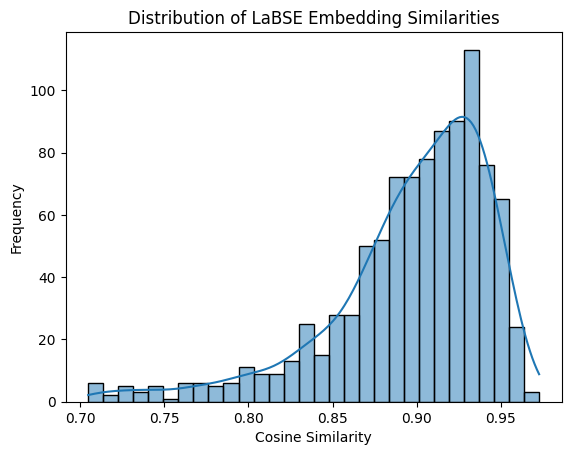

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df_cleaned_A['EMBEDDING_SIMILARITY'], bins=30, kde=True)
plt.title("Distribution of LaBSE Embedding Similarities")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()


In [ ]:

import pandas as pd
import csv  # Import the csv module here
import re
from tqdm import tqdm
# File path for B
file_path = r"/content/drive/MyDrive/Colab Notebooks/merged_subfolders/B_aligned_merged.csv"

# Load and clean malformed rows
data = []
with open(file_path, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row) != 3:
            continue
        try:
            col1 = row[0].strip()
            col2 = row[1].strip()
            sim = float(row[2])
            data.append([col1, col2, sim])
        except ValueError:
            continue

# ✅ Create DataFrame
dfB = pd.DataFrame(data, columns=['COLUMN-1', 'COLUMN-2', 'SIMILARITY'])
dfB.drop_duplicates(inplace=True)
dfB.reset_index(drop=True, inplace=True)




In [ ]:
dfB.head()

COLUMN-1  \
0  B Bact Ointment is an antibacterial medicine a...   
1  Burning sensation is a common side effect of a...   
2               Do not use it for more than 10 days.   
3                  Do not use for more than 10 days.   
4  If your skin condition does not improve within...   

                                            COLUMN-2  SIMILARITY  
0  B Bact Ointment is an antibacterial medicine a...    1.000000  
1  Burning sensation is a common side effect of a...    1.000000  
2               Do not use it for more than 10 days.    1.000000  
3               Do not use it for more than 10 days.    0.990008  
4  अगर आपकी त्वचा की स्थिति 3-5 दिनों के भीतर सुध...    0.931658

In [ ]:
dfB.shape

(38330, 3)

In [ ]:
# Basic cleaning
dfB.drop_duplicates(inplace=True)
dfB = dfB.dropna()
dfB = dfB[
    (dfB['COLUMN-1'].str.strip() != '') &
    (dfB['COLUMN-2'].str.strip() != '') &
    (dfB['COLUMN-1'] != dfB['COLUMN-2'])
].reset_index(drop=True)

# Function to count unwanted English words in Hindi column
def count_english_words(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text)
    units_to_keep = {'mg', 'ml', 'gm', 'g', 'mcg', 'kg', 'l'}
    return sum(1 for w in words if w.lower() not in units_to_keep)

# Apply the filter
tqdm.pandas()
dfB['english_word_count_in_hindi'] = dfB['COLUMN-2'].progress_apply(count_english_words)
dfB = dfB[dfB['english_word_count_in_hindi'] <= 1].reset_index(drop=True)
dfB.drop(columns=['english_word_count_in_hindi'], inplace=True)


100%|██████████| 37459/37459 [00:01<00:00, 29618.49it/s]


In [ ]:
dfB.shape

(36569, 3)

In [ ]:
dfB.head(30)

COLUMN-1  \
0   If your skin condition does not improve within...   
1   Pregnant or breastfeeding women should consult...   
2   This will only increase the risk of side effects.   
3     These may be signs of severe allergic reaction.   
4   Inform your doctor if your symptoms are gettin...   
5   If your skin condition does not improve within...   
6   Clean and dry the affected area and apply the ...   
7   Apply the ointment to the infected area of ski...   
8   Thus, it prevents the skin infection from spre...   
9   You can cover the treated area with a dressing...   
10  Before using this medicine, inform your doctor...   
11  Use it in the dose and duration as advised by ...   
12  Follow the directions given by your doctor car...   
13  Avoid any contact with your eyes, nose, or mouth.   
14       Avoid getting it in the eyes, mouth or nose.   
15  The bacteria are normally cleared from your sk...   
16      If you have any concerns consult your doctor.   
17  Wash off the ointment immediately if you get r...   
18  Local side effects like minor burning or irrit...   
19  It is effective against skin infections such a...   
20  If this medicine accidentally enters your eyes...   
21  Do not stop using B Bact Ointment because of t...   
22  It should be applied only to the affected area...   
23  B Bact Ointment B Bact Ointment is an antibiot...   
24  Treatment of Bacterial skin infections <br>B B...   
25  B Bact Ointment should not be used to treat in...   
26              It works by killing certain bacteria.   
27  Clean and dry the affected area and gently mas...   
28  Avoid using B Bact Ointment for large open wou...   
29  B Bact Ointment is probably safe to use during...   

                                             COLUMN-2  SIMILARITY  
0   अगर आपकी त्वचा की स्थिति 3-5 दिनों के भीतर सुध...    0.931658  
1   गर्भवती या स्तनपान कराने वाली महिलाओं को इसका ...    0.922989  
2               इससे केवल साइड इफेक्ट का जोखिम बढ़ेगा.    0.920979  
3   ये गंभीर एलर्जी प्रतिक्रिया के संकेत हो सकते हैं.    0.919592  
4   अगर इस दवा का उपयोग करते समय आपके लक्षण और भी ...    0.911902  
5   अगर आपकी त्वचा की स्थिति 3-5 दिनों के भीतर सुध...    0.911416  
6   प्रभावित क्षेत्र को साफ और सूखा लें और दिन में...    0.910504  
7   प्रतिदिन 2-3 बार या डॉक्टर द्वारा बताए गए स्कि...    0.910470  
8   इस प्रकार, यह त्वचा के इन्फेक्शन को फैलने से र...    0.904916  
9   आप उपचारित क्षेत्र को ड्रेसिंग के साथ कवर कर स...    0.904184  
10  इस दवा का उपयोग करने से पहले, अगर आपको इससे या...    0.899479  
11  इसे डॉक्टर द्वारा बताई गई खुराक और अवधि के अनु...    0.896755  
12     अपने डॉक्टर द्वारा दिए गए दिशाओं का पालन करें.    0.893808  
13  अपनी आंखों, नाक या मुंह के संपर्क में लाने से ...    0.891604  
14  अपनी आंखों, नाक या मुंह के संपर्क में लाने से ...    0.888230  
15  आमतौर पर बैक्टीरिया उपचार शुरू करने के 10 दिनो...    0.888011  
16   अगर आपको कोई समस्या है तो डॉक्टर से परामर्श लें.    0.887513  
17  अगर आपको रैशेज और खुजली से रैशेज, खांसी, सांस ...    0.886781  
18  लगाने के बाद मामूली गर्मी या जलन जैसे स्थानीय ...    0.886642  
19  यह त्वचा के इन्फेक्शन्स जैसे कि बॉइल्स, इम्पेट...    0.882269  
20  अगर यह दवा दुर्घटना से आपकी आंखों में प्रवेश क...    0.880736  
21  इन हल्के साइड इफेक्ट के कारण बी बैक्ट ऑइंटमेंट...    0.878085  
22  डॉक्टर द्वारा निर्धारित खुराक और अवधि के अनुसा...    0.876655  
23  बी बैक्ट ऑइंटमेंट एक एंटीबायोटिक दवा है जिसका ...    0.875504  
24  त्वचा पर बैक्टीरिया से होने वाला संक्रमण का इल...    0.875485  
25  बी बैक्ट ऑइंटमेंट का इस्तेमाल आंखों, नास्ट्रिल...    0.873737  
26         यह कुछ बैक्टीरिया को मारने का काम करता है.    0.873305  
27  प्रभावित जगह को साफ करके और सुखाकर वहां ऑइंटमे...    0.864304  
28  अगर आपको किडनी में समस्या हो रही है, तो बड़ी ख...    0.860558  
29  स्तनपान के दौरान बी बैक्ट ऑइंटमेंट का इस्तेमाल...    0.856593

In [ ]:
# Output size after cleaning
print(f"✅ Cleaned B_aligned_merged.csv: {dfB.shape[0]} rows remaining.")

✅ Cleaned B_aligned_merged.csv: 36569 rows remaining.


In [ ]:
##for c aligned merged data

# File path for C
file_path = r"/content/drive/MyDrive/Colab Notebooks/merged_subfolders/C_aligned_merged.csv"

# Load and clean malformed rows
data = []
with open(file_path, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row) != 3:
            continue
        try:
            col1 = row[0].strip()
            col2 = row[1].strip()
            sim = float(row[2])
            data.append([col1, col2, sim])
        except ValueError:
            continue

# Create DataFrame
dfC = pd.DataFrame(data, columns=['COLUMN-1', 'COLUMN-2', 'SIMILARITY'])

In [ ]:
dfC.shape

(101655, 3)

In [ ]:
dfC.head(20)

COLUMN-1  \
0   If you vomit after 30 minutes of a dose, you d...   
1         No, C 37 500mg Tablet is not an antibiotic.   
2   Do not take C 37 500mg Tablet for more than 3 ...   
3   C 37 500mg Tablet takes around 30-45 min to st...   
4   If you vomit in less than 30 minutes after hav...   
5   Ibuprofen and C 37 500mg Tablet are safe medic...   
6   C 37 500mg Tablet is safe to use during breast...   
7   C 37 500mg Tablet may be unsafe to use during ...   
8   C 37 500mg Tablet is an analgesic (pain reliev...   
9   C 37 500mg Tablet should be used with caution ...   
10  C 37 500mg Tablet should be used with caution ...   
11  You should only take four doses of C 37 500mg ...   
12  C 37 500mg Tablet is considered safe for child...   
13  It is unsafe to consume alcohol with C 37 500m...   
14  Usually, you will start feeling better after a...   
15  C 37 500mg Tablet should be taken with food or...   
16  C 37 500mg Tablet may be prescribed alone or i...   
17  Dose adjustment of C 37 500mg Tablet may be ne...   
18  Treatment of Fever <br>C 37 500mg Tablet is al...   
19  No, C 37 500mg Tablet does not make babies sle...   

                                             COLUMN-2  SIMILARITY  
0   If you vomit after 30 minutes of a dose, you d...    1.000000  
1       नहीं, सी 37 500mg टैबलेट एंटीबायोटिक नहीं है.    0.973655  
2   पहले डॉक्टर से परामर्श किए बिना 3 दिनों से अधि...    0.972673  
3   सी 37 500mg टैबलेट को काम शुरू करने और अपना प्...    0.971056  
4   अगर आप सी 37 500mg टैबलेट टैबलेट या सिरप की खु...    0.968073  
5   इबुप्रोफेन और सी 37 500mg टैबलेट सुरक्षित दवाए...    0.965220  
6   स्तनपान के दौरान सी 37 500mg टैबलेट का इस्तेमा...    0.962975  
7   गर्भावस्था के दौरान सी 37 500mg टैबलेट का इस्त...    0.962345  
8   सी 37 500mg टैबलेट एक एनाल्जेसिक (दर्द निवारक)...    0.958584  
9   किडनी की बीमारियों से पीड़ित मरीजों में सी 37 5...    0.957476  
10  किडनी की बीमारियों से पीड़ित मरीजों में सी 37 5...    0.955700  
11  आपको सी 37 500mg टैबलेट की चार खुराक 24 घंटों ...    0.953867  
12  सी 37 500mg टैबलेट को बच्चों के लिए केवल तभी स...    0.950698  
13  सी 37 500mg टैबलेट के साथ शराब पीना सुरक्षित न...    0.948548  
14  आमतौर पर, आप सी 37 500mg टैबलेट लेने के लगभग आ...    0.946781  
15  सी 37 500mg टैबलेट को भोजन या दूध के साथ लेना ...    0.945429  
16  सी 37 500mg टैबलेट को अकेले या किसी अन्य दवा क...    0.944476  
17  सी 37 500mg टैबलेट की खुराक में बदलाव की आवश्य...    0.944451  
18  बुखार का इलाज  सी 37 500mg टैबलेट का इस्तेमाल ...    0.944349  
19  नहीं, सी 37 500mg टैबलेट से बच्चों को नींद नही...    0.940609

In [ ]:
# Basic cleaning
dfC.drop_duplicates(inplace=True)
dfC = dfC.dropna()
dfC = dfC[
    (dfC['COLUMN-1'].str.strip() != '') &
    (dfC['COLUMN-2'].str.strip() != '') &
    (dfC['COLUMN-1'] != dfC['COLUMN-2'])
].reset_index(drop=True)

# Function to count unwanted English words in Hindi column
def count_english_words(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text)
    units_to_keep = {'mg', 'ml', 'gm', 'g', 'mcg', 'kg', 'l'}
    return sum(1 for w in words if w.lower() not in units_to_keep)

# Apply the filter
tqdm.pandas()
dfC['english_word_count_in_hindi'] = dfC['COLUMN-2'].progress_apply(count_english_words)
dfC = dfC[dfC['english_word_count_in_hindi'] <= 1].reset_index(drop=True)
dfC.drop(columns=['english_word_count_in_hindi'], inplace=True)

# Output size after cleaning
print(f"✅ Cleaned C_aligned_merged.csv: {dfC.shape[0]} rows remaining.")


100%|██████████| 99715/99715 [00:00<00:00, 139167.71it/s]

✅ Cleaned C_aligned_merged.csv: 96710 rows remaining.


In [ ]:
dfC.head(20)


COLUMN-1  \
0         No, C 37 500mg Tablet is not an antibiotic.   
1   Do not take C 37 500mg Tablet for more than 3 ...   
2   C 37 500mg Tablet takes around 30-45 min to st...   
3   If you vomit in less than 30 minutes after hav...   
4   Ibuprofen and C 37 500mg Tablet are safe medic...   
5   C 37 500mg Tablet is safe to use during breast...   
6   C 37 500mg Tablet may be unsafe to use during ...   
7   C 37 500mg Tablet is an analgesic (pain reliev...   
8   C 37 500mg Tablet should be used with caution ...   
9   C 37 500mg Tablet should be used with caution ...   
10  You should only take four doses of C 37 500mg ...   
11  C 37 500mg Tablet is considered safe for child...   
12  It is unsafe to consume alcohol with C 37 500m...   
13  Usually, you will start feeling better after a...   
14  C 37 500mg Tablet should be taken with food or...   
15  C 37 500mg Tablet may be prescribed alone or i...   
16  Dose adjustment of C 37 500mg Tablet may be ne...   
17  Treatment of Fever <br>C 37 500mg Tablet is al...   
18  No, C 37 500mg Tablet does not make babies sle...   
19                        Please consult your doctor.   

                                             COLUMN-2  SIMILARITY  
0       नहीं, सी 37 500mg टैबलेट एंटीबायोटिक नहीं है.    0.973655  
1   पहले डॉक्टर से परामर्श किए बिना 3 दिनों से अधि...    0.972673  
2   सी 37 500mg टैबलेट को काम शुरू करने और अपना प्...    0.971056  
3   अगर आप सी 37 500mg टैबलेट टैबलेट या सिरप की खु...    0.968073  
4   इबुप्रोफेन और सी 37 500mg टैबलेट सुरक्षित दवाए...    0.965220  
5   स्तनपान के दौरान सी 37 500mg टैबलेट का इस्तेमा...    0.962975  
6   गर्भावस्था के दौरान सी 37 500mg टैबलेट का इस्त...    0.962345  
7   सी 37 500mg टैबलेट एक एनाल्जेसिक (दर्द निवारक)...    0.958584  
8   किडनी की बीमारियों से पीड़ित मरीजों में सी 37 5...    0.957476  
9   किडनी की बीमारियों से पीड़ित मरीजों में सी 37 5...    0.955700  
10  आपको सी 37 500mg टैबलेट की चार खुराक 24 घंटों ...    0.953867  
11  सी 37 500mg टैबलेट को बच्चों के लिए केवल तभी स...    0.950698  
12  सी 37 500mg टैबलेट के साथ शराब पीना सुरक्षित न...    0.948548  
13  आमतौर पर, आप सी 37 500mg टैबलेट लेने के लगभग आ...    0.946781  
14  सी 37 500mg टैबलेट को भोजन या दूध के साथ लेना ...    0.945429  
15  सी 37 500mg टैबलेट को अकेले या किसी अन्य दवा क...    0.944476  
16  सी 37 500mg टैबलेट की खुराक में बदलाव की आवश्य...    0.944451  
17  बुखार का इलाज  सी 37 500mg टैबलेट का इस्तेमाल ...    0.944349  
18  नहीं, सी 37 500mg टैबलेट से बच्चों को नींद नही...    0.940609  
19                     कृपया अपने डॉक्टर से सलाह लें.    0.936654

In [ ]:
dfC.tail()

COLUMN-1  \
96705  Czson 1% Dusting Powder is for external use only.   
96706  Czson 1% Dusting Powder may reduce the effecti...   
96707  If you are using the cream on the vulva or pen...   
96708  No interaction found/established Czson 1% Dust...   
96709  Consult your doctor if they persist or if you’...   

                                                COLUMN-2  SIMILARITY  
96705  क्ज़्सोन 1% डस्टिंग पाउडर केवल बाहरी अंगों के ल...    0.862809  
96706  क्ज़्सोन 1% डस्टिंग पाउडर डायफ्राम और कंडोम जैस...    0.840513  
96707  अगर आप वुल्वा या शिश्न पर क्रीम का उपयोग कर रह...    0.837953  
96708  क्ज़्सोन 1% डस्टिंग पाउडर को आमतौर पर गर्भावस्थ...    0.831289  
96709  अगर साइड इफ़ेक्ट बने रहते हैं या लक्षण बिगड़ने ल...    0.732043

In [ ]:
##for D aligned merged data
# File path for D
file_path = r"/content/drive/MyDrive/Colab Notebooks/merged_subfolders/D_aligned_merged.csv"

# Load and clean malformed rows
data = []
with open(file_path, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row) != 3:
            continue
        try:
            col1 = row[0].strip()
            col2 = row[1].strip()
            sim = float(row[2])
            data.append([col1, col2, sim])
        except ValueError:
            continue

# Create DataFrame
dfD = pd.DataFrame(data, columns=['COLUMN-1', 'COLUMN-2', 'SIMILARITY'])

In [ ]:
dfD.head(10)

COLUMN-1  \
0  D-3FIT Chewable Tablet is safe to use during b...   
1  D-3FIT Chewable Tablet may be unsafe to use du...   
2  Caution is advised when consuming alcohol with...   
3  Your doctor has prescribed D-3FIT Chewable Tab...   
4  Limited data available suggests that dose adju...   
5  D-3FIT Chewable Tablet should not be taken by ...   
6  Do not take antacids or any other medication 2...   
7  D-3FIT Chewable Tablet does not usually affect...   
8  Taking too much D-3FIT Chewable Tablet for a l...   
9  D-3FIT Chewable Tablet should be swallowed who...   

                                            COLUMN-2  SIMILARITY  
0  D-3FIT Chewable Tablet is safe to use during b...         1.0  
1  D-3FIT Chewable Tablet may be unsafe to use du...         1.0  
2  Caution is advised when consuming alcohol with...         1.0  
3  Your doctor has prescribed D-3FIT Chewable Tab...         1.0  
4  Limited data available suggests that dose adju...         1.0  
5  D-3FIT Chewable Tablet should not be taken by ...         1.0  
6  Do not take antacids or any other medication 2...         1.0  
7  D-3FIT Chewable Tablet does not usually affect...         1.0  
8  Taking too much D-3FIT Chewable Tablet for a l...         1.0  
9  D-3FIT Chewable Tablet should be swallowed who...         1.0

In [ ]:
dfD.shape

(62217, 3)

In [ ]:
# Basic cleaning
dfD.drop_duplicates(inplace=True)
dfD = dfD.dropna()
dfD = dfD[
    (dfD['COLUMN-1'].str.strip() != '') &
    (dfD['COLUMN-2'].str.strip() != '') &
    (dfD['COLUMN-1'] != dfD['COLUMN-2'])
].reset_index(drop=True)

# Function to count unwanted English words in Hindi column
def count_english_words(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text)
    units_to_keep = {'mg', 'ml', 'gm', 'g', 'mcg', 'kg', 'l'}
    return sum(1 for w in words if w.lower() not in units_to_keep)

# Apply the filter
tqdm.pandas()
dfD['english_word_count_in_hindi'] = dfD['COLUMN-2'].progress_apply(count_english_words)
dfD = dfD[dfD['english_word_count_in_hindi'] <= 1].reset_index(drop=True)
dfD.drop(columns=['english_word_count_in_hindi'], inplace=True)

# Output size after cleaning
print(f"✅ Cleaned D_aligned_merged.csv: {dfD.shape[0]} rows remaining.")

100%|██████████| 61175/61175 [00:00<00:00, 120227.57it/s]

✅ Cleaned D_aligned_merged.csv: 59611 rows remaining.


In [ ]:
dfD.head(10)

COLUMN-1  \
0  D-3FIT Chewable Tablet is safe to use during b...   
1  D-3FIT Chewable Tablet may be unsafe to use du...   
2  Caution is advised when consuming alcohol with...   
3  Your doctor has prescribed D-3FIT Chewable Tab...   
4  Limited data available suggests that dose adju...   
5  D-3FIT Chewable Tablet should not be taken by ...   
6  Do not take antacids or any other medication 2...   
7  D-3FIT Chewable Tablet does not usually affect...   
8  Taking too much D-3FIT Chewable Tablet for a l...   
9  D-3FIT Chewable Tablet should be swallowed who...   

                                            COLUMN-2  SIMILARITY  
0  D-3FIT Chewable Tablet is safe to use during b...         1.0  
1  D-3FIT Chewable Tablet may be unsafe to use du...         1.0  
2  Caution is advised when consuming alcohol with...         1.0  
3  Your doctor has prescribed D-3FIT Chewable Tab...         1.0  
4  Limited data available suggests that dose adju...         1.0  
5  D-3FIT Chewable Tablet should not be taken by ...         1.0  
6  Do not take antacids or any other medication 2...         1.0  
7  D-3FIT Chewable Tablet does not usually affect...         1.0  
8  Taking too much D-3FIT Chewable Tablet for a l...         1.0  
9  D-3FIT Chewable Tablet should be swallowed who...         1.0

In [ ]:
### for E aligned merged data

# File path for E
file_path = r"/content/drive/MyDrive/Colab Notebooks/merged_subfolders/E_aligned_merged.csv"

# Load and clean malformed rows
data = []
with open(file_path, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row) != 3:
            continue
        try:
            col1 = row[0].strip()
            col2 = row[1].strip()
            sim = float(row[2])
            data.append([col1, col2, sim])
        except ValueError:
            continue

# Create DataFrame
dfE = pd.DataFrame(data, columns=['COLUMN-1', 'COLUMN-2', 'SIMILARITY'])
print(f"📦 Loaded: {dfE.shape[0]} rows before cleaning")

📦 Loaded: 51356 rows before cleaning


In [ ]:
dfE.head(10)

COLUMN-1  \
0  However, in some patients, it may cause common...   
1  Amoxycillin works by stopping the growth of ba...   
2  Talk to your doctor if diarrhea persists and y...   
3  It is used to treat bacterial infections like,...   
4  In case you experience diarrhea, drink plenty ...   
5  In addition to that, the medicine may affect t...   
6  Consuming alcohol with E-Amox CL 500mg/125mg T...   
7  E-Amox CL 500mg/125mg Tablet is safe to use wh...   
8  E-Amox CL 500mg/125mg Tablet is generally cons...   
9  E-Amox CL 500mg/125mg Tablet should be used wi...   

                                            COLUMN-2  SIMILARITY  
0  However, in some patients, it may cause common...    1.000000  
1  Amoxycillin works by stopping the growth of ba...    1.000000  
2  Talk to your doctor if diarrhea persists and y...    1.000000  
3  It is used to treat bacterial infections like,...    1.000000  
4  In case you experience diarrhea, drink plenty ...    1.000000  
5  In addition to that, the medicine may affect t...    1.000000  
6  ई-अमोक्स सीएल 500mg/125mg टैबलेट के साथ शराब क...    0.957549  
7  डॉक्टर की सलाह अनुसार लिए जाने पर ई-अमोक्स सीए...    0.952998  
8  ई-अमोक्स सीएल 500mg/125mg टैबलेट को आमतौर पर ग...    0.952314  
9  किडनी की बीमारियों से पीड़ित मरीजों में ई-अमोक्...    0.952114

In [ ]:
# Drop exact duplicates
dfE.drop_duplicates(inplace=True)
dfE = dfE[dfE['COLUMN-1'] != dfE['COLUMN-2']].reset_index(drop=True)

# Remove nulls and empty strings
dfE = dfE.dropna()
dfE = dfE[
    (dfE['COLUMN-1'].str.strip() != '') &
    (dfE['COLUMN-2'].str.strip() != '')
].reset_index(drop=True)

# Define the function to count English words in Hindi (excluding medical units)
def count_english_words(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text)
    units_to_keep = {'mg', 'ml', 'gm', 'g', 'mcg', 'kg', 'l'}
    return sum(1 for w in words if w.lower() not in units_to_keep)

tqdm.pandas()
print("🔍 Filtering rows with excessive English words in Hindi column...")
dfE['english_word_count_in_hindi'] = dfE['COLUMN-2'].progress_apply(count_english_words)
dfE = dfE[dfE['english_word_count_in_hindi'] <= 1].reset_index(drop=True)
dfE.drop(columns=['english_word_count_in_hindi'], inplace=True)

# Final status
print(f"✅ Cleaned size for E: {dfE.shape[0]} rows")

🔍 Filtering rows with excessive English words in Hindi column...


100%|██████████| 50362/50362 [00:00<00:00, 83106.50it/s]

✅ Cleaned size for E: 49344 rows


In [ ]:
dfE.head(10)

COLUMN-1  \
0  Consuming alcohol with E-Amox CL 500mg/125mg T...   
1  E-Amox CL 500mg/125mg Tablet is safe to use wh...   
2  E-Amox CL 500mg/125mg Tablet is generally cons...   
3  E-Amox CL 500mg/125mg Tablet should be used wi...   
4  E-Amox CL 500mg/125mg Tablet is safe to use du...   
5  E-Amox CL 500mg/125mg Tablet should be used wi...   
6  E-Amox CL 500mg/125mg Tablet takes time to sho...   
7  Taking probiotics along with E-Amox CL 500mg/1...   
8  No, taking a higher than the recommended dose ...   
9  Yes, E-Amox CL 500mg/125mg Tablet can cause an...   

                                            COLUMN-2  SIMILARITY  
0  ई-अमोक्स सीएल 500mg/125mg टैबलेट के साथ शराब क...    0.957549  
1  डॉक्टर की सलाह अनुसार लिए जाने पर ई-अमोक्स सीए...    0.952998  
2  ई-अमोक्स सीएल 500mg/125mg टैबलेट को आमतौर पर ग...    0.952314  
3  किडनी की बीमारियों से पीड़ित मरीजों में ई-अमोक्...    0.952114  
4  स्तनपान के दौरान ई-अमोक्स सीएल 500mg/125mg टैब...    0.951955  
5  किडनी की बीमारियों से पीड़ित मरीजों में ई-अमोक्...    0.951609  
6  ई-अमोक्स सीएल 500mg/125mg टैबलेट को अपना पूरा ...    0.949575  
7  ई-अमोक्स सीएल 500mg/125mg टैबलेट के साथ प्रोबा...    0.948958  
8  नहीं, डॉक्टर द्वारा निर्धारित की गई खुराक से अ...    0.943533  
9  हां, ई-अमोक्स सीएल 500mg/125mg टैबलेट से एलर्ज...    0.942866

In [ ]:
## for F_aligned_merged.csv

file_path = r"/content/drive/MyDrive/Colab Notebooks/merged_subfolders/F_aligned_merged.csv"

# Load and clean malformed rows
data = []
with open(file_path, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row) != 3:
            continue
        try:
            col1 = row[0].strip()
            col2 = row[1].strip()
            sim = float(row[2])
            data.append([col1, col2, sim])
        except ValueError:
            continue

# Create DataFrame
dfF = pd.DataFrame(data, columns=['COLUMN-1', 'COLUMN-2', 'SIMILARITY'])
print(f"📦 Loaded: {dfF.shape[0]} rows before cleaning")

📦 Loaded: 43262 rows before cleaning


In [ ]:
# Drop exact duplicates
dfF.drop_duplicates(inplace=True)
dfF = dfF[dfF['COLUMN-1'] != dfF['COLUMN-2']].reset_index(drop=True)

# Remove nulls and empty strings
dfF = dfF.dropna()
dfF = dfF[
    (dfF['COLUMN-1'].str.strip() != '') &
    (dfF['COLUMN-2'].str.strip() != '')
].reset_index(drop=True)

# Define the function to count English words in Hindi (excluding medical units)
def count_english_words(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text)
    units_to_keep = {'mg', 'ml', 'gm', 'g', 'mcg', 'kg', 'l'}
    return sum(1 for w in words if w.lower() not in units_to_keep)

tqdm.pandas()
print("🔍 Filtering rows with excessive English words in Hindi column...")
dfF['english_word_count_in_hindi'] = dfF['COLUMN-2'].progress_apply(count_english_words)
dfF = dfF[dfF['english_word_count_in_hindi'] <= 1].reset_index(drop=True)
dfF.drop(columns=['english_word_count_in_hindi'], inplace=True)

# Final status
print(f"✅ Cleaned size for F: {dfF.shape[0]} rows")

🔍 Filtering rows with excessive English words in Hindi column...


100%|██████████| 42444/42444 [00:00<00:00, 80608.49it/s]

✅ Cleaned size for F: 41252 rows


In [ ]:
dfF.head()

COLUMN-1  \
0                        Please consult your doctor.   
1  F & A Forte SR Tablet is probably unsafe to us...   
2  Your doctor should also know about all other m...   
3  Avoid alcohol while taking F & A Forte SR Tablet.   
4  F & A Forte SR Tablet is unsafe to use during ...   

                                            COLUMN-2  SIMILARITY  
0                     कृपया अपने डॉक्टर से सलाह लें.    0.936654  
1  एफ & ए फोर्ट एसआर टैबलेट स्तनपान के दौरान इस्त...    0.927167  
2  आपके डॉक्टर को अन्य सभी दवाओं के बारे में भी ज...    0.925594  
3    एफ & ए फोर्ट एसआर टैबलेट लेते समय शराब से बचें.    0.923065  
4  गर्भावस्था के दौरान एफ & ए फोर्ट एसआर टैबलेट क...    0.921740

In [ ]:
### 🔁 Step 1: Read and clean malformed/invalid rows (but keep exact duplicates)
import pandas as pd
import csv
import re
from tqdm import tqdm

file_path = r"/content/drive/MyDrive/Colab Notebooks/merged_subfolders/D_aligned_merged.csv"

data = []
with open(file_path, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row) != 3:
            continue
        try:
            col1 = row[0].strip()
            col2 = row[1].strip()
            sim = float(row[2])
            data.append([col1, col2, sim])
        except ValueError:
            continue

dfD = pd.DataFrame(data, columns=['COLUMN-1', 'COLUMN-2', 'SIMILARITY'])

# Basic filtering — but keep duplicates
dfD.dropna(inplace=True)
dfD = dfD[
    (dfD['COLUMN-1'].str.strip() != '') &
    (dfD['COLUMN-2'].str.strip() != '') &
    (dfD['COLUMN-1'] != dfD['COLUMN-2'])
].reset_index(drop=True)

# Filter English words in Hindi
def count_english_words(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text)
    units_to_keep = {'mg', 'ml', 'gm', 'g', 'mcg', 'kg', 'l'}
    return sum(1 for w in words if w.lower() not in units_to_keep)

tqdm.pandas()
dfD['english_word_count_in_hindi'] = dfD['COLUMN-2'].progress_apply(count_english_words)
dfD = dfD[dfD['english_word_count_in_hindi'] <= 1].reset_index(drop=True)
dfD.drop(columns=['english_word_count_in_hindi'], inplace=True)

print(f"✅ Cleaned D_aligned_merged.csv: {dfD.shape[0]} rows remaining.")


### ✅ Step 2: Apply HTML + special char + garbage-word cleaning

def remove_html_tags(text):
    if pd.isnull(text):
        return text
    return re.sub(r'<[^>]+>', '', text)

def clean_special_characters(text):
    if pd.isnull(text):
        return text
    return re.sub(r'[^\w\s\u0900-\u097Fa-zA-Z.,!?%-]', '', text)

def full_clean(text):
    text = remove_html_tags(text)
    text = clean_special_characters(text)
    return text.strip()

def is_valid_sentence(text):
    words = str(text).split()
    if len(words) != 1:
        return True
    return bool(re.search(r'[a-zA-Z\u0900-\u097F]', words[0]))

def clean_dataframe(df):
    df = df.copy()
    df['COLUMN-1'] = df['COLUMN-1'].apply(full_clean)
    df['COLUMN-2'] = df['COLUMN-2'].apply(full_clean)
    df = df[df['COLUMN-1'].apply(is_valid_sentence) & df['COLUMN-2'].apply(is_valid_sentence)]
    df.reset_index(drop=True, inplace=True)
    return df

### 🔁 Apply cleaning
print(f"🧹 Cleaning dfD (before: {len(dfD)} rows)...")
dfD = clean_dataframe(dfD)
print(f"✅ Cleaned dfD (after: {len(dfD)} rows)")


100%|██████████| 61175/61175 [00:00<00:00, 90539.80it/s]


✅ Cleaned D_aligned_merged.csv: 59611 rows remaining.
🧹 Cleaning dfD (before: 59611 rows)...
✅ Cleaned dfD (after: 59611 rows)


In [ ]:
import pandas as pd
import re

# HTML/XML tag removal function
def remove_html_tags(text):
    if pd.isnull(text):
        return text
    return re.sub(r'<[^>]+>', '', text)

# List of dataframes to clean
dataframes = {'dfB': dfB, 'dfC': dfC, 'dfD': dfD, 'dfE': dfE, 'dfF': dfF}

# Apply cleaning to both columns in each dataframe
for name, df in dataframes.items():
    df['COLUMN-1'] = df['COLUMN-1'].apply(remove_html_tags)
    df['COLUMN-2'] = df['COLUMN-2'].apply(remove_html_tags)
    print(f"✅ HTML/XML tags removed from {name}")

# Display a few rows from one cleaned dataframe for verification
dataframes['dfB'].head()


✅ HTML/XML tags removed from dfB
✅ HTML/XML tags removed from dfC
✅ HTML/XML tags removed from dfD
✅ HTML/XML tags removed from dfE
✅ HTML/XML tags removed from dfF


COLUMN-1  \
0  If your skin condition does not improve within...   
1  Pregnant or breastfeeding women should consult...   
2  This will only increase the risk of side effects.   
3    These may be signs of severe allergic reaction.   
4  Inform your doctor if your symptoms are gettin...   

                                            COLUMN-2  SIMILARITY  
0  अगर आपकी त्वचा की स्थिति 3-5 दिनों के भीतर सुध...    0.931658  
1  गर्भवती या स्तनपान कराने वाली महिलाओं को इसका ...    0.922989  
2              इससे केवल साइड इफेक्ट का जोखिम बढ़ेगा.    0.920979  
3  ये गंभीर एलर्जी प्रतिक्रिया के संकेत हो सकते हैं.    0.919592  
4  अगर इस दवा का उपयोग करते समय आपके लक्षण और भी ...    0.911902

In [ ]:
import re
import pandas as pd

def remove_html_tags(text):
    if pd.isnull(text):
        return text
    return re.sub(r'<[^>]+>', '', text)

def clean_special_characters(text):
    if pd.isnull(text):
        return text
    return re.sub(r'[^\w\s\u0900-\u097Fa-zA-Z.,!?%-]', '', text)

def full_clean(text):
    text = remove_html_tags(text)
    text = clean_special_characters(text)
    return text.strip()

def is_valid_sentence(text):
    # Split sentence into words
    words = str(text).split()
    if len(words) != 1:
        # If more than one word, keep it
        return True
    # If only one word, check if it contains at least one letter or Hindi char
    return bool(re.search(r'[a-zA-Z\u0900-\u097F]', words[0]))

def clean_dataframe(df):
    df = df.copy()
    df['COLUMN-1'] = df['COLUMN-1'].apply(full_clean)
    df['COLUMN-2'] = df['COLUMN-2'].apply(full_clean)

    # Filter out rows where COLUMN-1 or COLUMN-2 is a single symbol/garbage word
    df = df[df['COLUMN-1'].apply(is_valid_sentence) & df['COLUMN-2'].apply(is_valid_sentence)]

    df.reset_index(drop=True, inplace=True)
    return df

# Example for your dataframes
dataframes = [dfB, dfC, dfD, dfE, dfF]
df_names = ['dfB', 'dfC', 'dfD', 'dfE', 'dfF']

for i, df in enumerate(dataframes):
    print(f"🧹 Cleaning {df_names[i]} (before: {len(df)} rows)...")
    dataframes[i] = clean_dataframe(df)
    print(f"✅ Cleaned {df_names[i]} (after: {len(dataframes[i])} rows)\n")


🧹 Cleaning dfB (before: 36569 rows)...
✅ Cleaned dfB (after: 36569 rows)

🧹 Cleaning dfC (before: 96710 rows)...
✅ Cleaned dfC (after: 96710 rows)

🧹 Cleaning dfD (before: 59611 rows)...
✅ Cleaned dfD (after: 59611 rows)

🧹 Cleaning dfE (before: 49344 rows)...
✅ Cleaned dfE (after: 49342 rows)

🧹 Cleaning dfF (before: 41252 rows)...
✅ Cleaned dfF (after: 41239 rows)



In [ ]:
for df, name in zip(dataframes, df_names):
    print(f"Checking {name}...")

    total_rows = len(df)
    exact_dups = df.duplicated(keep=False).sum()
    dup_english = df.duplicated(subset=['COLUMN-1'], keep=False).sum()
    dup_hindi = df.duplicated(subset=['COLUMN-2'], keep=False).sum()

    print(f"Total rows: {total_rows}")
    print(f"Exact duplicate pairs: {exact_dups}")
    print(f"Duplicate English sentences: {dup_english}")
    print(f"Duplicate Hindi sentences: {dup_hindi}")
    print("-" * 30)


Checking dfB...
Total rows: 36569
Exact duplicate pairs: 0
Duplicate English sentences: 6085
Duplicate Hindi sentences: 11878
------------------------------
Checking dfC...
Total rows: 96710
Exact duplicate pairs: 0
Duplicate English sentences: 13841
Duplicate Hindi sentences: 27637
------------------------------
Checking dfD...
Total rows: 59611
Exact duplicate pairs: 0
Duplicate English sentences: 9962
Duplicate Hindi sentences: 20835
------------------------------
Checking dfE...
Total rows: 49342
Exact duplicate pairs: 0
Duplicate English sentences: 7085
Duplicate Hindi sentences: 14648
------------------------------
Checking dfF...
Total rows: 41239
Exact duplicate pairs: 0
Duplicate English sentences: 6072
Duplicate Hindi sentences: 12091
------------------------------


In [ ]:
import pandas as pd
from collections import Counter

# DataFrames and their names
dataframes = [dfB, dfC, dfD, dfE, dfF]
df_names = ['B', 'C', 'D', 'E', 'F']

# Base path where A was saved
base_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_output"

for df, name in zip(dataframes, df_names):
    print(f"\n🔍 Processing df{name}...")

    # Count duplicates
    eng_counts = Counter(df['COLUMN-1'])
    hin_counts = Counter(df['COLUMN-2'])

    # Identify duplicates
    duplicate_english = df[df['COLUMN-1'].isin([k for k, v in eng_counts.items() if v > 1])]
    duplicate_hindi = df[df['COLUMN-2'].isin([k for k, v in hin_counts.items() if v > 1])]

    # Keep rows that are not in either duplicate group
    unique_english = df[~df.index.isin(duplicate_english.index)]
    unique_cleaned = unique_english[~unique_english.index.isin(duplicate_hindi.index)].reset_index(drop=True)

    # Save all three files in the same directory
    unique_cleaned.to_csv(f"{base_path}/{name}_cleaned_no_duplicates.csv", index=False)
    duplicate_english.to_csv(f"{base_path}/{name}_duplicate_english_with_targets.csv", index=False)
    duplicate_hindi.to_csv(f"{base_path}/{name}_duplicate_hindi_with_sources.csv", index=False)

    # Summary print
    print(f"✅ Saved {name} files to: {base_path}")
    print(f"   🔁 Duplicate English sentences: {duplicate_english.shape[0]}")
    print(f"   🔁 Duplicate Hindi sentences: {duplicate_hindi.shape[0]}")
    print(f"   ✅ Cleaned (no-duplicate) rows: {unique_cleaned.shape[0]}")



🔍 Processing dfB...
✅ Saved B files to: /content/drive/MyDrive/Colab Notebooks/cleaned_output
   🔁 Duplicate English sentences: 6081
   🔁 Duplicate Hindi sentences: 11878
   ✅ Cleaned (no-duplicate) rows: 23963

🔍 Processing dfC...
✅ Saved C files to: /content/drive/MyDrive/Colab Notebooks/cleaned_output
   🔁 Duplicate English sentences: 13828
   🔁 Duplicate Hindi sentences: 27634
   ✅ Cleaned (no-duplicate) rows: 67311

🔍 Processing dfD...
✅ Saved D files to: /content/drive/MyDrive/Colab Notebooks/cleaned_output
   🔁 Duplicate English sentences: 9962
   🔁 Duplicate Hindi sentences: 20835
   ✅ Cleaned (no-duplicate) rows: 37459

🔍 Processing dfE...
✅ Saved E files to: /content/drive/MyDrive/Colab Notebooks/cleaned_output
   🔁 Duplicate English sentences: 7076
   🔁 Duplicate Hindi sentences: 14650
   ✅ Cleaned (no-duplicate) rows: 33757

🔍 Processing dfF...
✅ Saved F files to: /content/drive/MyDrive/Colab Notebooks/cleaned_output
   🔁 Duplicate English sentences: 6067
   🔁 Duplicate Hi

In [ ]:
import pandas as pd
import re
import os

# Path where your cleaned files are stored
base_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_output"

# List of files to check
file_names = [
    "B_cleaned_no_duplicates.csv",
    "C_cleaned_no_duplicates.csv",
    "D_cleaned_no_duplicates.csv",
    "E_cleaned_no_duplicates.csv",
    "F_cleaned_no_duplicates.csv"
]

# Function to detect unwanted content
def contains_html_or_garbage(text):
    if pd.isnull(text):
        return False
    html_pattern = re.compile(r'<[^>]+>')
    garbage_pattern = re.compile(r'[^\w\s\u0900-\u097Fa-zA-Z.,!?%-]')
    return bool(html_pattern.search(text) or garbage_pattern.search(text))

# Check each file
for fname in file_names:
    path = os.path.join(base_path, fname)
    df = pd.read_csv(path)

    col1_bad = df['COLUMN-1'].apply(contains_html_or_garbage)
    col2_bad = df['COLUMN-2'].apply(contains_html_or_garbage)

    count_col1 = col1_bad.sum()
    count_col2 = col2_bad.sum()

    print(f"🔍 {fname}")
    print(f"  COLUMN-1 bad entries: {count_col1}")
    print(f"  COLUMN-2 bad entries: {count_col2}")
    print("-" * 40)


🔍 B_cleaned_no_duplicates.csv
  COLUMN-1 bad entries: 5663
  COLUMN-2 bad entries: 5814
----------------------------------------
🔍 C_cleaned_no_duplicates.csv
  COLUMN-1 bad entries: 18259
  COLUMN-2 bad entries: 19580
----------------------------------------
🔍 D_cleaned_no_duplicates.csv
  COLUMN-1 bad entries: 0
  COLUMN-2 bad entries: 0
----------------------------------------
🔍 E_cleaned_no_duplicates.csv
  COLUMN-1 bad entries: 9097
  COLUMN-2 bad entries: 9883
----------------------------------------
🔍 F_cleaned_no_duplicates.csv
  COLUMN-1 bad entries: 6928
  COLUMN-2 bad entries: 7531
----------------------------------------


In [ ]:
import pandas as pd
import re

def has_html_or_garbage(text):
    if pd.isnull(text):
        return False
    # Check for HTML tags
    if re.search(r'<[^>]+>', text):
        return True
    # Check for unwanted special characters (beyond allowed Hindi/English/digits/punctuations)
    if re.search(r'[^\w\s\u0900-\u097Fa-zA-Z.,!?%-]', text):
        return True
    return False

file_names = ['B_cleaned_no_duplicates.csv', 'C_cleaned_no_duplicates.csv',
              'E_cleaned_no_duplicates.csv', 'F_cleaned_no_duplicates.csv']

for file in file_names:
    print(f"\n🔍 Checking {file} for bad rows:")
    df = pd.read_csv(f"/content/drive/MyDrive/Colab Notebooks/cleaned_output/{file}")

    bad_rows = df[df['COLUMN-1'].apply(has_html_or_garbage) | df['COLUMN-2'].apply(has_html_or_garbage)]

    print(f"Total bad rows found: {len(bad_rows)}")
    if len(bad_rows) > 0:
        print(bad_rows.head(10))  # Show first 10 bad rows, remove `.head(10)` to show all
    else:
        print("No bad rows found!")



🔍 Checking B_cleaned_no_duplicates.csv for bad rows:
Total bad rows found: 6832
                                             COLUMN-1  \
6   You can cover the treated area with a dressing...   
15  B Bact Ointment B Bact Ointment is an antibiot...   
31  In case you have tubes inserted in your body f...   
35  No interaction found/established No interactio...   
36  No interaction found/established B Bact Ointme...   
38  Consult your doctor if they persist or if you’...   
42  Consult your doctor if these persist or if you...   
43  B-Cet M 5mg/10mg Tablet is taken with or witho...   
44  B-Cet M 5mg/10mg Tablet is unsafe to use durin...   
45  Stop taking B-Cet M 5mg/10mg Tablet at least t...   

                                             COLUMN-2  SIMILARITY  
6   आप उपचारित क्षेत्र को ड्रेसिंग के साथ कवर कर स...    0.904184  
15  बी बैक्ट ऑइंटमेंट एक एंटीबायोटिक दवा है जिसका ...    0.875504  
31  अगर आपने फ्लूइड या दवाओं (कैनुला) की डिलीवरी क...    0.838046  
35  बी बैक्ट ऑइंटमे

In [ ]:
import pandas as pd

# File paths (update path if different)
base_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_output/"
file_names = [
    "B_cleaned_no_duplicates.csv",
    "C_cleaned_no_duplicates.csv",
    "D_cleaned_no_duplicates.csv",
    "E_cleaned_no_duplicates.csv",
    "F_cleaned_no_duplicates.csv"
]

# Print shape for each file
for file in file_names:
    path = base_path + file
    df = pd.read_csv(path)
    print(f"{file}: {df.shape[0]} rows, {df.shape[1]} columns")


B_cleaned_no_duplicates.csv: 23963 rows, 3 columns
C_cleaned_no_duplicates.csv: 67311 rows, 3 columns
D_cleaned_no_duplicates.csv: 37459 rows, 3 columns
E_cleaned_no_duplicates.csv: 33757 rows, 3 columns
F_cleaned_no_duplicates.csv: 28294 rows, 3 columns


In [ ]:
import pandas as pd

# Define file paths
base_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_output"
files = ["B_cleaned_no_duplicates.csv", "C_cleaned_no_duplicates.csv",
         "D_cleaned_no_duplicates.csv", "E_cleaned_no_duplicates.csv",
         "F_cleaned_no_duplicates.csv"]

for file in files:
    df = pd.read_csv(f"{base_path}/{file}")
    total = len(df)

    exact_duplicates = df.duplicated(subset=['COLUMN-1', 'COLUMN-2']).sum()
    eng_duplicates = df.duplicated(subset='COLUMN-1').sum()
    hin_duplicates = df.duplicated(subset='COLUMN-2').sum()

    print(f"📁 {file}")
    print(f"Total rows: {total}")
    print(f"🔁 Exact duplicate sentence pairs: {exact_duplicates}")
    print(f"🔁 Duplicate English sentences: {eng_duplicates}")
    print(f"🔁 Duplicate Hindi sentences: {hin_duplicates}")
    print("-" * 40)


📁 B_cleaned_no_duplicates.csv
Total rows: 23963
🔁 Exact duplicate sentence pairs: 0
🔁 Duplicate English sentences: 0
🔁 Duplicate Hindi sentences: 0
----------------------------------------
📁 C_cleaned_no_duplicates.csv
Total rows: 67311
🔁 Exact duplicate sentence pairs: 0
🔁 Duplicate English sentences: 0
🔁 Duplicate Hindi sentences: 0
----------------------------------------
📁 D_cleaned_no_duplicates.csv
Total rows: 37459
🔁 Exact duplicate sentence pairs: 0
🔁 Duplicate English sentences: 0
🔁 Duplicate Hindi sentences: 0
----------------------------------------
📁 E_cleaned_no_duplicates.csv
Total rows: 33757
🔁 Exact duplicate sentence pairs: 0
🔁 Duplicate English sentences: 0
🔁 Duplicate Hindi sentences: 0
----------------------------------------
📁 F_cleaned_no_duplicates.csv
Total rows: 28294
🔁 Exact duplicate sentence pairs: 0
🔁 Duplicate English sentences: 0
🔁 Duplicate Hindi sentences: 0
----------------------------------------


In [ ]:
import pandas as pd
import re

base_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_output"
files = ["B_cleaned_no_duplicates.csv", "C_cleaned_no_duplicates.csv",
         "D_cleaned_no_duplicates.csv", "E_cleaned_no_duplicates.csv",
         "F_cleaned_no_duplicates.csv"]

def is_valid_sentence(text):
    if not isinstance(text, str) or len(text.split()) <= 1:
        return False
    if re.search(r'<[^>]+>', text):  # HTML/XML tag check
        return False
    return True

def compute_length_stats_clean(file_path, name):
    df = pd.read_csv(file_path)

    # Filter invalid sentences
    df = df[df['COLUMN-1'].apply(is_valid_sentence) & df['COLUMN-2'].apply(is_valid_sentence)].reset_index(drop=True)

    # Save cleaned file by overwriting
    df.to_csv(file_path, index=False)

    # Compute stats
    df['eng_len'] = df['COLUMN-1'].apply(lambda x: len(x.split()))
    df['hin_len'] = df['COLUMN-2'].apply(lambda x: len(x.split()))

    stats = {
        "File": name,
        "Parallel Pairs": len(df),
        "Min Sent Len Src (Eng)": df['eng_len'].min(),
        "Min Sent Len Trg (Hin)": df['hin_len'].min(),
        "Max Sent Len Src (Eng)": df['eng_len'].max(),
        "Max Sent Len Trg (Hin)": df['hin_len'].max(),
        "Avg Sent Len Src (Eng)": round(df['eng_len'].mean(), 2),
        "Avg Sent Len Trg (Hin)": round(df['hin_len'].mean(), 2),
        "Std Dev Src (Eng)": round(df['eng_len'].std(), 2),
        "Std Dev Trg (Hin)": round(df['hin_len'].std(), 2),
    }

    # Sample sentences
    min_eng_row = df[df['eng_len'] == df['eng_len'].min()].iloc[0]
    max_eng_row = df[df['eng_len'] == df['eng_len'].max()].iloc[0]
    min_hin_row = df[df['hin_len'] == df['hin_len'].min()].iloc[0]
    max_hin_row = df[df['hin_len'] == df['hin_len'].max()].iloc[0]

    print(f"\n📁 {name}")
    print(f"▶ Min Eng Sent ({stats['Min Sent Len Src (Eng)']} words): {min_eng_row['COLUMN-1']}")
    print(f"▶ Max Eng Sent ({stats['Max Sent Len Src (Eng)']} words): {max_eng_row['COLUMN-1']}")
    print(f"▶ Min Hin Sent ({stats['Min Sent Len Trg (Hin)']} words): {min_hin_row['COLUMN-2']}")
    print(f"▶ Max Hin Sent ({stats['Max Sent Len Trg (Hin)']} words): {max_hin_row['COLUMN-2']}")

    return stats

# Process all files and show stats
all_stats = []
for file in files:
    stats = compute_length_stats_clean(f"{base_path}/{file}", file)
    all_stats.append(stats)

# Summary table
stats_df = pd.DataFrame(all_stats)
print("\n📊 Summary Table After Cleaning:")
print(stats_df.to_string(index=False))



📁 B_cleaned_no_duplicates.csv
▶ Min Eng Sent (2 words): Avoid smoking.
▶ Max Eng Sent (81 words): Consult your doctor if they persist or if you’re worried about them Severe side effects of BalorainNausea Diarrhea Fever Headache Dizziness Heartburn Constipation Indigestion Urticaria Feeling thirsty Abdominal dysesthesia Itching Palpitations Decreased appetite Hypersensitivity Increased liver enzymes Increased blood urea nitrogen Increased creatinine level in blood Anemia (low number of red blood cells) Decreased white blood cell count (lymphocytes) Low blood platelets Increased white blood cell count (eosinophils) Take this medicine in the dose and duration as advised by your doctor.
▶ Min Hin Sent (3 words): धूम्रपान से बचें.
▶ Max Hin Sent (83 words): अगर साइड इफ़ेक्ट बने रहते हैं या लक्षण बिगड़ने लगते हैं तो अपने डॉक्टर से सलाह लें बायोकैल्सिन के सामान्य साइड इफेक्ट इंजेक्शन वाली जगह पर रिएक्शन (दर्द, सूजन, लालिमा) फ्लशिंग (चेहरे, कान, गर्दन और शरीर में गर्मी महसूस होना) हाई ब्लड प्रे

In [ ]:
# Re-run after code state reset
import pandas as pd
import re
import os

# Set base path and file names
base_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_output"
files = [f"{chr(i)}_cleaned_no_duplicates.csv" for i in range(ord("B"), ord("F") + 1)]

# Improved sentence validation function
def is_valid_sentence(text):
    if not isinstance(text, str):
        return False
    text = text.strip()
    if len(text.split()) <= 1:
        return False
    if re.search(r'<[^>]+>', text):  # HTML/XML tags
        return False
    if re.search(r'&[a-z]+;', text):  # HTML entities like &nbsp;
        return False
    if re.match(r"^[^\w]*s\s", text.lower()):  # e.g., "s disease"
        return False
    if re.match(r"^s\b", text.lower()):  # Starts with 's' only
        return False
    if text.lower().startswith("nbsp") or "nbsp" in text:
        return False
    return True

# Function to clean and recompute stats
def compute_length_stats_clean(file_path, name):
    df = pd.read_csv(file_path)

    # Filter invalid rows
    df = df[df['COLUMN-1'].apply(is_valid_sentence) & df['COLUMN-2'].apply(is_valid_sentence)].reset_index(drop=True)

    # Save cleaned file
    df.to_csv(file_path, index=False)

    # Compute word-level stats
    df['eng_len'] = df['COLUMN-1'].apply(lambda x: len(x.split()))
    df['hin_len'] = df['COLUMN-2'].apply(lambda x: len(x.split()))

    stats = {
        "File": name,
        "Parallel Pairs": len(df),
        "Min Sent Len Src (Eng)": df['eng_len'].min(),
        "Min Sent Len Trg (Hin)": df['hin_len'].min(),
        "Max Sent Len Src (Eng)": df['eng_len'].max(),
        "Max Sent Len Trg (Hin)": df['hin_len'].max(),
        "Avg Sent Len Src (Eng)": round(df['eng_len'].mean(), 2),
        "Avg Sent Len Trg (Hin)": round(df['hin_len'].mean(), 2),
        "Std Dev Src (Eng)": round(df['eng_len'].std(), 2),
        "Std Dev Trg (Hin)": round(df['hin_len'].std(), 2),
    }

    # Print extreme cases
    min_eng_row = df[df['eng_len'] == df['eng_len'].min()].iloc[0]
    max_eng_row = df[df['eng_len'] == df['eng_len'].max()].iloc[0]
    min_hin_row = df[df['hin_len'] == df['hin_len'].min()].iloc[0]
    max_hin_row = df[df['hin_len'] == df['hin_len'].max()].iloc[0]

    print(f"\n{name}")
    print(f"▶ Min Eng Sent ({stats['Min Sent Len Src (Eng)']} words): {min_eng_row['COLUMN-1']}")
    print(f"▶ Max Eng Sent ({stats['Max Sent Len Src (Eng)']} words): {max_eng_row['COLUMN-1']}")
    print(f"▶ Min Hin Sent ({stats['Min Sent Len Trg (Hin)']} words): {min_hin_row['COLUMN-2']}")
    print(f"▶ Max Hin Sent ({stats['Max Sent Len Trg (Hin)']} words): {max_hin_row['COLUMN-2']}")

    return stats

# Process files from B to F
all_stats = []
for file in files:
    path = os.path.join(base_path, file)
    if os.path.exists(path):
        stats = compute_length_stats_clean(path, file)
        all_stats.append(stats)

# Display summary
stats_df = pd.DataFrame(all_stats)
print("\n📊 Summary Table After Cleaning:")
print(stats_df.to_string(index=False))



B_cleaned_no_duplicates.csv
▶ Min Eng Sent (2 words): Avoid smoking.
▶ Max Eng Sent (81 words): Consult your doctor if they persist or if you’re worried about them Severe side effects of BalorainNausea Diarrhea Fever Headache Dizziness Heartburn Constipation Indigestion Urticaria Feeling thirsty Abdominal dysesthesia Itching Palpitations Decreased appetite Hypersensitivity Increased liver enzymes Increased blood urea nitrogen Increased creatinine level in blood Anemia (low number of red blood cells) Decreased white blood cell count (lymphocytes) Low blood platelets Increased white blood cell count (eosinophils) Take this medicine in the dose and duration as advised by your doctor.
▶ Min Hin Sent (3 words): धूम्रपान से बचें.
▶ Max Hin Sent (83 words): अगर साइड इफ़ेक्ट बने रहते हैं या लक्षण बिगड़ने लगते हैं तो अपने डॉक्टर से सलाह लें बायोकैल्सिन के सामान्य साइड इफेक्ट इंजेक्शन वाली जगह पर रिएक्शन (दर्द, सूजन, लालिमा) फ्लशिंग (चेहरे, कान, गर्दन और शरीर में गर्मी महसूस होना) हाई ब्लड प्रेशर

In [ ]:
import pandas as pd
import csv
import re
from tqdm import tqdm

# Folder path where files are located
folder_path = "/content/drive/MyDrive/Colab Notebooks/merged_subfolders/"

# Function to load, clean, and filter one file
def process_file(letter):
    file_path = f"{folder_path}{letter}_aligned_merged.csv"
    data = []
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            reader = csv.reader(f)
            for row in reader:
                if len(row) != 3:
                    continue
                try:
                    col1 = row[0].strip()
                    col2 = row[1].strip()
                    sim = float(row[2])
                    data.append([col1, col2, sim])
                except ValueError:
                    continue
    except Exception as e:
        print(f"❌ Error loading {file_path}: {e}")
        return pd.DataFrame(columns=['COLUMN-1', 'COLUMN-2', 'SIMILARITY'])

    df = pd.DataFrame(data, columns=['COLUMN-1', 'COLUMN-2', 'SIMILARITY'])
    print(f"{letter}: Loaded {df.shape[0]} rows")

    # Remove duplicates based on sentence pairs only
    df.drop_duplicates(subset=['COLUMN-1', 'COLUMN-2'], inplace=True)

    # Remove rows where sentences are identical
    df = df[df['COLUMN-1'] != df['COLUMN-2']].reset_index(drop=True)

    # Drop rows with null or empty strings
    df = df.dropna()
    df = df[(df['COLUMN-1'].str.strip() != '') & (df['COLUMN-2'].str.strip() != '')].reset_index(drop=True)

    # Define function to count English words excluding units
    def count_english_words(text):
        words = re.findall(r'\b[a-zA-Z]+\b', text)
        units_to_keep = {'mg', 'ml', 'gm', 'g', 'mcg', 'kg', 'l'}
        return sum(1 for w in words if w.lower() not in units_to_keep)

    tqdm.pandas()
    df['english_word_count_in_hindi'] = df['COLUMN-2'].progress_apply(count_english_words)

    # Filter rows allowing max 1 English word in Hindi column (excluding units)
    df = df[df['english_word_count_in_hindi'] <= 1].reset_index(drop=True)
    df.drop(columns=['english_word_count_in_hindi'], inplace=True)

    print(f"{letter}: Cleaned size: {df.shape[0]} rows\n")
    return df

# Process all letters from G to Z
dfs = {}
for letter in map(chr, range(ord('G'), ord('Z')+1)):
    dfs[letter] = process_file(letter)


G: Loaded 44336 rows


100%|██████████| 41892/41892 [00:01<00:00, 37782.71it/s]


G: Cleaned size: 40576 rows

H: Loaded 16875 rows


100%|██████████| 16069/16069 [00:00<00:00, 163383.41it/s]

H: Cleaned size: 15634 rows



I: Loaded 27918 rows


100%|██████████| 26935/26935 [00:00<00:00, 58924.22it/s] 


I: Cleaned size: 26162 rows

J: Loaded 9444 rows


100%|██████████| 8985/8985 [00:00<00:00, 154559.04it/s]

J: Cleaned size: 8818 rows



K: Loaded 22935 rows


100%|██████████| 21890/21890 [00:00<00:00, 155398.49it/s]


K: Cleaned size: 21243 rows

L: Loaded 52836 rows


100%|██████████| 51157/51157 [00:00<00:00, 153303.38it/s]


L: Cleaned size: 50174 rows

M: Loaded 71235 rows


100%|██████████| 68315/68315 [00:00<00:00, 87614.99it/s]


M: Cleaned size: 66497 rows

N: Loaded 19176 rows


100%|██████████| 18298/18298 [00:00<00:00, 150623.86it/s]

N: Cleaned size: 17969 rows



O: Loaded 65451 rows


100%|██████████| 63214/63214 [00:00<00:00, 172361.30it/s]


O: Cleaned size: 61797 rows

P: Loaded 50665 rows


100%|██████████| 48443/48443 [00:00<00:00, 158992.04it/s]


P: Cleaned size: 47380 rows

Q: Loaded 10883 rows


100%|██████████| 10168/10168 [00:00<00:00, 163458.08it/s]

Q: Cleaned size: 9950 rows



R: Loaded 58500 rows


100%|██████████| 56125/56125 [00:00<00:00, 89929.26it/s]


R: Cleaned size: 54475 rows

S: Loaded 61348 rows


100%|██████████| 58343/58343 [00:00<00:00, 90576.47it/s]


S: Cleaned size: 56758 rows

T: Loaded 22674 rows


100%|██████████| 21818/21818 [00:00<00:00, 52453.53it/s]


T: Cleaned size: 21211 rows

U: Loaded 11432 rows


100%|██████████| 10949/10949 [00:00<00:00, 86698.05it/s]

U: Cleaned size: 10808 rows



V: Loaded 52535 rows


100%|██████████| 50059/50059 [00:00<00:00, 91473.61it/s]


V: Cleaned size: 49017 rows

W: Loaded 18968 rows


100%|██████████| 18064/18064 [00:00<00:00, 40576.20it/s]


W: Cleaned size: 17405 rows

X: Loaded 4315 rows


100%|██████████| 4058/4058 [00:00<00:00, 136764.55it/s]

X: Cleaned size: 3980 rows



Y: Loaded 6844 rows


100%|██████████| 6468/6468 [00:00<00:00, 154120.53it/s]

Y: Cleaned size: 6322 rows



Z: Loaded 53264 rows


100%|██████████| 50762/50762 [00:00<00:00, 86048.78it/s]

Z: Cleaned size: 49292 rows



In [ ]:
import re

def clean_text(text):
    if not isinstance(text, str):
        return ''
    # Remove HTML/XML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Remove unwanted symbols (keep letters, numbers, punctuation)
    text = re.sub(r'[^\w\s.,?\'"₹$%()-:/]', '', text)  # you can adjust this if needed
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning to each DataFrame from G to Z
for letter in dfs:
    df = dfs[letter]
    df['COLUMN-1'] = df['COLUMN-1'].apply(clean_text)
    df['COLUMN-2'] = df['COLUMN-2'].apply(clean_text)
    print(f"{letter}: Cleaned HTML/symbols → {df.shape[0]} rows")


G: Cleaned HTML/symbols → 40576 rows
H: Cleaned HTML/symbols → 15634 rows
I: Cleaned HTML/symbols → 26162 rows
J: Cleaned HTML/symbols → 8818 rows
K: Cleaned HTML/symbols → 21243 rows
L: Cleaned HTML/symbols → 50174 rows
M: Cleaned HTML/symbols → 66497 rows
N: Cleaned HTML/symbols → 17969 rows
O: Cleaned HTML/symbols → 61797 rows
P: Cleaned HTML/symbols → 47380 rows
Q: Cleaned HTML/symbols → 9950 rows
R: Cleaned HTML/symbols → 54475 rows
S: Cleaned HTML/symbols → 56758 rows
T: Cleaned HTML/symbols → 21211 rows
U: Cleaned HTML/symbols → 10808 rows
V: Cleaned HTML/symbols → 49017 rows
W: Cleaned HTML/symbols → 17405 rows
X: Cleaned HTML/symbols → 3980 rows
Y: Cleaned HTML/symbols → 6322 rows
Z: Cleaned HTML/symbols → 49292 rows


In [ ]:
import re

# Check if any HTML/XML tags are present
def has_html_tag(text):
    return bool(re.search(r'<[^>]+>', str(text)))

# Check if special characters like !@#$%^&* etc. are present
def has_special_symbols(text):
    return bool(re.search(r'[!@#$%^&*()_+=\[{\]};:\'",<>?/\\|~`]', str(text)))

# Perform checks across all DataFrames from G to Z
for letter in dfs:
    df = dfs[letter]

    # HTML tag checks
    html_col1 = df['COLUMN-1'].apply(has_html_tag).sum()
    html_col2 = df['COLUMN-2'].apply(has_html_tag).sum()

    # Special symbol checks
    sym_col1 = df['COLUMN-1'].apply(has_special_symbols).sum()
    sym_col2 = df['COLUMN-2'].apply(has_special_symbols).sum()

    print(f"\n📁 File {letter}:")
    if html_col1 + html_col2 == 0:
        print("✅ No HTML tags found.")
    else:
        print(f"⚠️ HTML tags found: COLUMN-1: {html_col1}, COLUMN-2: {html_col2}")

    if sym_col1 + sym_col2 == 0:
        print("✅ No special symbols found.")
    else:
        print(f"⚠️ Special symbols found: COLUMN-1: {sym_col1}, COLUMN-2: {sym_col2}")



📁 File G:
✅ No HTML tags found.
⚠️ Special symbols found: COLUMN-1: 22060, COLUMN-2: 21720

📁 File H:
✅ No HTML tags found.
⚠️ Special symbols found: COLUMN-1: 6621, COLUMN-2: 6902

📁 File I:
✅ No HTML tags found.
⚠️ Special symbols found: COLUMN-1: 11771, COLUMN-2: 12300

📁 File J:
✅ No HTML tags found.
⚠️ Special symbols found: COLUMN-1: 4388, COLUMN-2: 4607

📁 File K:
✅ No HTML tags found.
⚠️ Special symbols found: COLUMN-1: 9427, COLUMN-2: 9873

📁 File L:
✅ No HTML tags found.
⚠️ Special symbols found: COLUMN-1: 22843, COLUMN-2: 24263

📁 File M:
✅ No HTML tags found.
⚠️ Special symbols found: COLUMN-1: 30896, COLUMN-2: 32392

📁 File N:
✅ No HTML tags found.
⚠️ Special symbols found: COLUMN-1: 8259, COLUMN-2: 8719

📁 File O:
✅ No HTML tags found.
⚠️ Special symbols found: COLUMN-1: 28268, COLUMN-2: 30788

📁 File P:
✅ No HTML tags found.
⚠️ Special symbols found: COLUMN-1: 21286, COLUMN-2: 22775

📁 File Q:
✅ No HTML tags found.
⚠️ Special symbols found: COLUMN-1: 4261, COLUMN-2: 479

In [ ]:
import re

# Define pattern for special symbols
special_symbol_pattern = re.compile(r'[!@#$%^&*()_+=\[{\]};:\'",<>?/\\|~`]')

# Function to find sentences with special symbols in either column
def find_sentences_with_symbols(df):
    mask_col1 = df['COLUMN-1'].apply(lambda x: bool(special_symbol_pattern.search(str(x))))
    mask_col2 = df['COLUMN-2'].apply(lambda x: bool(special_symbol_pattern.search(str(x))))
    return df[mask_col1 | mask_col2]

# Loop through files G to Z and display sample sentences
for letter in map(chr, range(ord('G'), ord('Z') + 1)):
    if letter in dfs:
        print(f"\n📁 File {letter} - Sentences with Special Symbols:")
        df = dfs[letter]
        filtered_df = find_sentences_with_symbols(df)

        if filtered_df.empty:
            print("✅ No sentences with special symbols found.")
        else:
            # Display up to 5 examples
            for idx, row in filtered_df.head(5).iterrows():
                print(f"\n🔹 COLUMN-1: {row['COLUMN-1']}")
                print(f"🔸 COLUMN-2: {row['COLUMN-2']}")



📁 File G - Sentences with Special Symbols:

🔹 COLUMN-1: Do not chew, crush or break it.
🔸 COLUMN-2: इस चबए, कचल य तड़ नह.

🔹 COLUMN-1: Although there are limited studies in humans, animal studies have shown harmful effects on the developing baby.
🔸 COLUMN-2: हलक, इसन स जड़ शध समत ह लकन जनवर पर कए शध स पत चलत ह क य वकसत ह रह शश पर हनकरक परभव डलत ह.

🔹 COLUMN-1: G 4 400mg Tablet may be taken with or without food, but it is better to take it at a fixed time.
🔸 COLUMN-2: गरसकरट 6mg टबलट क खन क सथ य भख पट भ ल सकत ह, लकन बहतर यह हग क इस एक तय समय पर लय जए.

🔹 COLUMN-1: Please consult your doctor. o:
🔸 COLUMN-2: कपय अपन डकटर स सलह ल.

🔹 COLUMN-1: It may be taken with or without food, preferably at a fixed time.
🔸 COLUMN-2: गरसकरट 6mg टबलट क खन क सथ य भख पट भ ल सकत ह, लकन बहतर यह हग क इस एक तय समय पर लय जए.

📁 File H - Sentences with Special Symbols:

🔹 COLUMN-1: Seek your doctor's advice as studies on pregnant women and animals have shown significant harmful effects to the developing baby.
🔸 C

In [ ]:
import pandas as pd
import os

# Directory where cleaned files are stored
cleaned_dir = "/content/drive/MyDrive/Colab Notebooks/cleaned_output"

# Function to check shape of each file
def check_shapes(start_letter='G', end_letter='Z'):
    shapes = []
    for letter in map(chr, range(ord(start_letter), ord(end_letter) + 1)):
        file_path = os.path.join(cleaned_dir, f"{letter}_cleaned_no_duplicates.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            shapes.append((letter, df.shape[0], df.shape[1]))
    return shapes

# Run and display
shapes = check_shapes()
for letter, rows, cols in shapes:
    print(f"{letter}: Rows = {rows}, Columns = {cols}")


G: Rows = 30837, Columns = 3
H: Rows = 10770, Columns = 3
I: Rows = 20693, Columns = 3
J: Rows = 7417, Columns = 3
K: Rows = 15484, Columns = 3
L: Rows = 40575, Columns = 3
M: Rows = 50977, Columns = 3
N: Rows = 16264, Columns = 3
O: Rows = 56761, Columns = 3
P: Rows = 43960, Columns = 3
Q: Rows = 9153, Columns = 3
R: Rows = 49851, Columns = 3
S: Rows = 52247, Columns = 3
T: Rows = 19697, Columns = 3
U: Rows = 10161, Columns = 3
V: Rows = 45188, Columns = 3
W: Rows = 15656, Columns = 3
X: Rows = 3778, Columns = 3
Y: Rows = 5847, Columns = 3
Z: Rows = 45635, Columns = 3


In [ ]:
dfs['G'].head()

COLUMN-1  \
0                        Please consult your doctor.   
1                    Do not chew, crush or break it.   
2  Although there are limited studies in humans, ...   
3  Your doctor will weigh the benefits and any po...   
4                             Swallow it as a whole.   

                                            COLUMN-2  SIMILARITY  
0                     कृपया अपने डॉक्टर से सलाह लें.    0.936654  
1                   इसे चबाएं, कुचलें या तोड़ें नहीं.    0.896670  
2  हालांकि, इंसानों से जुड़े शोध सीमित हैं लेकिन ज...    0.831851  
3  आपके डॉक्टर पहले इससे होने वाले लाभ और संभावित...    0.779150  
4                                इसे साबुत निगल लें.    0.770690

In [ ]:
duplicates = dfB[dfB.duplicated(subset=['COLUMN-1', 'COLUMN-2'])]
print(f"Duplicates remaining: {len(duplicates)}")


Duplicates remaining: 0


In [ ]:
duplicates = dfC[dfC.duplicated(subset=['COLUMN-1', 'COLUMN-2'])]
print(f"Duplicates remaining: {len(duplicates)}")


Duplicates remaining: 0


In [ ]:
duplicates = dfD[dfD.duplicated(subset=['COLUMN-1', 'COLUMN-2'])]
print(f"Duplicates remaining: {len(duplicates)}")


Duplicates remaining: 0


In [ ]:
duplicates = dfE[dfE.duplicated(subset=['COLUMN-1', 'COLUMN-2'])]
print(f"Duplicates remaining: {len(duplicates)}")


Duplicates remaining: 0


In [ ]:
duplicates = dfF[dfF.duplicated(subset=['COLUMN-1', 'COLUMN-2'])]
print(f"Duplicates remaining: {len(duplicates)}")


Duplicates remaining: 0


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/LaBSE")
model = AutoModel.from_pretrained("sentence-transformers/LaBSE").to(device)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

In [ ]:
from tqdm import tqdm
import numpy as np

def encode_in_chunks(sentences, model, batch_size=32):
    embeddings = []
    for i in tqdm(range(0, len(sentences), batch_size)):
        batch = sentences[i:i + batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True).to(device)
        with torch.no_grad():
            model_output = model(**encoded)
        batch_embeddings = model_output.pooler_output.cpu().numpy()
        embeddings.append(batch_embeddings)
    return np.vstack(embeddings)


In [ ]:
import torch
if torch.cuda.is_available():
    print(f"Available GPU VRAM: {torch.cuda.get_device_properties(0).total_memory / (1024 ** 3):.2f} GB")

Available GPU VRAM: 14.74 GB


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load LaBSE model
model_name = "sentence-transformers/LaBSE"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to(device)
model.eval()

# Safer batch encoder (batch_size=16)
def encode_in_chunks(sentences, batch_size=16):
    embeddings = []
    for i in tqdm(range(0, len(sentences), batch_size)):
        batch = sentences[i:i + batch_size]
        with torch.no_grad():
            encoded_input = tokenizer(batch, return_tensors='pt', padding=True, truncation=True, max_length=128).to(device)
            model_output = model(**encoded_input)
            embeddings.append(model_output.pooler_output.cpu().numpy())
        del encoded_input, model_output
        torch.cuda.empty_cache()  # Release GPU memory
    return np.vstack(embeddings)

# Extract columns from df_aligned_A
sentences_en = df_aligned_A["COLUMN-1"].tolist()
sentences_hi = df_aligned_A["COLUMN-2"].tolist()

# Encode both sides
embeddings_en = encode_in_chunks(sentences_en, batch_size=16)
embeddings_hi = encode_in_chunks(sentences_hi, batch_size=16)

# Compute cosine similarities
similarities = [cosine_similarity([a], [b])[0][0] for a, b in zip(embeddings_en, embeddings_hi)]

# Add similarities to DataFrame
df_aligned_A["LaBSE_similarity"] = similarities

# Optionally save to Drive
# df_aligned_A.to_csv("/content/drive/MyDrive/Colab Notebooks/merged_subfolders/A_labse_scored.csv", index=False)


Using device: cuda


100%|██████████| 5518/5518 [04:49<00:00, 19.06it/s]


In [ ]:
df_aligned_A.head(6000)

COLUMN-1  \
0                           Please consult your doctor.   
1                It may cause dizziness and sleepiness.   
2                                Shake well before use.   
3     If you are diabetic, monitor your blood glucos...   
4     Let your doctor know about all other medicatio...   
...                                                 ...   
6879  You should take it strictly as advised by your...   
6880  Consult your doctor if they persist or if you’...   
6881  It is effective in relieving pain caused by he...   
6883  However, there do exist some medicines that sh...   
6884  Abwal 200mg Suspension does not pose serious s...   

                                               COLUMN-2  SIMILARITY  \
0                        कृपया अपने डॉक्टर से सलाह लें.    0.936654   
1                         इससे चक्कर और नींद आ सकती है.    0.912795   
2           इस्तेमाल करने के पहले अच्छी तरह से हिलायें.    0.912591   
3     अगर आपको डायबिटीज है, तो इस दवा को लेते समय नि...    0.900022   
4     डॉक्टर को आपके द्वारा ली जाने वाली अन्य सभी दव...    0.899882   
...                                                 ...         ...   
6879  इसे हर हाल में डॉक्टर की सलाह के अनुसार ही लिय...    0.807032   
6880  अगर साइड इफ़ेक्ट बने रहते हैं या लक्षण बिगड़ने ल...    0.781654   
6881  यह सिरदर्द, माइग्रेन, तंत्रिका दर्द, दांत दर्द...    0.774156   
6883  हालांकि, कुछ दवाएं मौजूद हैं जो एबवाल 200mg सस...    0.939699   
6884  एबवाल 200mg सस्पेंशन गंभीर साइड इफेक्ट पैदा नह...    0.938281   

      LaBSE_similarity  
0             0.936654  
1             0.912795  
2             0.912591  
3             0.900022  
4             0.899882  
...                ...  
6879          0.807032  
6880          0.781654  
6881          0.774156  
6883          0.939698  
6884          0.938281  

[6000 rows x 4 columns]

In [ ]:
# Check how many rows have similarity scores
num_total = len(df_aligned_A)
num_with_score = df_aligned_A['LaBSE_similarity'].notnull().sum()

print(f"✅ Total rows: {num_total}")
print(f"✅ Rows with LaBSE similarity score: {num_with_score}")
print(f"✅ Missing similarity scores: {num_total - num_with_score}")


✅ Total rows: 88279
✅ Rows with LaBSE similarity score: 88279
✅ Missing similarity scores: 0


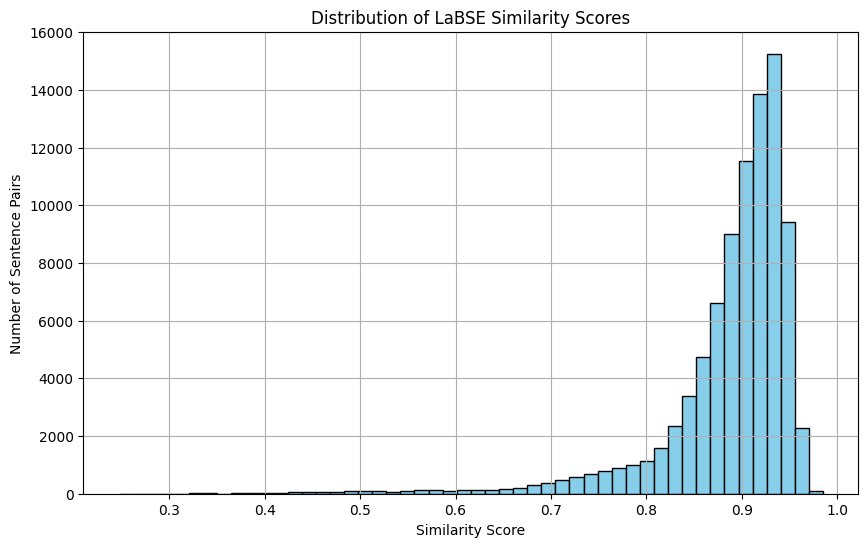

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_aligned_A['LaBSE_similarity'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of LaBSE Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Number of Sentence Pairs')
plt.grid(True)
plt.show()


In [ ]:
threshold = 0.75
df_filtered_A = df_aligned_A[df_aligned_A['LaBSE_similarity'] >= threshold].reset_index(drop=True)

print(f"Rows after filtering with threshold {threshold}: {df_filtered.shape[0]}")


Rows after filtering with threshold 0.75: 83922


In [ ]:
df_aligned_A.head()

COLUMN-1  \
0                        Please consult your doctor.   
1             It may cause dizziness and sleepiness.   
2                             Shake well before use.   
3  If you are diabetic, monitor your blood glucos...   
4  Let your doctor know about all other medicatio...   

                                            COLUMN-2  SIMILARITY  \
0                     कृपया अपने डॉक्टर से सलाह लें.    0.936654   
1                      इससे चक्कर और नींद आ सकती है.    0.912795   
2        इस्तेमाल करने के पहले अच्छी तरह से हिलायें.    0.912591   
3  अगर आपको डायबिटीज है, तो इस दवा को लेते समय नि...    0.900022   
4  डॉक्टर को आपके द्वारा ली जाने वाली अन्य सभी दव...    0.899882   

   LaBSE_similarity  
0          0.936654  
1          0.912795  
2          0.912591  
3          0.900022  
4          0.899882

In [ ]:
df_filtered_A.shape

(83922, 4)

In [ ]:
df_filtered_A.head()

COLUMN-1  \
0                        Please consult your doctor.   
1             It may cause dizziness and sleepiness.   
2                             Shake well before use.   
3  If you are diabetic, monitor your blood glucos...   
4  Let your doctor know about all other medicatio...   

                                            COLUMN-2  SIMILARITY  \
0                     कृपया अपने डॉक्टर से सलाह लें.    0.936654   
1                      इससे चक्कर और नींद आ सकती है.    0.912795   
2        इस्तेमाल करने के पहले अच्छी तरह से हिलायें.    0.912591   
3  अगर आपको डायबिटीज है, तो इस दवा को लेते समय नि...    0.900022   
4  डॉक्टर को आपके द्वारा ली जाने वाली अन्य सभी दव...    0.899882   

   LaBSE_similarity  
0          0.936654  
1          0.912795  
2          0.912591  
3          0.900022  
4          0.899882

In [ ]:
output_path = "/content/drive/MyDrive/Colab Notebooks/merged_subfolders/A_aligned_filtered.csv"
df_filtered.to_csv(output_path, index=False)
print(f"Filtered file saved to: {output_path}")


Filtered file saved to: /content/drive/MyDrive/Colab Notebooks/merged_subfolders/A_aligned_filtered.csv


In [ ]:
# Function to count words in a sentence
def word_count(sentence):
    return len(sentence.split())

# Add columns for word counts in both languages
df_filtered['eng_word_count'] = df_filtered['COLUMN-1'].apply(word_count)
df_filtered['hin_word_count'] = df_filtered['COLUMN-2'].apply(word_count)

# Find max and min word counts and corresponding sentences in English
max_eng_count = df_filtered['eng_word_count'].max()
min_eng_count = df_filtered['eng_word_count'].min()
max_eng_sentence = df_filtered[df_filtered['eng_word_count'] == max_eng_count]['COLUMN-1'].values[0]
min_eng_sentence = df_filtered[df_filtered['eng_word_count'] == min_eng_count]['COLUMN-1'].values[0]

# Find max and min word counts and corresponding sentences in Hindi
max_hin_count = df_filtered['hin_word_count'].max()
min_hin_count = df_filtered['hin_word_count'].min()
max_hin_sentence = df_filtered[df_filtered['hin_word_count'] == max_hin_count]['COLUMN-2'].values[0]
min_hin_sentence = df_filtered[df_filtered['hin_word_count'] == min_hin_count]['COLUMN-2'].values[0]

print(f"English - Max words: {max_eng_count} in sentence:\n{max_eng_sentence}\n")
print(f"English - Min words: {min_eng_count} in sentence:\n{min_eng_sentence}\n")
print(f"Hindi - Max words: {max_hin_count} in sentence:\n{max_hin_sentence}\n")
print(f"Hindi - Min words: {min_hin_count} in sentence:\n{min_hin_sentence}\n")


English - Max words: 147 in sentence:
Liposomal encapsulation or incorporation into a lipid complex of AMPHOLIP 10 MG INJECTION can substantially improves drug safety especially nephrotoxicity associated with the drug Yes, AMPHOLIP 10 MG INJECTION is an antifungal antibiotic for the treatment of serious infections caused by fungi like fungal infections of one or more deep organs of the body, suspected fungal infections in patients with a raised temperature and neutropenia (reduced number of white blood cells [neutrophils]) and Visceral leishmaniasis (disease caused by a parasite) Yes, administration of AMPHOLIP 10 MG INJECTION is associated with allergy (severe and serious allergic) reaction, therefore it is recommended to administer a test dose before starting the therapy to check for sensitivity AMPHOLIP 10 MG INJECTION is either administered as intravenous injection or infusion by a registered medical professional only AMPHOLIP 10 MG INJECTION can disrupt the lipid components of hum

In [ ]:
## applying labse from files B to F
def encode_in_chunks(sentences, batch_size=16):
    embeddings = []
    for i in tqdm(range(0, len(sentences), batch_size)):
        batch = sentences[i:i + batch_size]
        encoded = tokenizer(batch, return_tensors="pt", padding=True, truncation=True).to(device)
        with torch.no_grad():
            model_output = model(**encoded)
        batch_embeddings = model_output.pooler_output.cpu().numpy()
        embeddings.append(batch_embeddings)
    return np.vstack(embeddings)

def cosine_similarity(a, b):
    assert a.shape == b.shape, f"Embeddings shape mismatch: {a.shape} vs {b.shape}"
    a_norm = a / np.linalg.norm(a, axis=1, keepdims=True)
    b_norm = b / np.linalg.norm(b, axis=1, keepdims=True)
    return np.sum(a_norm * b_norm, axis=1)

for letter in ['B', 'C', 'D', 'E', 'F']:
    print(f"\n🔍 Processing df{letter}")
    df = globals()[f"df{letter}"]

    english_sentences = df['COLUMN-1'].tolist()
    hindi_sentences = df['COLUMN-2'].tolist()

    emb_eng = encode_in_chunks(english_sentences, batch_size=16)
    emb_hin = encode_in_chunks(hindi_sentences, batch_size=16)

    print(f"English embeddings shape: {emb_eng.shape}")
    print(f"Hindi embeddings shape: {emb_hin.shape}")

    similarity_scores = cosine_similarity(emb_eng, emb_hin)

    df['LaBSE_SIMILARITY'] = similarity_scores

    print(f"✅ Total rows in df{letter}: {len(df)}")
    print(f"✅ Rows with LaBSE similarity score: {df['LaBSE_SIMILARITY'].notnull().sum()}")
    print(f"✅ Missing similarity scores: {df['LaBSE_SIMILARITY'].isnull().sum()}")

    threshold = 0.75
    df_filtered = df[df['LaBSE_SIMILARITY'] >= threshold].reset_index(drop=True)
    print(f"✅ Rows after applying threshold {threshold}: {len(df_filtered)}")

    save_path = f"/content/drive/MyDrive/Colab Notebooks/merged_subfolders/{letter}_labse_filtered.csv"
    df_filtered.to_csv(save_path, index=False)
    print(f"💾 Saved: {save_path}")


🔍 Processing dfB


100%|██████████| 1776/1776 [01:34<00:00, 18.85it/s]


English embeddings shape: (28410, 768)
Hindi embeddings shape: (28410, 768)
✅ Total rows in dfB: 28410
✅ Rows with LaBSE similarity score: 28410
✅ Missing similarity scores: 0
✅ Rows after applying threshold 0.75: 26655
💾 Saved: /content/drive/MyDrive/Colab Notebooks/merged_subfolders/B_labse_filtered.csv

🔍 Processing dfC


100%|██████████| 4819/4819 [04:12<00:00, 19.07it/s]


English embeddings shape: (77104, 768)
Hindi embeddings shape: (77104, 768)
✅ Total rows in dfC: 77104
✅ Rows with LaBSE similarity score: 77104
✅ Missing similarity scores: 0
✅ Rows after applying threshold 0.75: 72913
💾 Saved: /content/drive/MyDrive/Colab Notebooks/merged_subfolders/C_labse_filtered.csv

🔍 Processing dfD


100%|██████████| 2788/2788 [02:28<00:00, 18.83it/s]


English embeddings shape: (44599, 768)
Hindi embeddings shape: (44599, 768)
✅ Total rows in dfD: 44599
✅ Rows with LaBSE similarity score: 44599
✅ Missing similarity scores: 0
✅ Rows after applying threshold 0.75: 41921
💾 Saved: /content/drive/MyDrive/Colab Notebooks/merged_subfolders/D_labse_filtered.csv

🔍 Processing dfE


100%|██████████| 2454/2454 [02:13<00:00, 18.44it/s]


English embeddings shape: (39262, 768)
Hindi embeddings shape: (39262, 768)
✅ Total rows in dfE: 39262
✅ Rows with LaBSE similarity score: 39262
✅ Missing similarity scores: 0
✅ Rows after applying threshold 0.75: 37014
💾 Saved: /content/drive/MyDrive/Colab Notebooks/merged_subfolders/E_labse_filtered.csv

🔍 Processing dfF


100%|██████████| 2060/2060 [01:46<00:00, 19.40it/s]


English embeddings shape: (32946, 768)
Hindi embeddings shape: (32946, 768)
✅ Total rows in dfF: 32946
✅ Rows with LaBSE similarity score: 32946
✅ Missing similarity scores: 0
✅ Rows after applying threshold 0.75: 31222
💾 Saved: /content/drive/MyDrive/Colab Notebooks/merged_subfolders/F_labse_filtered.csv


In [ ]:
import pandas as pd

# Load the filtered CSV for G
file_path = "/content/drive/MyDrive/Colab Notebooks/merged_subfolders/G_labse_filtered.csv"
df_g = pd.read_csv(file_path)

# Show the first 10 rows
print(df_g.head(10))


                                            COLUMN-1  \
0                                           COLUMN-1   
1                        Please consult your doctor.   
2                        Please consult your doctor.   
3                    Do not chew, crush or break it.   
4  Although there are limited studies in humans, ...   
5  Your doctor will weigh the benefits and any po...   
6                             Swallow it as a whole.   
7  G 4 400mg Tablet may be unsafe to use during p...   
8  G 60mg Tablet G 60mg Tablet belongs to a class...   
9  Epilepsy/Seizures <br>G 60mg Tablet slows down...   

                                            COLUMN-2          SIMILARITY  \
0                                           COLUMN-2          SIMILARITY   
1                     कृपया अपने डॉक्टर से सलाह लें.  0.9366542798207304   
2                     कृपया अपने डॉक्टर से सलाह लें.    0.93665427982073   
3                   इसे चबाएं, कुचलें या तोड़ें नहीं.  0.8966696999588623   
4  

In [ ]:
df_g.head(10)

COLUMN-1  \
0                                           COLUMN-1   
1                        Please consult your doctor.   
2                        Please consult your doctor.   
3                    Do not chew, crush or break it.   
4  Although there are limited studies in humans, ...   
5  Your doctor will weigh the benefits and any po...   
6                             Swallow it as a whole.   
7  G 4 400mg Tablet may be unsafe to use during p...   
8  G 60mg Tablet G 60mg Tablet belongs to a class...   
9  Epilepsy/Seizures <br>G 60mg Tablet slows down...   

                                            COLUMN-2          SIMILARITY  \
0                                           COLUMN-2          SIMILARITY   
1                     कृपया अपने डॉक्टर से सलाह लें.  0.9366542798207304   
2                     कृपया अपने डॉक्टर से सलाह लें.    0.93665427982073   
3                   इसे चबाएं, कुचलें या तोड़ें नहीं.  0.8966696999588623   
4  हालांकि, इंसानों से जुड़े शोध सीमित हैं लेकिन ज...  0.8318514677490914   
5  आपके डॉक्टर पहले इससे होने वाले लाभ और संभावित...  0.7791503476568107   
6                                इसे साबुत निगल लें.  0.7706901855551598   
7  गर्भावस्था के दौरान ग्रसकोर्ट 6mg टैबलेट का इस...  0.7541841803713722   
8  G 60mg Tablet belongs to a class of medicines ...   0.968977910536133   
9  मिरगी/दौरे  G 60mg Tablet slows down electrica...  0.9349441334358076   

   LaBSE_SIMILARITY  
0          0.826689  
1          0.936654  
2          0.936654  
3          0.896670  
4          0.831852  
5          0.779150  
6          0.770690  
7          0.754184  
8          0.968978  
9          0.934944

In [ ]:
import pandas as pd
import os

folder_path = "/content/drive/MyDrive/Colab Notebooks/merged_subfolders/"

for letter in 'GHIJKLMNOPQRSTUVWXYZ':
    file_path = os.path.join(folder_path, f"{letter}_labse_filtered.csv")

    if not os.path.exists(file_path):
        print(f"⚠️ {file_path} not found, skipping...")
        continue

    print(f"\n🧹 Fixing file: {file_path}")

    # Read with header to avoid treating header as data
    df = pd.read_csv(file_path)

    # Drop the accidental header-as-row (commonly row 0)
    df = df[df['COLUMN-1'] != 'COLUMN-1'].copy()

    # Convert columns to float safely
    df['SIMILARITY'] = pd.to_numeric(df['SIMILARITY'], errors='coerce')
    df['LaBSE_SIMILARITY'] = pd.to_numeric(df['LaBSE_SIMILARITY'], errors='coerce')

    # Drop any rows where both English and Hindi columns are NaN (optional safety)
    df.dropna(subset=['COLUMN-1', 'COLUMN-2'], inplace=True)

    # Reset index
    df = df.reset_index(drop=True)

    # Save cleaned file back
    df.to_csv(file_path, index=False)
    print(f"✅ Cleaned and saved: {file_path}")



🧹 Fixing file: /content/drive/MyDrive/Colab Notebooks/merged_subfolders/G_labse_filtered.csv
✅ Cleaned and saved: /content/drive/MyDrive/Colab Notebooks/merged_subfolders/G_labse_filtered.csv

🧹 Fixing file: /content/drive/MyDrive/Colab Notebooks/merged_subfolders/H_labse_filtered.csv
✅ Cleaned and saved: /content/drive/MyDrive/Colab Notebooks/merged_subfolders/H_labse_filtered.csv

🧹 Fixing file: /content/drive/MyDrive/Colab Notebooks/merged_subfolders/I_labse_filtered.csv
✅ Cleaned and saved: /content/drive/MyDrive/Colab Notebooks/merged_subfolders/I_labse_filtered.csv

🧹 Fixing file: /content/drive/MyDrive/Colab Notebooks/merged_subfolders/J_labse_filtered.csv
✅ Cleaned and saved: /content/drive/MyDrive/Colab Notebooks/merged_subfolders/J_labse_filtered.csv

🧹 Fixing file: /content/drive/MyDrive/Colab Notebooks/merged_subfolders/K_labse_filtered.csv
✅ Cleaned and saved: /content/drive/MyDrive/Colab Notebooks/merged_subfolders/K_labse_filtered.csv

🧹 Fixing file: /content/drive/MyDr

In [ ]:
df_g = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/merged_subfolders/G_labse_filtered.csv")

df_g.head(10)

COLUMN-1  \
0                        Please consult your doctor.   
1                        Please consult your doctor.   
2                    Do not chew, crush or break it.   
3  Although there are limited studies in humans, ...   
4  Your doctor will weigh the benefits and any po...   
5                             Swallow it as a whole.   
6  G 4 400mg Tablet may be unsafe to use during p...   
7  G 60mg Tablet G 60mg Tablet belongs to a class...   
8  Epilepsy/Seizures <br>G 60mg Tablet slows down...   
9  If you notice any changes of this kind, tell t...   

                                            COLUMN-2  SIMILARITY  \
0                     कृपया अपने डॉक्टर से सलाह लें.    0.936654   
1                     कृपया अपने डॉक्टर से सलाह लें.    0.936654   
2                   इसे चबाएं, कुचलें या तोड़ें नहीं.    0.896670   
3  हालांकि, इंसानों से जुड़े शोध सीमित हैं लेकिन ज...    0.831851   
4  आपके डॉक्टर पहले इससे होने वाले लाभ और संभावित...    0.779150   
5                                इसे साबुत निगल लें.    0.770690   
6  गर्भावस्था के दौरान ग्रसकोर्ट 6mg टैबलेट का इस...    0.754184   
7  G 60mg Tablet belongs to a class of medicines ...    0.968978   
8  मिरगी/दौरे  G 60mg Tablet slows down electrica...    0.934944   
9  अगर आप इस प्रकार के किसी भी बदलाव को देखते हैं...    0.919864   

   LaBSE_SIMILARITY  
0          0.936654  
1          0.936654  
2          0.896670  
3          0.831852  
4          0.779150  
5          0.770690  
6          0.754184  
7          0.968978  
8          0.934944  
9          0.919863

In [ ]:
import os
import pandas as pd
from sentence_transformers import SentenceTransformer, util

In [ ]:
# Load LaBSE model once
import torch
from sentence_transformers import SentenceTransformer # Ensure SentenceTransformer is also imported if not already in this block

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SentenceTransformer('sentence-transformers/LaBSE').to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

2_Dense/pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

In [ ]:
pip install -U sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import pandas as pd

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=962cd4d34d47958c7fe9e814fa7fb8db8c21cd95f3996895339c181171312196
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [ ]:
from langdetect import detect
import pandas as pd # Ensure pandas is imported here if not globally available

# The rest of your code from ipython-input-12-989328524
df['SRC_LANG'] = df['COLUMN-1'].apply(lambda x: detect(str(x)) if pd.notnull(x) else 'unknown')
df['TRG_LANG'] = df['COLUMN-2'].apply(lambda x: detect(str(x)) if pd.notnull(x) else 'unknown')

# Check unexpected entries
df_bad = df[(df['SRC_LANG'] != 'en') | (df['TRG_LANG'] != 'hi')]
print(df_bad.head())

                                              COLUMN-1  \
3                                  Please your doctor.   
16           Never save medicine for future illnesses.   
299  Z Flox OZ 200mg/500mg Tablet may be unsafe to ...   
416  Z Mont FX 10mg/120mg Tablet may be unsafe to u...   
438           Montelukast is a leukotriene antagonist.   

                                              COLUMN-2  OLD_SIMILARITY  \
3                                कपय अपन डकटर स सलह ल.        0.936654   
16                       भवषय क बमरय क लए दव कभ न बचए.        0.906480   
299  गरभवसथ क दरन ज़ड फलकस ओज़ड 200mg/500mg टबलट क इस...        0.898983   
416  गरभवसथ क दरन ज़ड मट एफएकस 10mg/120mg टबलट क इसत...        0.896490   
438                        मटलकसट एक लयकटरएन एटगनसट ह.        0.786346   

     SIMILARITY SRC_LANG TRG_LANG  
3      0.379040       es       hi  
16     0.397771       da       hi  
299    0.678496       tl       hi  
416    0.683662       tl       hi  
438    0.496059       et  

In [ ]:
from tqdm import tqdm
tqdm.pandas()  # ✅ Register tqdm with pandas


In [ ]:
!pip install fasttext

In [ ]:
import pandas as pd
import os
import re

input_path = "/content/drive/MyDrive/Colab Notebooks/merged_subfolders"
output_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_output"
os.makedirs(output_path, exist_ok=True)

# Function to clean HTML/XML tags and whitespace
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'<[^>]+>', '', text)  # Remove tags
    text = re.sub(r'&[^;\s]+;', '', text)  # Remove HTML entities
    text = re.sub(r'\s+', ' ', text)  # Normalize whitespace
    return text.strip()

# Detect if a string is fully English
def is_english_only(text):
    if not isinstance(text, str):
        return False
    return re.fullmatch(r"[a-zA-Z0-9\s.,!?;:'\"()\-/%&]+", text.strip()) is not None

# Loop through G to Z
for letter in [chr(c) for c in range(ord('G'), ord('Z') + 1)]:
    try:
        print(f"🔄 Processing {letter}")
        file_path = os.path.join(input_path, f"{letter}_aligned_merged.csv")
        df = pd.read_csv(file_path, encoding='utf-8')

        # Clean columns
        df["COLUMN-1"] = df["COLUMN-1"].astype(str).apply(clean_text)
        df["COLUMN-2"] = df["COLUMN-2"].astype(str).apply(clean_text)

        # Remove short sentences (< 2 words)
        df = df[df["COLUMN-1"].str.split().str.len() >= 2]
        df = df[df["COLUMN-2"].str.split().str.len() >= 2]

        # Remove rows where English sentence is exactly same in both columns
        df = df[df["COLUMN-1"] != df["COLUMN-2"]]

        # Remove rows where COLUMN-2 is fully English (optional)
        df = df[~df["COLUMN-2"].apply(is_english_only)]

        # Save
        out_path = os.path.join(output_path, f"{letter}_cleaned_no_duplicates2.csv")
        df.to_csv(out_path, index=False, encoding='utf-8')
        print(f"✅ Saved cleaned file for {letter}: {len(df)} rows")

    except Exception as e:
        print(f"❌ Error in {letter}: {e}")


🔄 Processing G
✅ Saved cleaned file for G: 41936 rows
🔄 Processing H
✅ Saved cleaned file for H: 16235 rows
🔄 Processing I
✅ Saved cleaned file for I: 27332 rows
🔄 Processing J
✅ Saved cleaned file for J: 9138 rows
🔄 Processing K
✅ Saved cleaned file for K: 22037 rows
🔄 Processing L
✅ Saved cleaned file for L: 51863 rows
🔄 Processing M
✅ Saved cleaned file for M: 68771 rows
🔄 Processing N
✅ Saved cleaned file for N: 18652 rows
🔄 Processing O
✅ Saved cleaned file for O: 63783 rows
🔄 Processing P
✅ Saved cleaned file for P: 49245 rows
🔄 Processing Q
✅ Saved cleaned file for Q: 10256 rows
🔄 Processing R
✅ Saved cleaned file for R: 56680 rows
🔄 Processing S
✅ Saved cleaned file for S: 59106 rows
🔄 Processing T
✅ Saved cleaned file for T: 22121 rows
🔄 Processing U
✅ Saved cleaned file for U: 11136 rows
🔄 Processing V
✅ Saved cleaned file for V: 50814 rows
🔄 Processing W
✅ Saved cleaned file for W: 18346 rows
🔄 Processing X
✅ Saved cleaned file for X: 4136 rows
🔄 Processing Y
✅ Saved cleaned

In [ ]:
import os
import pandas as pd

input_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_output"
output_path = input_path  # overwrite in same folder
os.makedirs(output_path, exist_ok=True)

for letter in [chr(c) for c in range(ord("G"), ord("Z") + 1)]:
    try:
        print(f"🔍 Processing {letter}")
        file_path = os.path.join(input_path, f"{letter}_cleaned_no_duplicates2.csv")
        df = pd.read_csv(file_path)

        # Step 1: Remove exact sentence pairs (COLUMN-1 and COLUMN-2)
        df = df.drop_duplicates(subset=["COLUMN-1", "COLUMN-2"])

        # Step 2: Extract English duplicates (same COLUMN-1 with different COLUMN-2)
        duplicate_eng = df[df.duplicated(subset=["COLUMN-1"], keep=False)]
        df = df.drop_duplicates(subset=["COLUMN-1"], keep="first")

        # Step 3: Extract Hindi duplicates (same COLUMN-2 with different COLUMN-1)
        duplicate_hin = df[df.duplicated(subset=["COLUMN-2"], keep=False)]
        df = df.drop_duplicates(subset=["COLUMN-2"], keep="first")

        # Step 4: Save all files
        df.to_csv(os.path.join(output_path, f"{letter}_final_unique_pairs.csv"), index=False)
        duplicate_eng.to_csv(os.path.join(output_path, f"{letter}_duplicate_english_with_targets.csv"), index=False)
        duplicate_hin.to_csv(os.path.join(output_path, f"{letter}_duplicate_hindi_with_sources.csv"), index=False)

        print(f"✅ Finished {letter} ({len(df)} unique pairs)")
    except Exception as e:
        print(f"❌ Error processing {letter}: {e}")


🔍 Processing G
✅ Finished G (31307 unique pairs)
🔍 Processing H
✅ Finished H (10967 unique pairs)
🔍 Processing I
✅ Finished I (21135 unique pairs)
🔍 Processing J
✅ Finished J (7572 unique pairs)
🔍 Processing K
✅ Finished K (15750 unique pairs)
🔍 Processing L
✅ Finished L (41953 unique pairs)
🔍 Processing M
✅ Finished M (52128 unique pairs)
🔍 Processing N
✅ Finished N (16494 unique pairs)
🔍 Processing O
✅ Finished O (58863 unique pairs)
🔍 Processing P
✅ Finished P (44939 unique pairs)
🔍 Processing Q
✅ Finished Q (9339 unique pairs)
🔍 Processing R
✅ Finished R (51552 unique pairs)
🔍 Processing S
✅ Finished S (53275 unique pairs)
🔍 Processing T
✅ Finished T (19991 unique pairs)
🔍 Processing U
✅ Finished U (10254 unique pairs)
🔍 Processing V
✅ Finished V (46249 unique pairs)
🔍 Processing W
✅ Finished W (15925 unique pairs)
🔍 Processing X
✅ Finished X (3829 unique pairs)
🔍 Processing Y
✅ Finished Y (5957 unique pairs)
🔍 Processing Z
✅ Finished Z (46859 unique pairs)


In [ ]:
import os
import pandas as pd

input_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_output"
summary = []

for letter in [chr(c) for c in range(ord("G"), ord("Z") + 1)]:
    try:
        base_file = os.path.join(input_path, f"{letter}_cleaned_no_duplicates2.csv")
        final_file = os.path.join(input_path, f"{letter}_final_unique_pairs.csv")
        dup_eng_file = os.path.join(input_path, f"{letter}_duplicate_english_with_targets.csv")
        dup_hin_file = os.path.join(input_path, f"{letter}_duplicate_hindi_with_sources.csv")

        original_count = pd.read_csv(base_file).shape[0]
        final_count = pd.read_csv(final_file).shape[0]

        eng_dup_count = pd.read_csv(dup_eng_file).shape[0] if os.path.exists(dup_eng_file) else 0
        hin_dup_count = pd.read_csv(dup_hin_file).shape[0] if os.path.exists(dup_hin_file) else 0
        total_removed = original_count - final_count

        summary.append({
            "File": letter,
            "Original Pairs": original_count,
            "Removed": total_removed,
            "Eng Duplicates": eng_dup_count,
            "Hin Duplicates": hin_dup_count,
            "Final Pairs": final_count
        })
    except Exception as e:
        print(f"❌ Error reading files for {letter}: {e}")

# Show summary
summary_df = pd.DataFrame(summary)
print("\n📊 Duplicate Removal Summary:")
print(summary_df.to_string(index=False))



📊 Duplicate Removal Summary:
File  Original Pairs  Removed  Eng Duplicates  Hin Duplicates  Final Pairs
   G           41936    21875            6849            7069        20061
   H           16235    11009            3255            4075         5226
   I           27332    14529            3091            5747        12803
   J            9138     5354             728            1557         3784
   K           22037    15483            3476            5134         6554
   L           51863    26644            5347            8116        25219
   M           68771    38013            9647           12924        30758
   N           18652    11474            1008            1936         7178
   O           63783    25400            1542            5277        38383
   P           49245    23212            1230            4160        26033
   Q           10256     4519             408             791         5737
   R           56680    24252            1347            5776        3

In [ ]:
import os
import pandas as pd
import re

input_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_output"
os.makedirs(input_path, exist_ok=True)

# Function to clean HTML/XML tags and Word XML fragments
def clean_text_advanced(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML/XML tags
    text = re.sub(r'&[^;\s]+;', '', text)  # Remove HTML entities
    text = re.sub(r'\bDrawingGrid.*?\b', '', text)  # Remove Word-specific layout artifacts
    text = re.sub(r'\bw:[^>\s]+', '', text)  # Remove Word tag fragments
    text = re.sub(r'\s+', ' ', text)  # Normalize whitespace
    return text.strip()

# Clean all final_unique_pairs.csv files from G to Z
for letter in [chr(c) for c in range(ord("G"), ord("Z") + 1)]:
    file_path = os.path.join(input_path, f"{letter}_final_unique_pairs.csv")
    if os.path.exists(file_path):
        try:
            print(f"🔄 Cleaning {letter}_final_unique_pairs.csv")
            df = pd.read_csv(file_path)
            df["COLUMN-1"] = df["COLUMN-1"].astype(str).apply(clean_text_advanced)
            df["COLUMN-2"] = df["COLUMN-2"].astype(str).apply(clean_text_advanced)
            df.to_csv(file_path, index=False)
            print(f"✅ Cleaned and overwritten {letter}_final_unique_pairs.csv")
        except Exception as e:
            print(f"❌ Error processing {letter}: {e}")


🔄 Cleaning G_final_unique_pairs.csv
✅ Cleaned and overwritten G_final_unique_pairs.csv
🔄 Cleaning H_final_unique_pairs.csv
✅ Cleaned and overwritten H_final_unique_pairs.csv
🔄 Cleaning I_final_unique_pairs.csv
✅ Cleaned and overwritten I_final_unique_pairs.csv
🔄 Cleaning J_final_unique_pairs.csv
✅ Cleaned and overwritten J_final_unique_pairs.csv
🔄 Cleaning K_final_unique_pairs.csv
✅ Cleaned and overwritten K_final_unique_pairs.csv
🔄 Cleaning L_final_unique_pairs.csv
✅ Cleaned and overwritten L_final_unique_pairs.csv
🔄 Cleaning M_final_unique_pairs.csv
✅ Cleaned and overwritten M_final_unique_pairs.csv
🔄 Cleaning N_final_unique_pairs.csv
✅ Cleaned and overwritten N_final_unique_pairs.csv
🔄 Cleaning O_final_unique_pairs.csv
✅ Cleaned and overwritten O_final_unique_pairs.csv
🔄 Cleaning P_final_unique_pairs.csv
✅ Cleaned and overwritten P_final_unique_pairs.csv
🔄 Cleaning Q_final_unique_pairs.csv
✅ Cleaned and overwritten Q_final_unique_pairs.csv
🔄 Cleaning R_final_unique_pairs.csv
✅ Clean

In [ ]:
import pandas as pd
import os
import re

input_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_output"
os.makedirs(input_path, exist_ok=True)

# Improved sentence validity check
def is_valid_sentence(text):
    if not isinstance(text, str):
        return False
    text = text.strip()
    if len(text.split()) < 3:  # Require at least 3 words
        return False
    if re.match(r"^[^a-zA-Z0-9]+$", text):  # All symbols
        return False
    if all(len(word) <= 2 for word in text.split()):  # All short tokens
        return False
    if re.search(r'[<>]|&[a-z]+;', text):  # Residual XML or entities
        return False
    return True

# Apply to all G–Z files
for letter in [chr(c) for c in range(ord('G'), ord('Z') + 1)]:
    try:
        file_path = os.path.join(input_path, f"{letter}_final_unique_pairs.csv")
        print(f"🔄 Cleaning {letter}_final_unique_pairs.csv")

        df = pd.read_csv(file_path)

        df["COLUMN-1"] = df["COLUMN-1"].astype(str).str.strip()
        df["COLUMN-2"] = df["COLUMN-2"].astype(str).str.strip()

        # Remove rows with invalid sentences
        df = df[df["COLUMN-1"].apply(is_valid_sentence) & df["COLUMN-2"].apply(is_valid_sentence)].reset_index(drop=True)

        df.to_csv(file_path, index=False)
        print(f"✅ Cleaned and overwritten {letter}_final_unique_pairs.csv with {len(df)} rows")

    except Exception as e:
        print(f"❌ Error processing {letter}: {e}")


🔄 Cleaning G_final_unique_pairs.csv
✅ Cleaned and overwritten G_final_unique_pairs.csv with 20061 rows
🔄 Cleaning H_final_unique_pairs.csv
✅ Cleaned and overwritten H_final_unique_pairs.csv with 5226 rows
🔄 Cleaning I_final_unique_pairs.csv
✅ Cleaned and overwritten I_final_unique_pairs.csv with 12803 rows
🔄 Cleaning J_final_unique_pairs.csv
✅ Cleaned and overwritten J_final_unique_pairs.csv with 3784 rows
🔄 Cleaning K_final_unique_pairs.csv
✅ Cleaned and overwritten K_final_unique_pairs.csv with 6554 rows
🔄 Cleaning L_final_unique_pairs.csv
✅ Cleaned and overwritten L_final_unique_pairs.csv with 25219 rows
🔄 Cleaning M_final_unique_pairs.csv
✅ Cleaned and overwritten M_final_unique_pairs.csv with 30758 rows
🔄 Cleaning N_final_unique_pairs.csv
✅ Cleaned and overwritten N_final_unique_pairs.csv with 7178 rows
🔄 Cleaning O_final_unique_pairs.csv
✅ Cleaned and overwritten O_final_unique_pairs.csv with 38383 rows
🔄 Cleaning P_final_unique_pairs.csv
✅ Cleaned and overwritten P_final_unique_

In [ ]:
import os
import pandas as pd

path = "/content/drive/MyDrive/Colab Notebooks/cleaned_output"

print("📊 Shapes of Final Cleaned Files (G to Z):")
for letter in [chr(c) for c in range(ord("G"), ord("Z") + 1)]:
    file = os.path.join(path, f"{letter}_final_unique_pairs.csv")
    try:
        df = pd.read_csv(file)
        print(f"{letter}: {df.shape[0]} rows, {df.shape[1]} columns")
    except Exception as e:
        print(f"❌ Error reading {letter}: {e}")


📊 Shapes of Final Cleaned Files (G to Z):
G: 20061 rows, 3 columns
H: 5226 rows, 3 columns
I: 12803 rows, 3 columns
J: 3784 rows, 3 columns
K: 6554 rows, 3 columns
L: 25219 rows, 3 columns
M: 30758 rows, 3 columns
N: 7178 rows, 3 columns
O: 38383 rows, 3 columns
P: 26033 rows, 3 columns
Q: 5737 rows, 3 columns
R: 32428 rows, 3 columns
S: 30050 rows, 3 columns
T: 9815 rows, 3 columns
U: 4995 rows, 3 columns
V: 29867 rows, 3 columns
W: 8261 rows, 3 columns
X: 1575 rows, 3 columns
Y: 2934 rows, 3 columns
Z: 29439 rows, 3 columns


In [ ]:
import pandas as pd
import os

base_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_output"
files = [f"{chr(i)}_final_unique_pairs.csv" for i in range(ord("G"), ord("Z") + 1)]

# Sentence length check function
def is_valid_sentence(text):
    if not isinstance(text, str):
        return False
    text = text.strip()
    return len(text.split()) > 1

# Function to compute statistics
def compute_length_stats_final(file_path, name):
    df = pd.read_csv(file_path)

    # Filter invalid rows just in case
    df = df[df['COLUMN-1'].apply(is_valid_sentence) & df['COLUMN-2'].apply(is_valid_sentence)].reset_index(drop=True)

    # Compute lengths
    df['eng_len'] = df['COLUMN-1'].apply(lambda x: len(x.split()))
    df['hin_len'] = df['COLUMN-2'].apply(lambda x: len(x.split()))

    stats = {
        "File": name,
        "Parallel Pairs": len(df),
        "Min Sent Len Src (Eng)": df['eng_len'].min(),
        "Min Sent Len Trg (Hin)": df['hin_len'].min(),
        "Max Sent Len Src (Eng)": df['eng_len'].max(),
        "Max Sent Len Trg (Hin)": df['hin_len'].max(),
        "Avg Sent Len Src (Eng)": round(df['eng_len'].mean(), 2),
        "Avg Sent Len Trg (Hin)": round(df['hin_len'].mean(), 2),
        "Std Dev Src (Eng)": round(df['eng_len'].std(), 2),
        "Std Dev Trg (Hin)": round(df['hin_len'].std(), 2),
    }

    # Print extreme examples
    min_eng_row = df[df['eng_len'] == df['eng_len'].min()].iloc[0]
    max_eng_row = df[df['eng_len'] == df['eng_len'].max()].iloc[0]
    min_hin_row = df[df['hin_len'] == df['hin_len'].min()].iloc[0]
    max_hin_row = df[df['hin_len'] == df['hin_len'].max()].iloc[0]

    print(f"\n📁 {name}")
    print(f"▶ Min Eng Sent ({stats['Min Sent Len Src (Eng)']} words): {min_eng_row['COLUMN-1']}")
    print(f"▶ Max Eng Sent ({stats['Max Sent Len Src (Eng)']} words): {max_eng_row['COLUMN-1']}")
    print(f"▶ Min Hin Sent ({stats['Min Sent Len Trg (Hin)']} words): {min_hin_row['COLUMN-2']}")
    print(f"▶ Max Hin Sent ({stats['Max Sent Len Trg (Hin)']} words): {max_hin_row['COLUMN-2']}")

    return stats

# Collect stats for all files
all_stats = []
for file in files:
    path = os.path.join(base_path, file)
    if os.path.exists(path):
        stats = compute_length_stats_final(path, file)
        all_stats.append(stats)

# Show the full summary
summary_df = pd.DataFrame(all_stats)
print("\n📊 Summary Table (G to Z - Final Unique Pairs):")
print(summary_df.to_string(index=False))



📁 G_final_unique_pairs.csv
▶ Min Eng Sent (3 words): Diclofenac and Serratiopeptidase.
▶ Max Eng Sent (131 words): After each treatment, cover your skin for at least 8 hours by wearing protective clothing. Never take Geonocyl 10mg Tablet more than the prescribed dose as it may cause burning or blistering of your skin after exposure to UV light. Geonocyl 10mg Tablet is used along with ultraviolet light (found in sunlight and some special lamps) in a treatment to treat vitiligo (a disease in which skin color is lost), and psoriasis (a skin condition associated with red and scaly patches), and treatment of white blood cells (called photopheresis) and is used to treat the skin problems associated with mycosis fungoides, which is a type of lymphoma Geonocyl 10mg Tablet works by modifying the way by which skin cells receive the ultraviolet light A (UVA) radiation, thereby clearing up the disease.
▶ Min Hin Sent (3 words): गिओविन 250mg टैबलेट
▶ Max Hin Sent (141 words): अगर साइड इफ़ेक्ट बने र

In [ ]:
import os
import pandas as pd
import torch
from sentence_transformers import SentenceTransformer, util
from tqdm import tqdm
import gc

# Load LaBSE model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")
model = SentenceTransformer('sentence-transformers/LaBSE', device=device)

# Paths
input_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_output"
output_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_output"
os.makedirs(output_path, exist_ok=True)

BATCH_SIZE = 32

# Process G to Z
for letter in [chr(c) for c in range(ord("G"), ord("Z") + 1)]:
    try:
        file_name = f"{letter}_final_unique_pairs.csv"
        print(f"\n🔵 Processing file: {file_name}")
        df = pd.read_csv(os.path.join(input_path, file_name))

        if not {"COLUMN-1", "COLUMN-2"}.issubset(df.columns):
            print(f"❌ Skipping {letter}: Required columns not found.")
            continue

        similarities = []

        for i in tqdm(range(0, len(df), BATCH_SIZE), desc=f"Encoding {letter}", ncols=100):
            src_batch = df["COLUMN-1"].iloc[i:i + BATCH_SIZE].tolist()
            trg_batch = df["COLUMN-2"].iloc[i:i + BATCH_SIZE].tolist()

            src_emb = model.encode(src_batch, convert_to_tensor=True, device=device, show_progress_bar=False)
            trg_emb = model.encode(trg_batch, convert_to_tensor=True, device=device, show_progress_bar=False)

            sim_scores = util.cos_sim(src_emb, trg_emb).diagonal().tolist()
            similarities.extend(sim_scores)

            del src_emb, trg_emb
            torch.cuda.empty_cache()
            gc.collect()

        df["SIMILARITY"] = similarities
        out_file = os.path.join(output_path, f"{letter}_final_with_similarity.csv")
        df.to_csv(out_file, index=False)
        print(f"✅ Saved: {out_file}")

    except Exception as e:
        print(f"❌ Error in {letter}: {e}")


In [ ]:
import os
import gc
import pandas as pd
import torch
from sentence_transformers import SentenceTransformer, util
from tqdm import tqdm

# Paths
input_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_output"
output_path = "/content/drive/MyDrive/Colab Notebooks/cleaned_output"
os.makedirs(output_path, exist_ok=True)

# Load LaBSE model once
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SentenceTransformer('sentence-transformers/LaBSE', device=device)

# Parameters
BATCH_SIZE = 32
start_letter = 'O'  # Continue from 'O'

# Process files O to Z (after N)
for letter in [chr(c) for c in range(ord(start_letter), ord('Z') + 1)]:
    try:
        file_name = f"{letter}_final_unique_pairs.csv"
        file_path = os.path.join(input_path, file_name)
        output_file = os.path.join(output_path, f"{letter}_with_similarity.csv")

        if os.path.exists(output_file):
            print(f"⏩ Skipping {letter}: Already processed.")
            continue

        print(f"🔵 Processing {letter}")
        df = pd.read_csv(file_path)

        if not {"COLUMN-1", "COLUMN-2"}.issubset(df.columns):
            print(f"❌ Skipping {letter}: Missing required columns.")
            continue

        if "SIMILARITY" in df.columns:
            df.rename(columns={"SIMILARITY": "OLD_SIMILARITY"}, inplace=True)

        similarities = []
        for i in tqdm(range(0, len(df), BATCH_SIZE), desc=f"{letter}", ncols=80):
            src_batch = df["COLUMN-1"].iloc[i:i + BATCH_SIZE].tolist()
            trg_batch = df["COLUMN-2"].iloc[i:i + BATCH_SIZE].tolist()

            src_emb = model.encode(src_batch, convert_to_tensor=True, device=device, show_progress_bar=False)
            trg_emb = model.encode(trg_batch, convert_to_tensor=True, device=device, show_progress_bar=False)

            sim_scores = util.cos_sim(src_emb, trg_emb).diagonal().tolist()
            similarities.extend(sim_scores)

            del src_emb, trg_emb
            torch.cuda.empty_cache()
            gc.collect()

        df["SIMILARITY"] = similarities
        df.to_csv(output_file, index=False)
        print(f"✅ Saved: {output_file} ({len(df)} rows)")

    except Exception as e:
        print(f"❌ Error in {letter}: {e}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


🔵 Processing O


O: 100%|████████████████████████████████████| 1200/1200 [11:46<00:00,  1.70it/s]


✅ Saved: /content/drive/MyDrive/Colab Notebooks/cleaned_output/O_with_similarity.csv (38383 rows)
🔵 Processing P


P: 100%|██████████████████████████████████████| 814/814 [08:02<00:00,  1.69it/s]


✅ Saved: /content/drive/MyDrive/Colab Notebooks/cleaned_output/P_with_similarity.csv (26033 rows)
🔵 Processing Q


Q: 100%|██████████████████████████████████████| 180/180 [01:42<00:00,  1.75it/s]


✅ Saved: /content/drive/MyDrive/Colab Notebooks/cleaned_output/Q_with_similarity.csv (5737 rows)
🔵 Processing R


R: 100%|████████████████████████████████████| 1014/1014 [09:41<00:00,  1.74it/s]


✅ Saved: /content/drive/MyDrive/Colab Notebooks/cleaned_output/R_with_similarity.csv (32428 rows)
🔵 Processing S


S: 100%|██████████████████████████████████████| 940/940 [09:19<00:00,  1.68it/s]


✅ Saved: /content/drive/MyDrive/Colab Notebooks/cleaned_output/S_with_similarity.csv (30050 rows)
🔵 Processing T


T: 100%|██████████████████████████████████████| 307/307 [03:03<00:00,  1.68it/s]


✅ Saved: /content/drive/MyDrive/Colab Notebooks/cleaned_output/T_with_similarity.csv (9815 rows)
🔵 Processing U


U: 100%|██████████████████████████████████████| 157/157 [01:33<00:00,  1.68it/s]


✅ Saved: /content/drive/MyDrive/Colab Notebooks/cleaned_output/U_with_similarity.csv (4995 rows)
🔵 Processing V


V: 100%|██████████████████████████████████████| 934/934 [09:10<00:00,  1.70it/s]


✅ Saved: /content/drive/MyDrive/Colab Notebooks/cleaned_output/V_with_similarity.csv (29867 rows)
🔵 Processing W


W: 100%|██████████████████████████████████████| 259/259 [02:35<00:00,  1.66it/s]


✅ Saved: /content/drive/MyDrive/Colab Notebooks/cleaned_output/W_with_similarity.csv (8261 rows)
🔵 Processing X


X: 100%|████████████████████████████████████████| 50/50 [00:30<00:00,  1.66it/s]


✅ Saved: /content/drive/MyDrive/Colab Notebooks/cleaned_output/X_with_similarity.csv (1575 rows)
🔵 Processing Y


Y: 100%|████████████████████████████████████████| 92/92 [00:53<00:00,  1.70it/s]


✅ Saved: /content/drive/MyDrive/Colab Notebooks/cleaned_output/Y_with_similarity.csv (2934 rows)
🔵 Processing Z


Z: 100%|██████████████████████████████████████| 920/920 [09:03<00:00,  1.69it/s]


✅ Saved: /content/drive/MyDrive/Colab Notebooks/cleaned_output/Z_with_similarity.csv (29439 rows)


In [ ]:
import shutil
import os

# Define source and destination directories
src_dir = "/content/drive/MyDrive/Colab Notebooks/cleaned_output"
dst_dir = "/content/drive/MyDrive/Colab Notebooks/labse_output_rowbyrow"

# Ensure destination directory exists
os.makedirs(dst_dir, exist_ok=True)

# Move G to Z final_with_similarity files
for letter in [chr(c) for c in range(ord('G'), ord('Z') + 1)]:
    filename = f"{letter}_with_similarity.csv"
    src_path = os.path.join(src_dir, filename)
    dst_path = os.path.join(dst_dir, filename)

    try:
        shutil.move(src_path, dst_path)
        print(f"✅ Moved {filename}")
    except FileNotFoundError:
        print(f"⚠️ File not found: {filename}")
    except Exception as e:
        print(f"❌ Error moving {filename}: {e}")


✅ Moved G_with_similarity.csv
✅ Moved H_with_similarity.csv
✅ Moved I_with_similarity.csv
✅ Moved J_with_similarity.csv
✅ Moved K_with_similarity.csv
✅ Moved L_with_similarity.csv
✅ Moved M_with_similarity.csv
✅ Moved N_with_similarity.csv
✅ Moved O_with_similarity.csv
✅ Moved P_with_similarity.csv
✅ Moved Q_with_similarity.csv
✅ Moved R_with_similarity.csv
✅ Moved S_with_similarity.csv
✅ Moved T_with_similarity.csv
✅ Moved U_with_similarity.csv
✅ Moved V_with_similarity.csv
✅ Moved W_with_similarity.csv
✅ Moved X_with_similarity.csv
✅ Moved Y_with_similarity.csv
✅ Moved Z_with_similarity.csv



📊 Showing plots for A


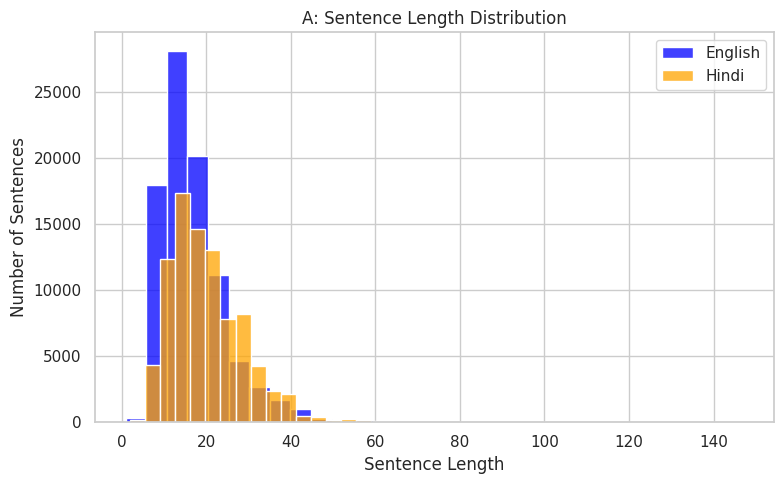

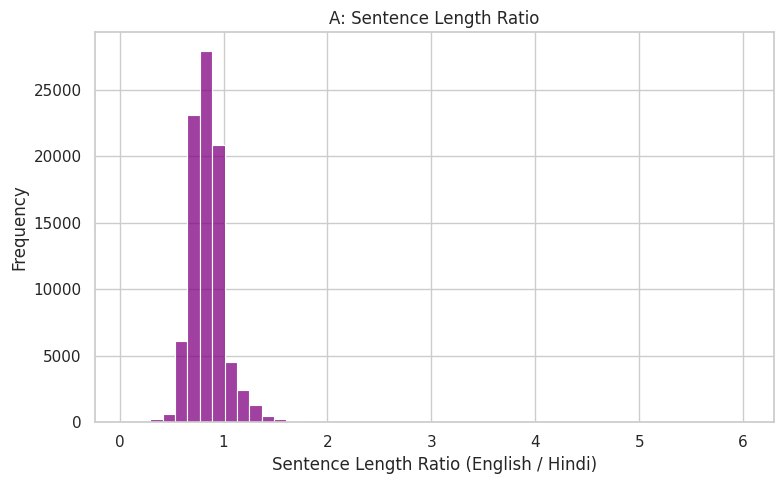

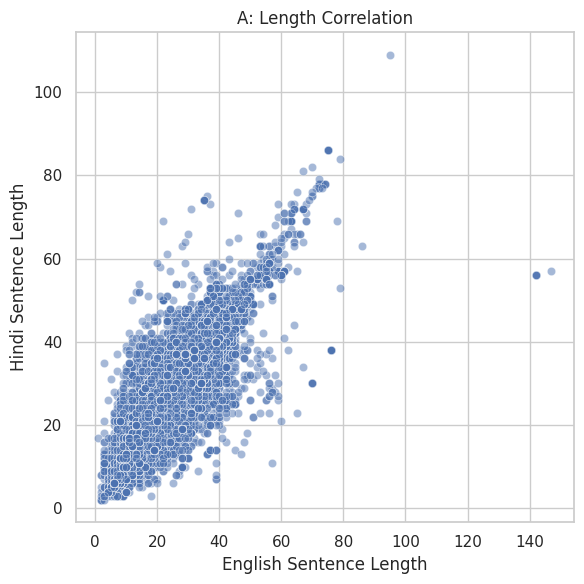


📊 Showing plots for B


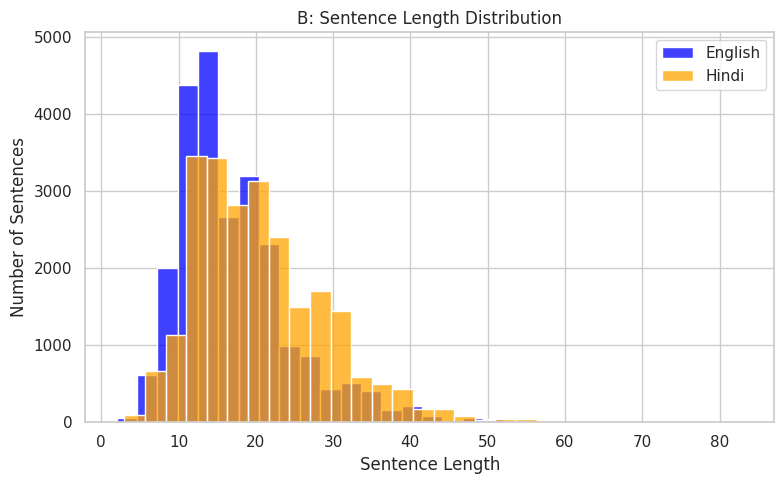

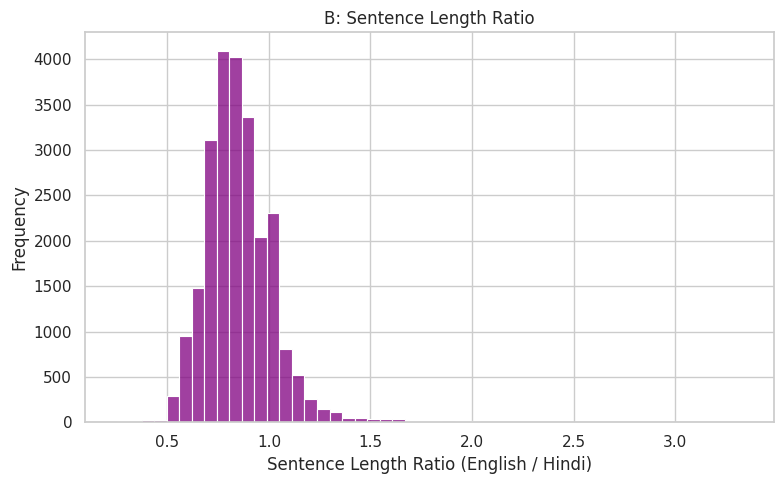

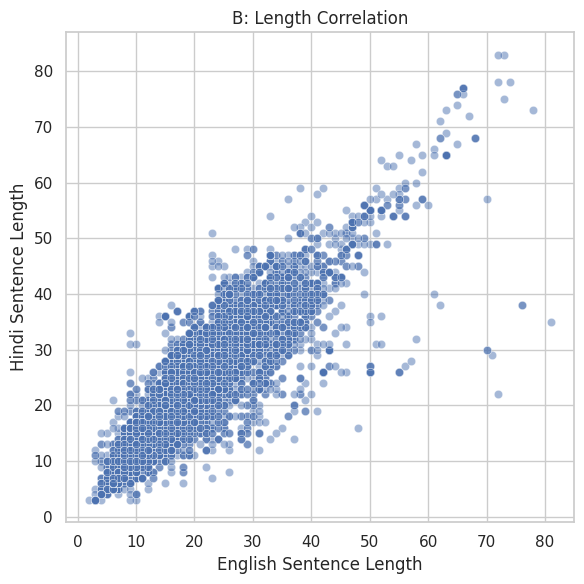


📊 Showing plots for C


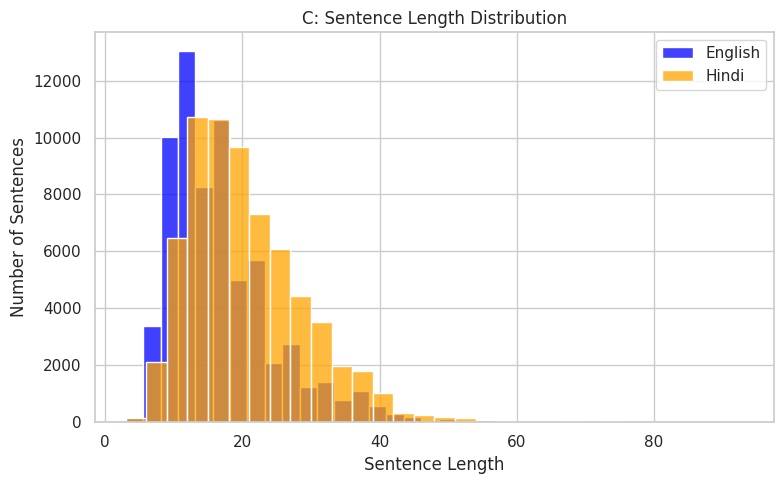

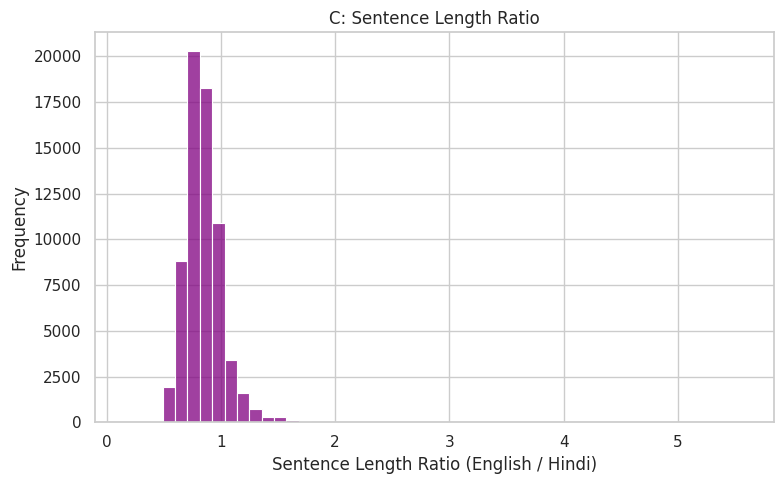

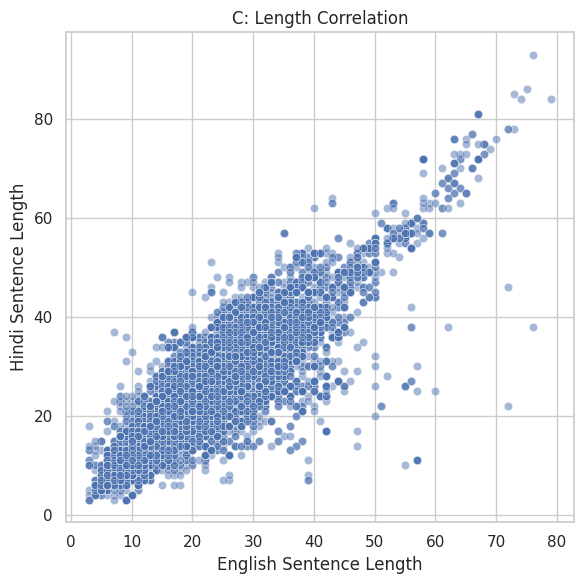


📊 Showing plots for D


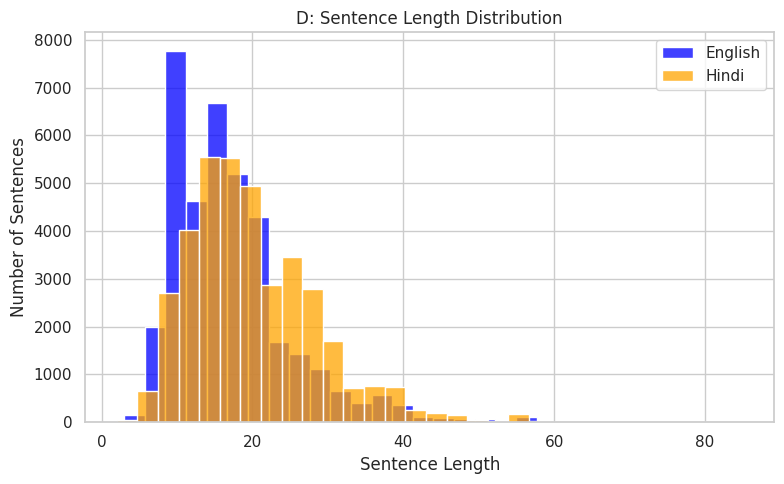

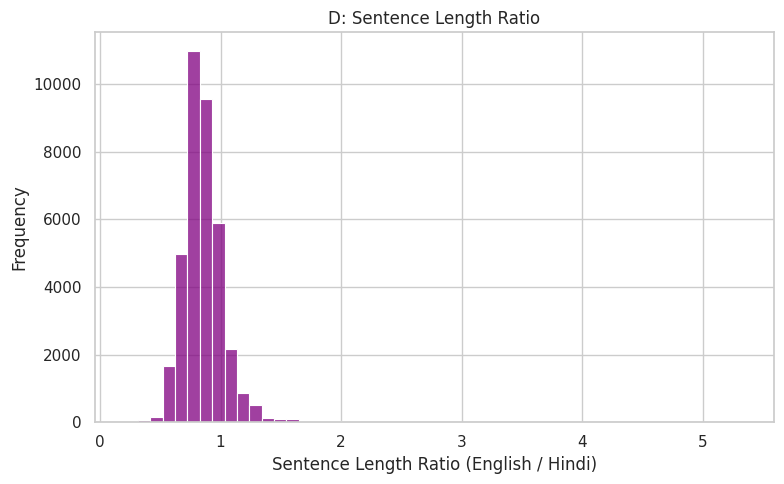

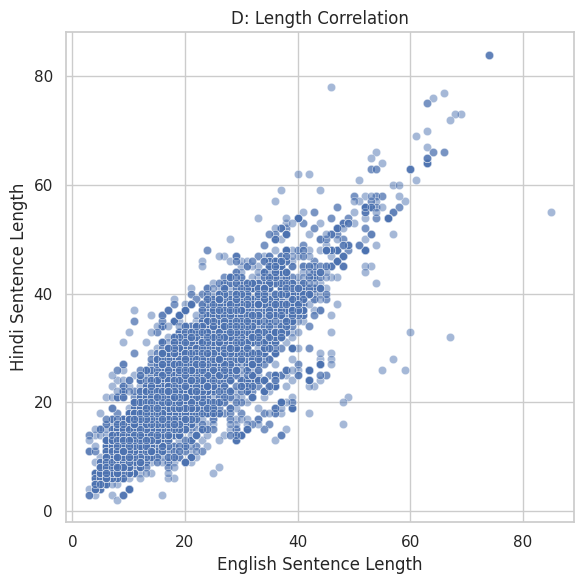


📊 Showing plots for E


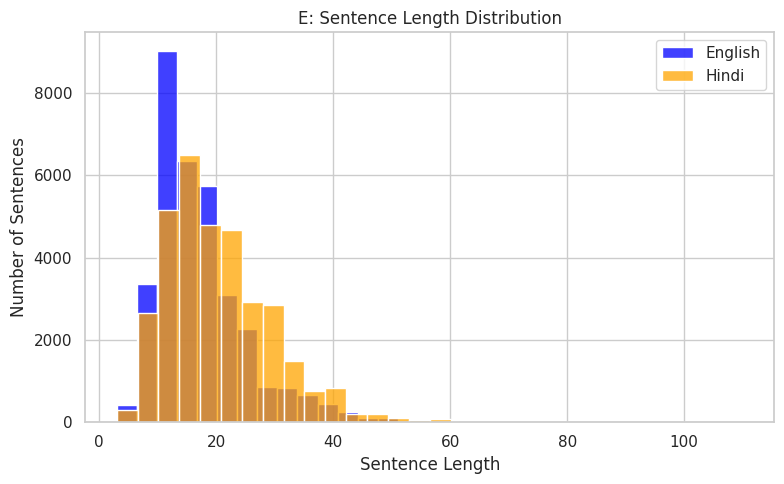

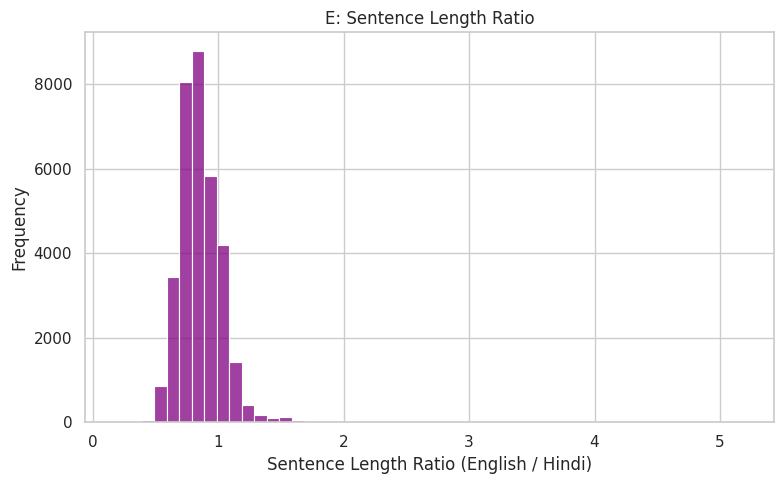

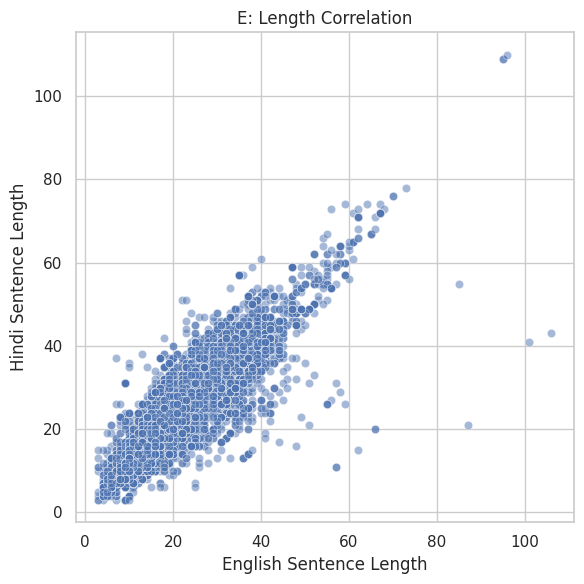


📊 Showing plots for F


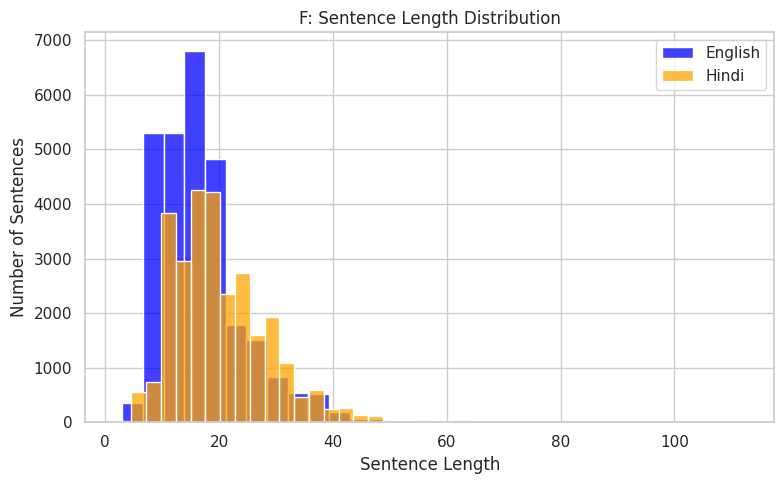

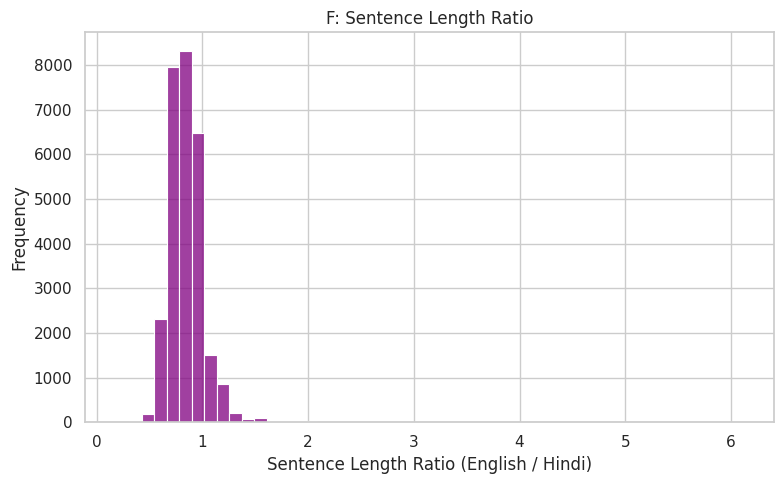

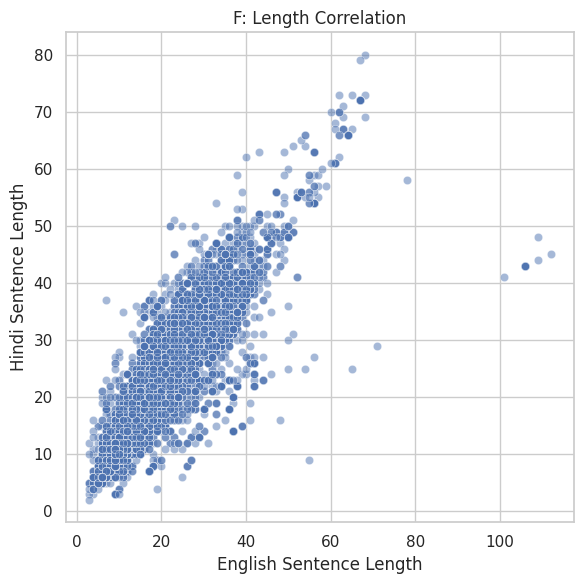


📊 Showing plots for G


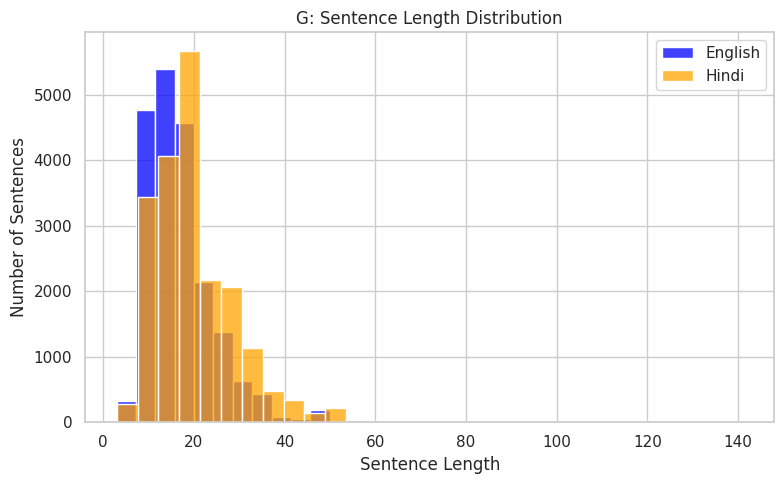

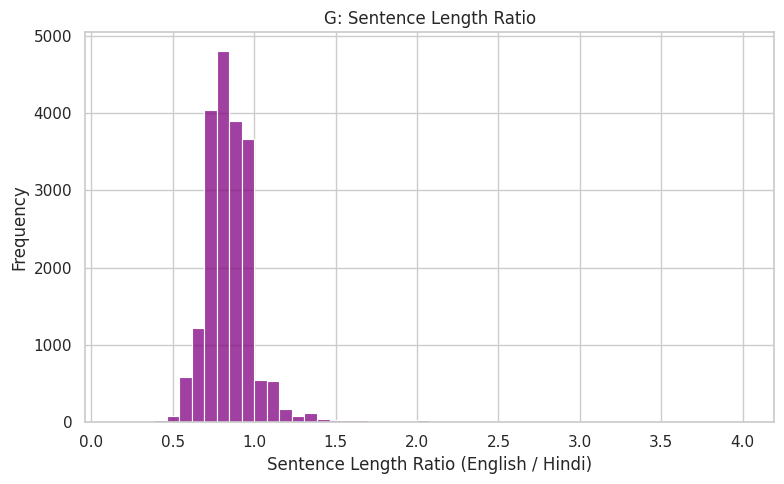

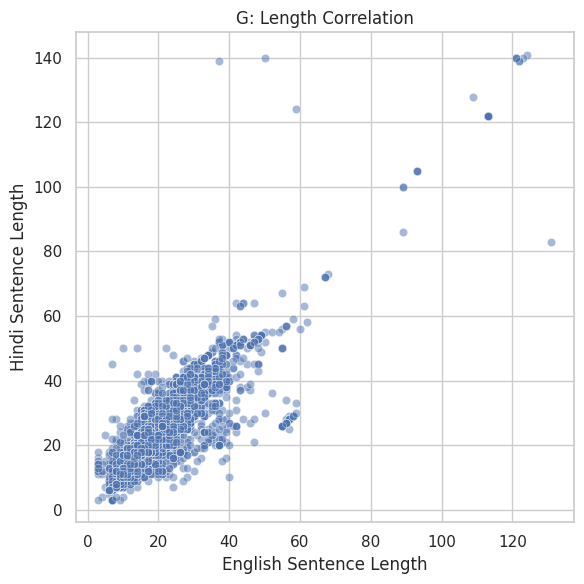


📊 Showing plots for H


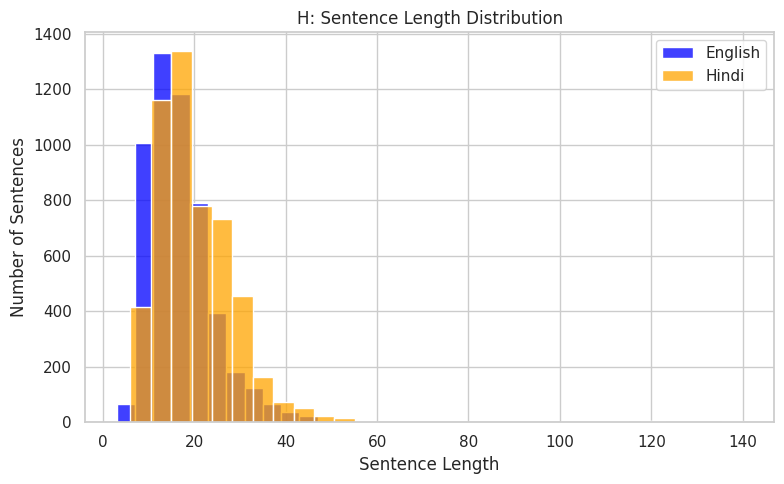

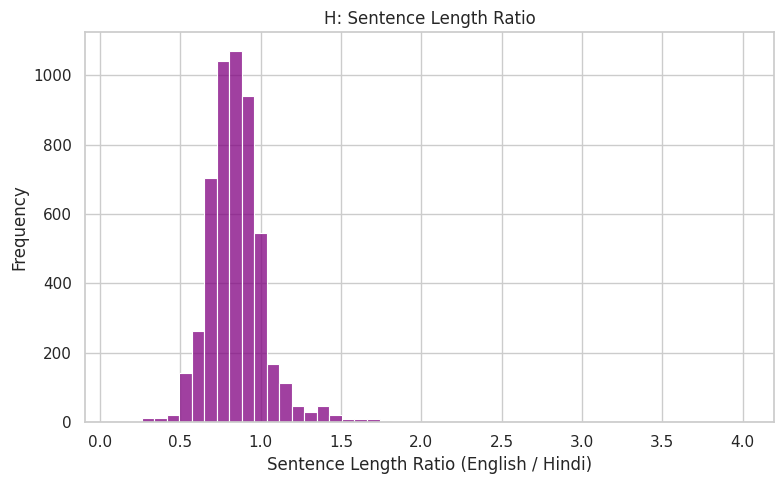

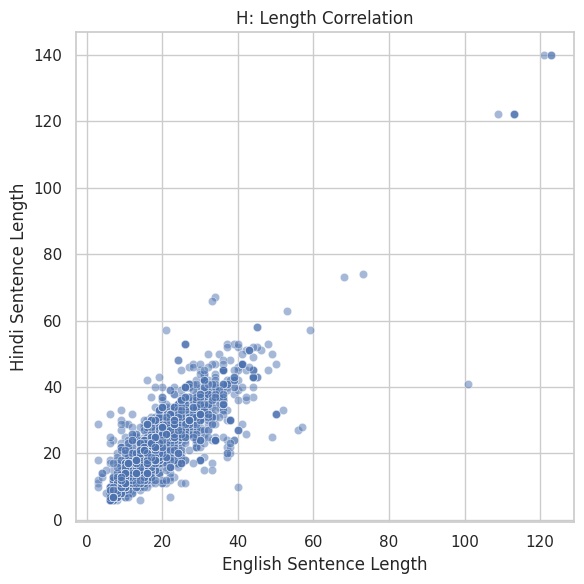


📊 Showing plots for I


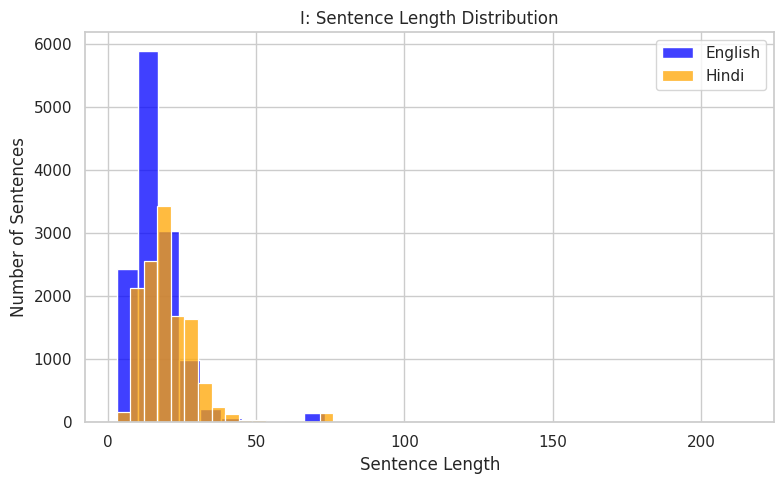

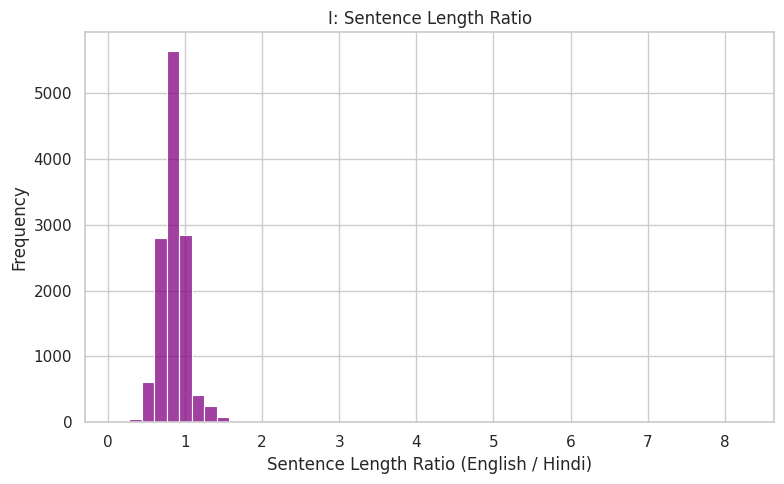

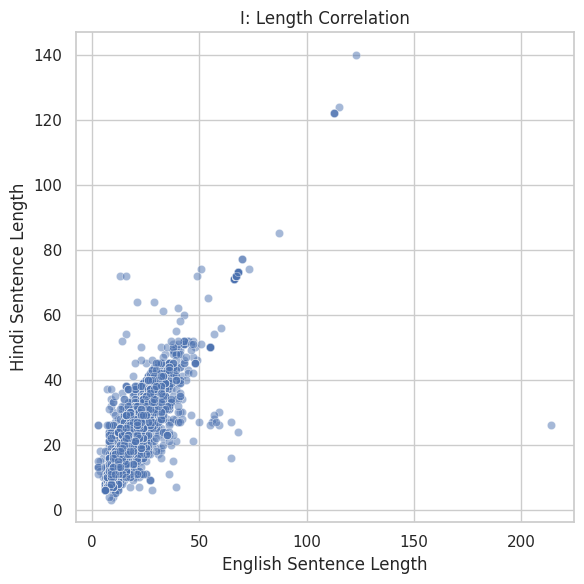


📊 Showing plots for J


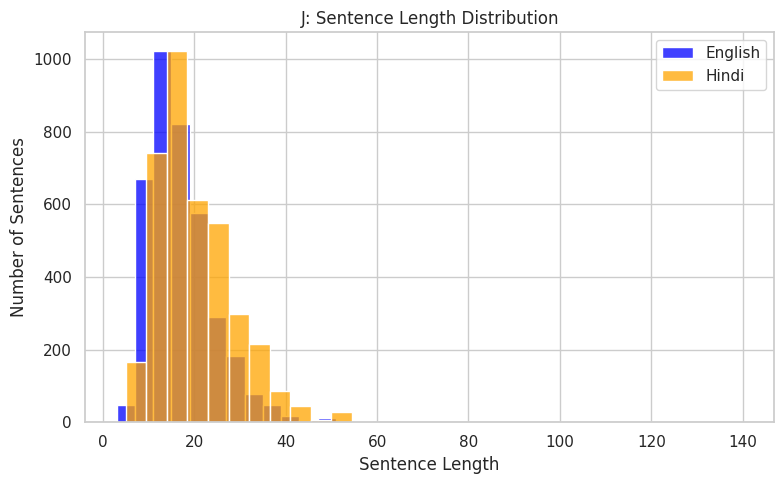

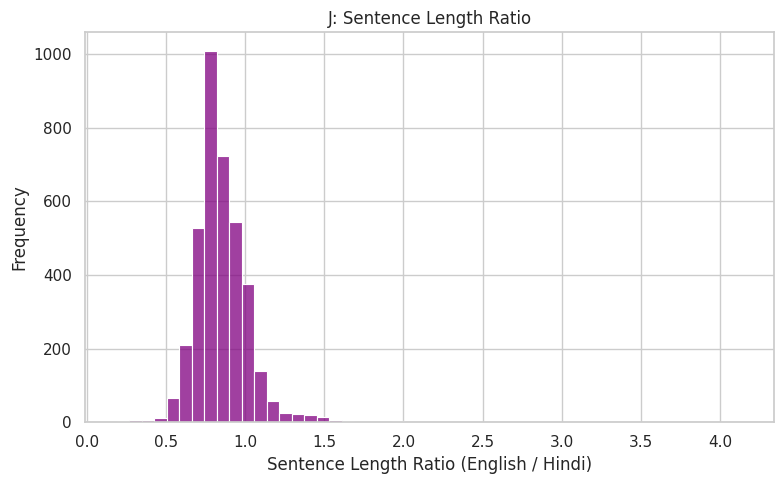

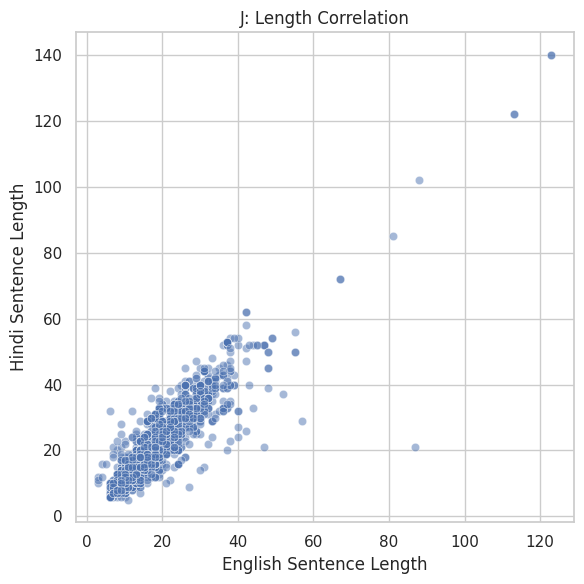


📊 Showing plots for K


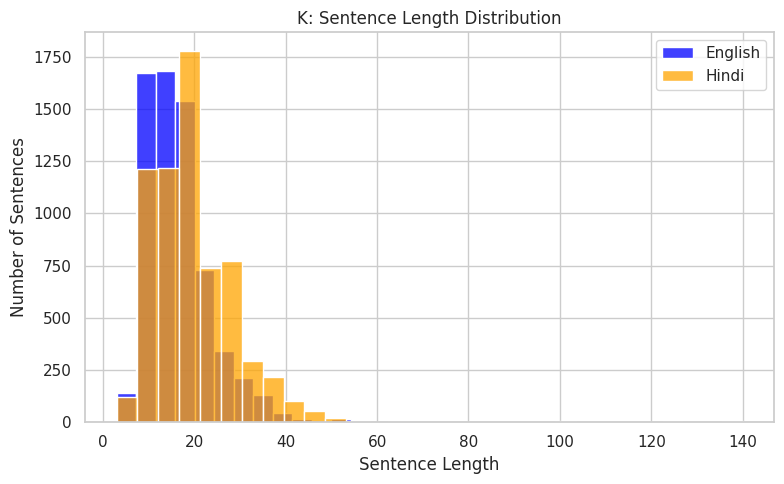

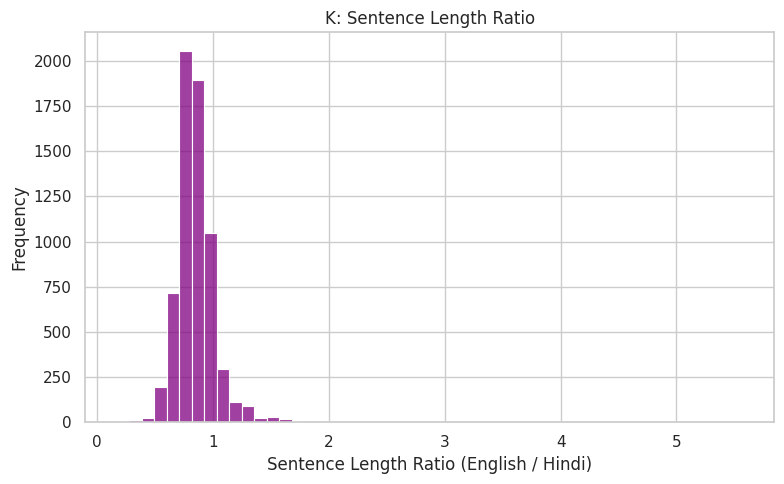

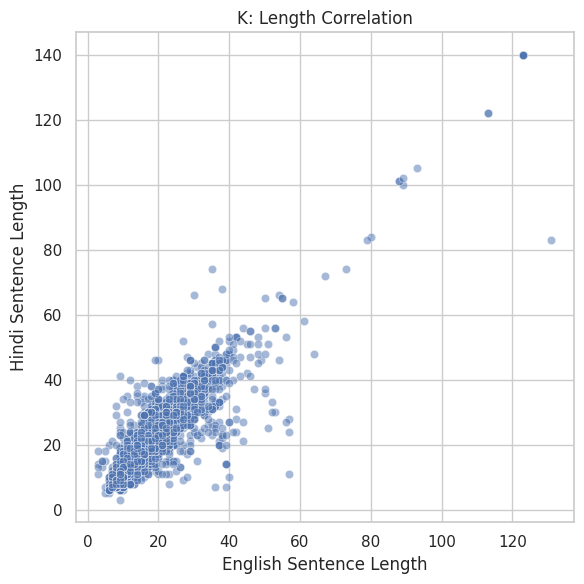


📊 Showing plots for L


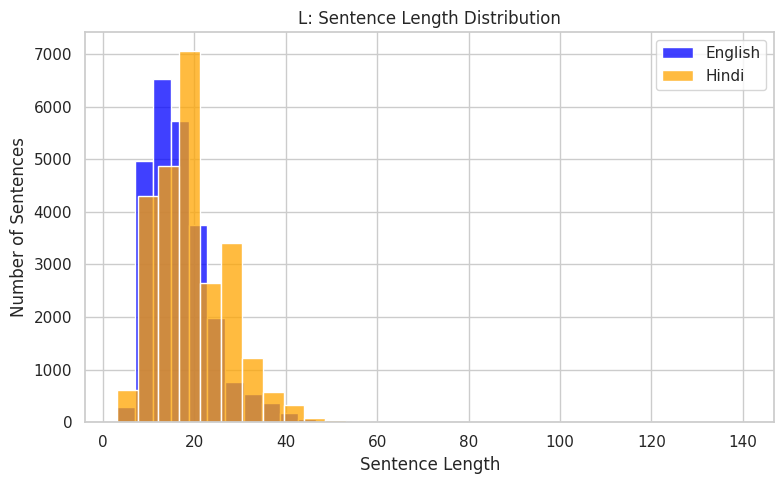

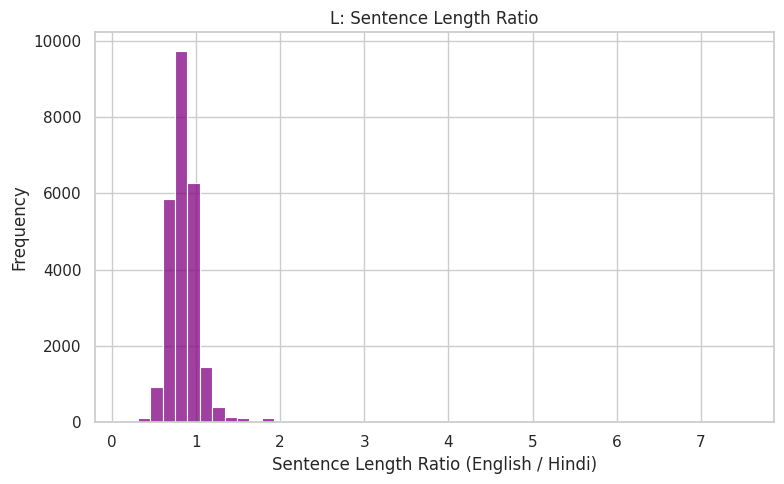

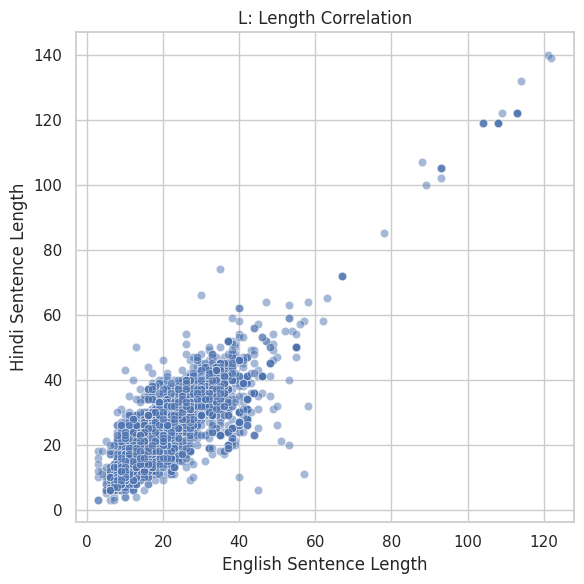


📊 Showing plots for M


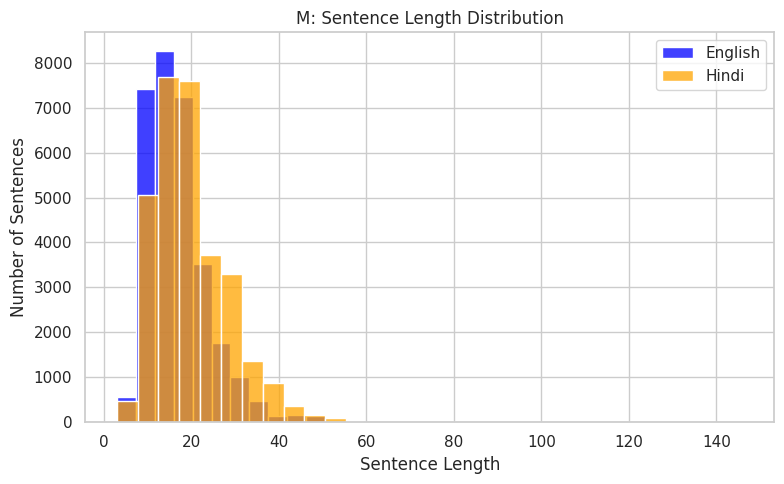

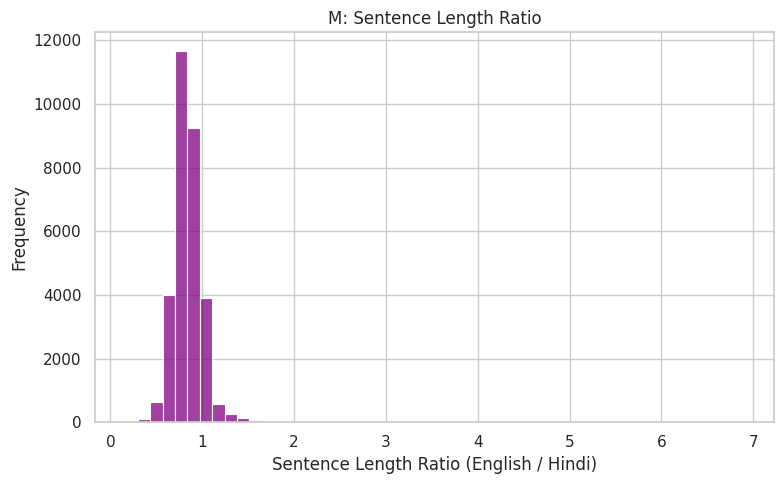

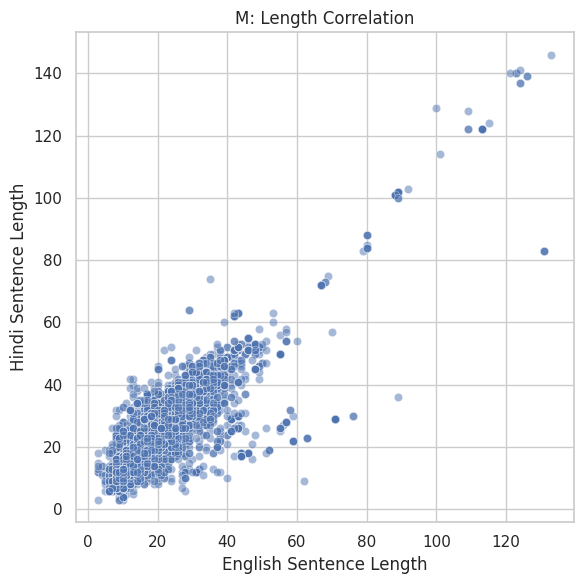


📊 Showing plots for N


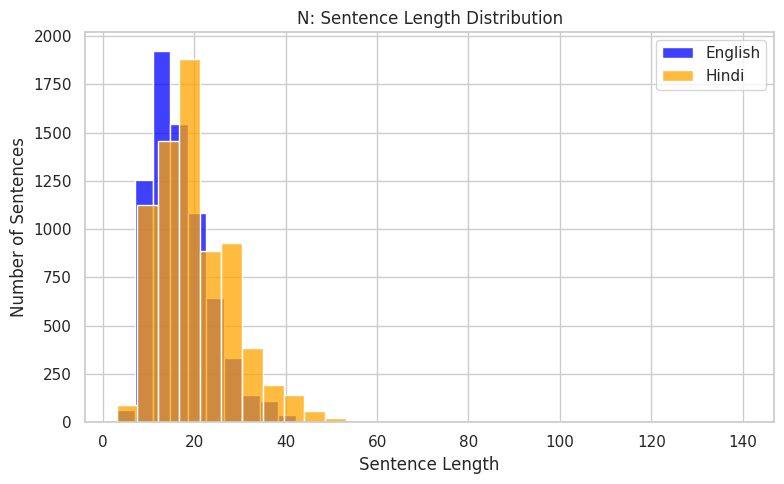

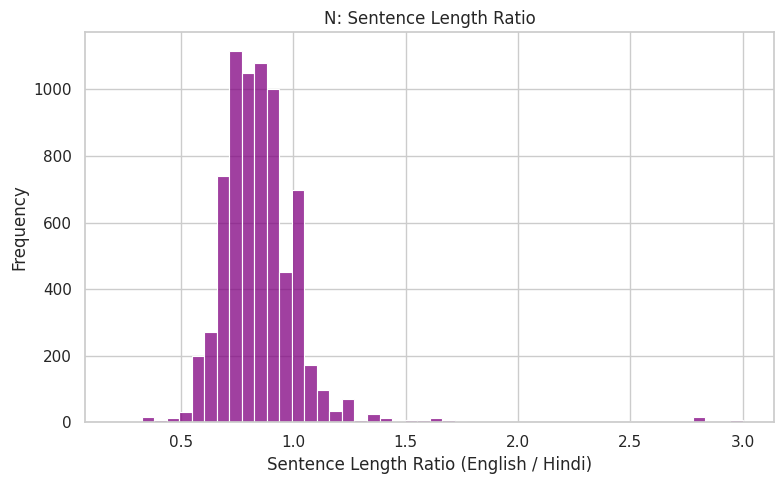

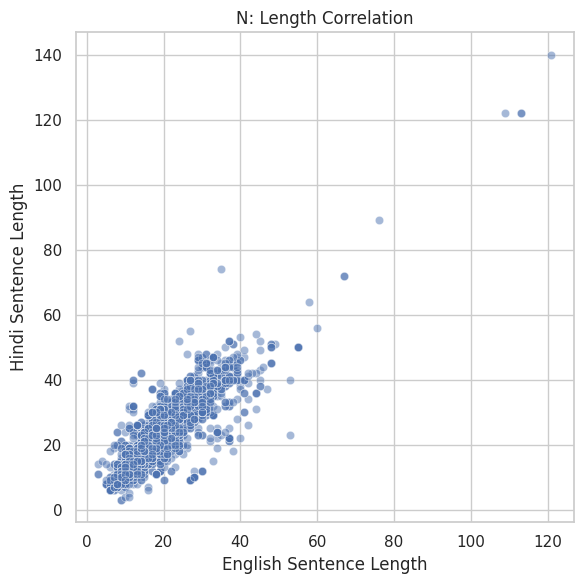


📊 Showing plots for O


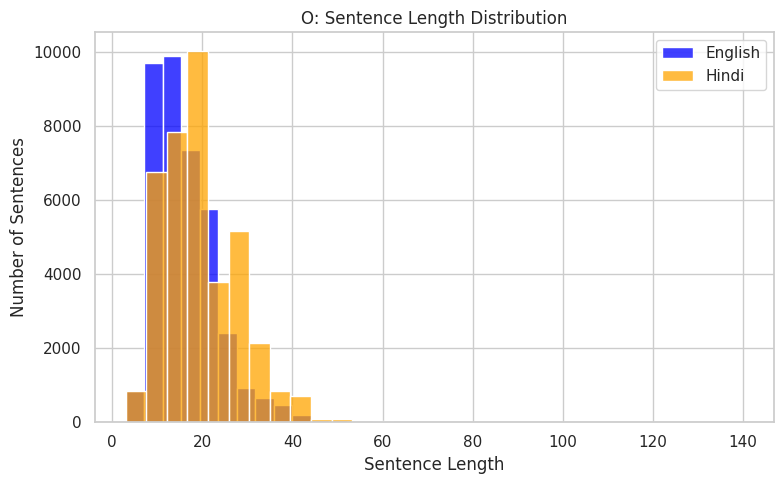

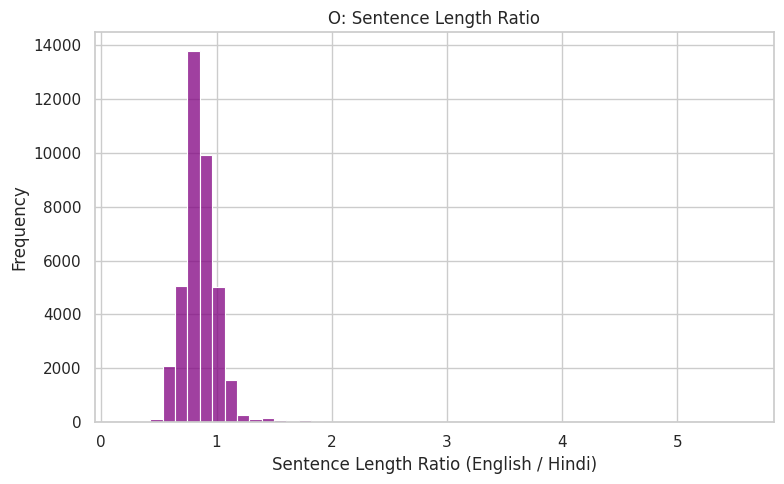

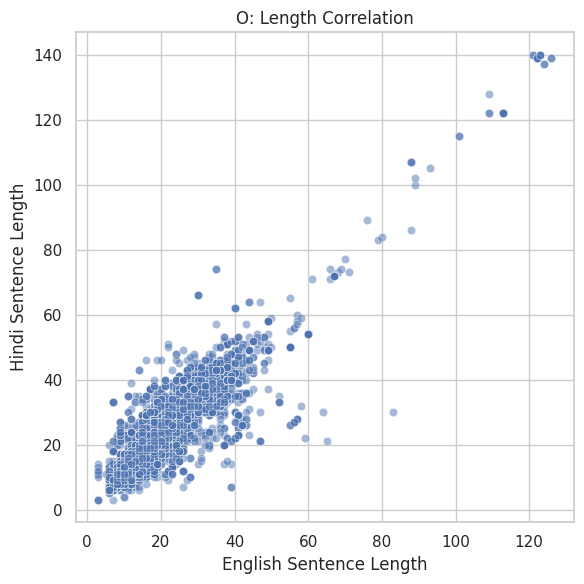


📊 Showing plots for P


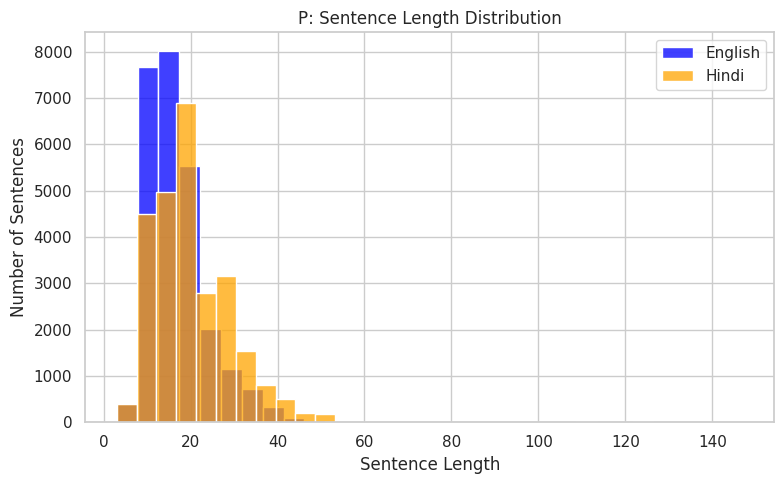

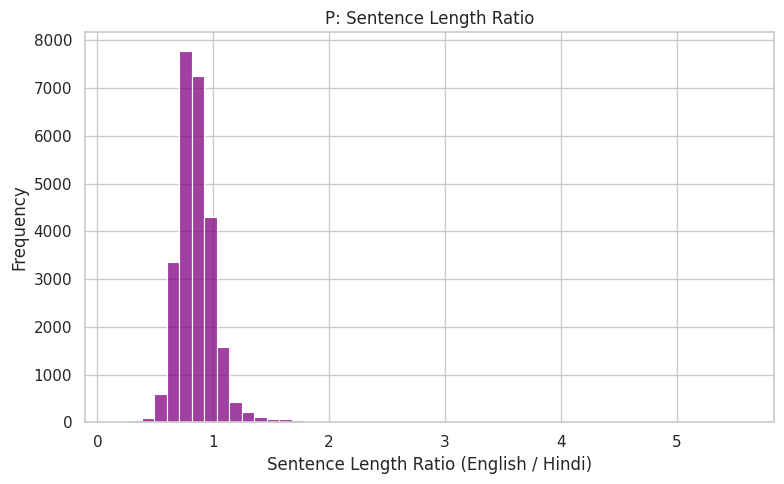

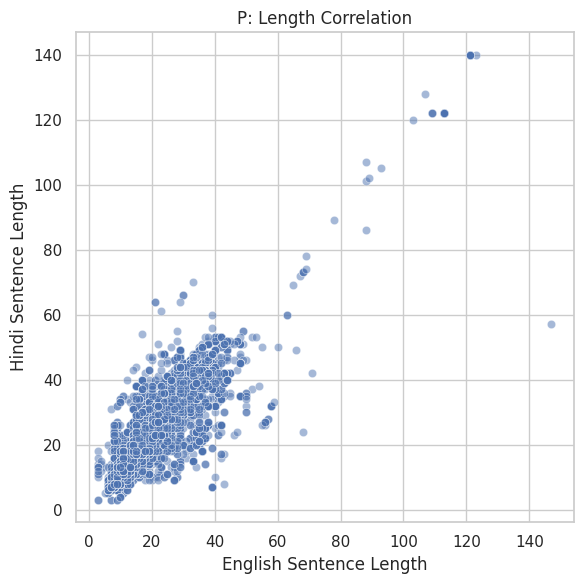


📊 Showing plots for Q


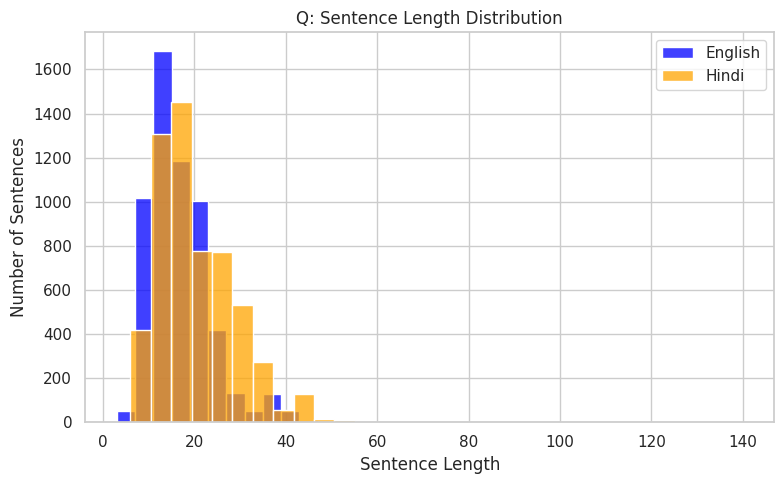

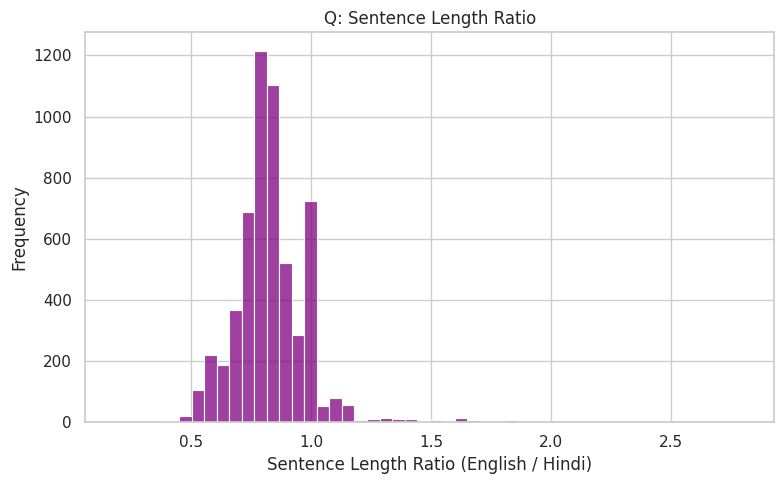

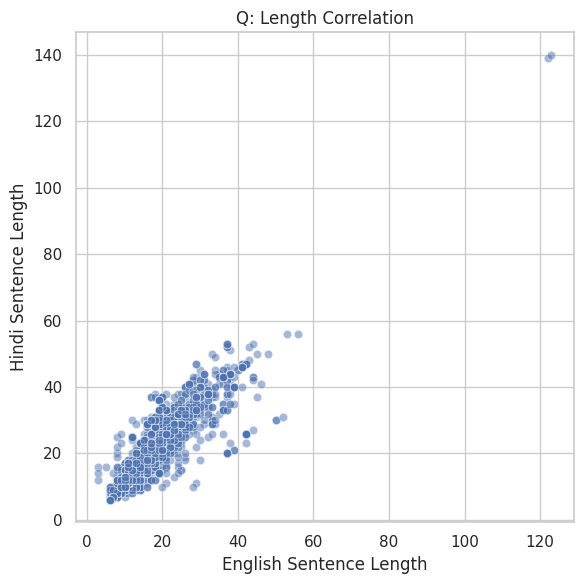


📊 Showing plots for R


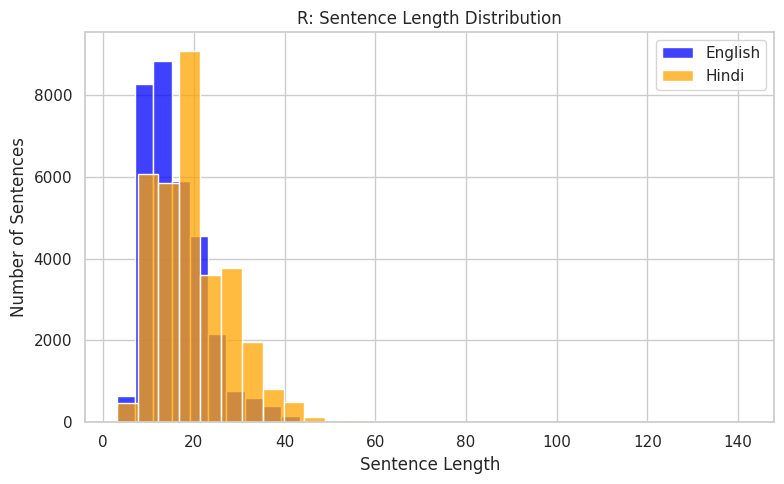

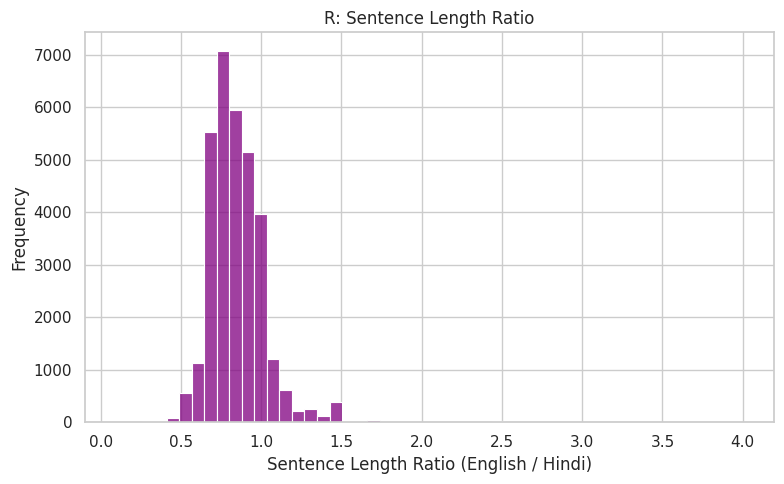

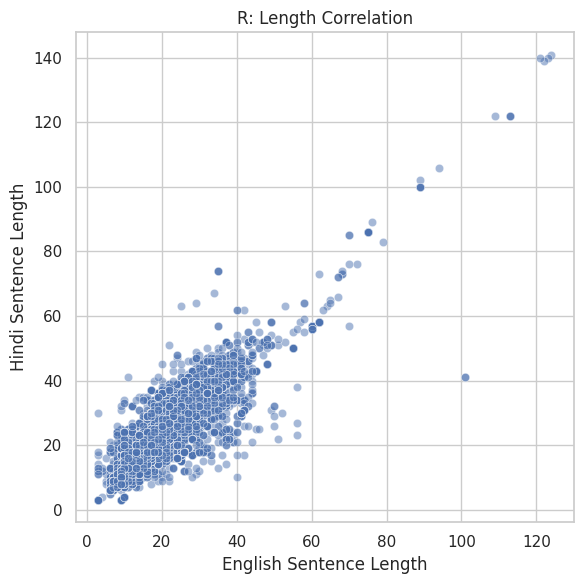


📊 Showing plots for S


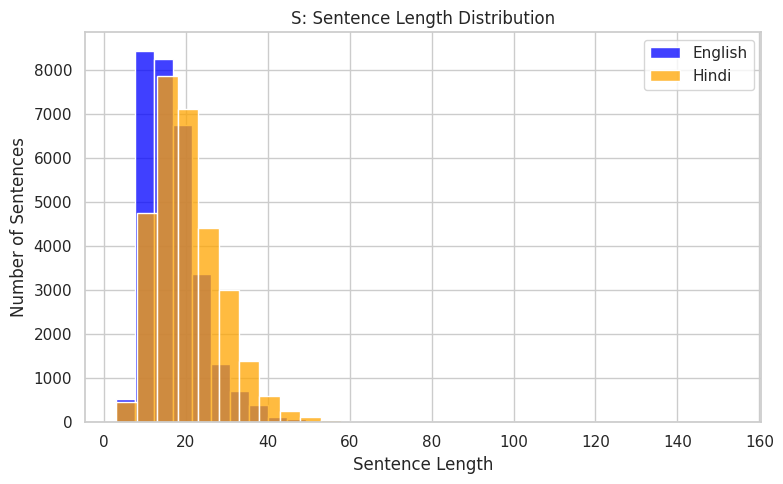

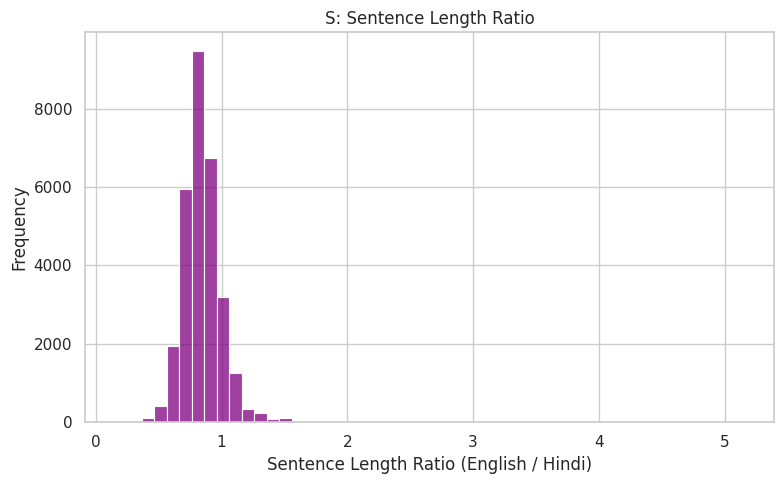

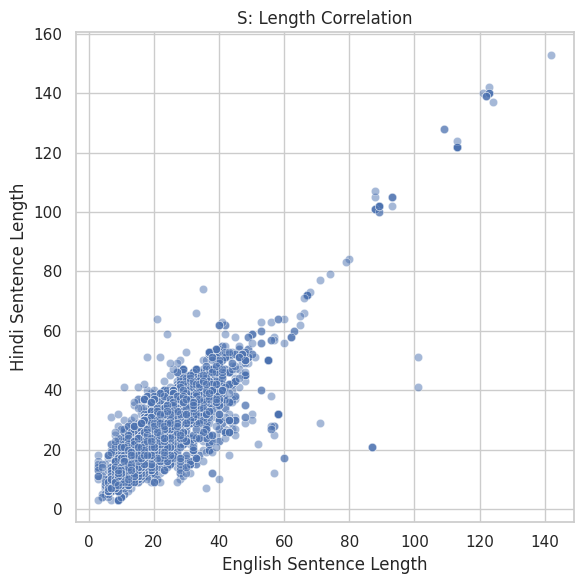


📊 Showing plots for T


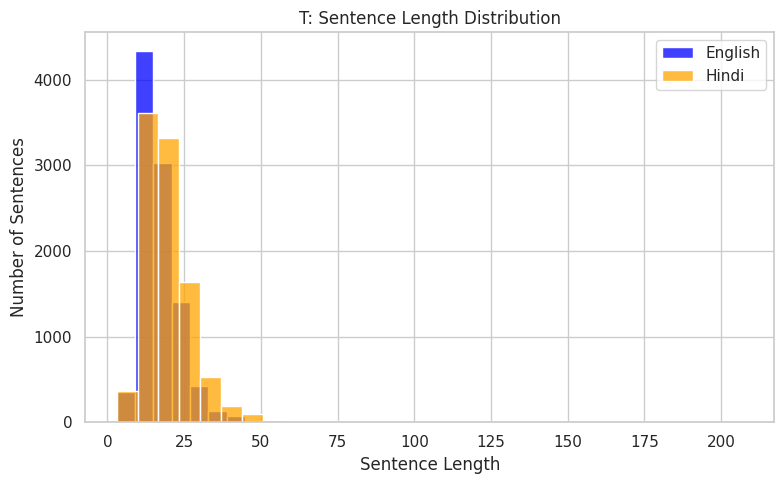

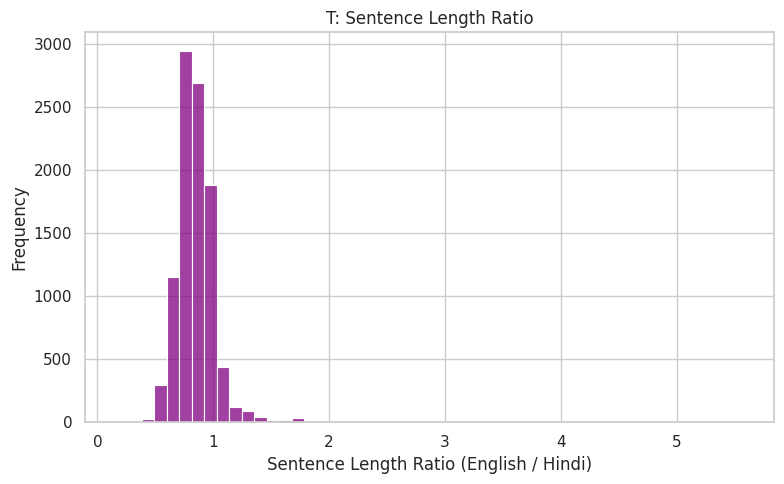

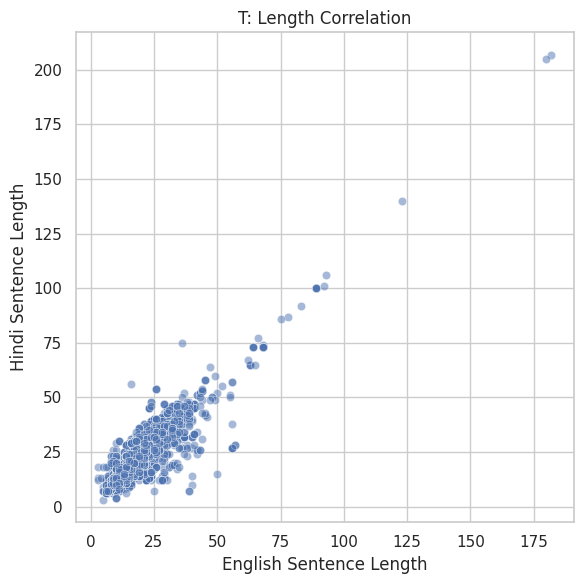


📊 Showing plots for U


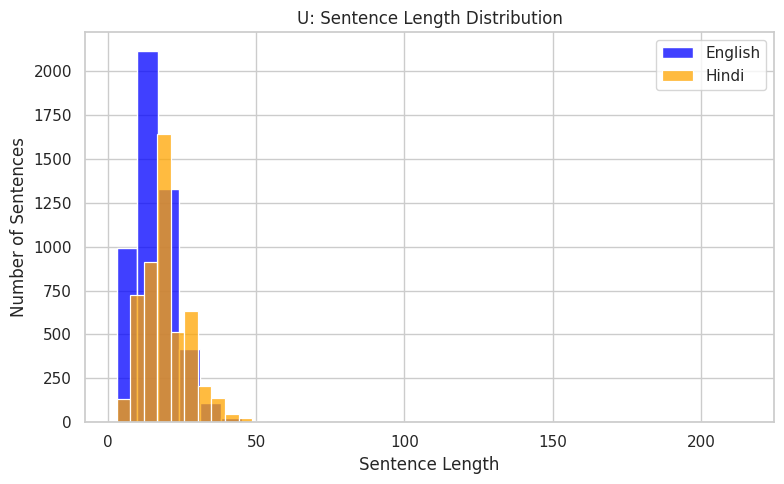

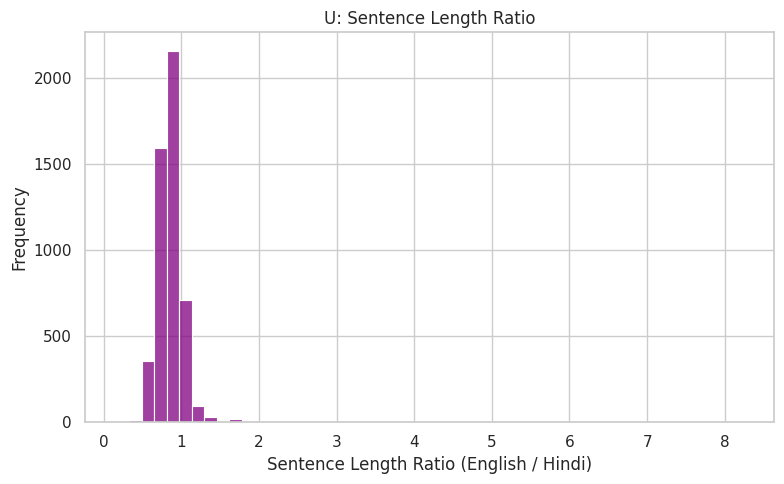

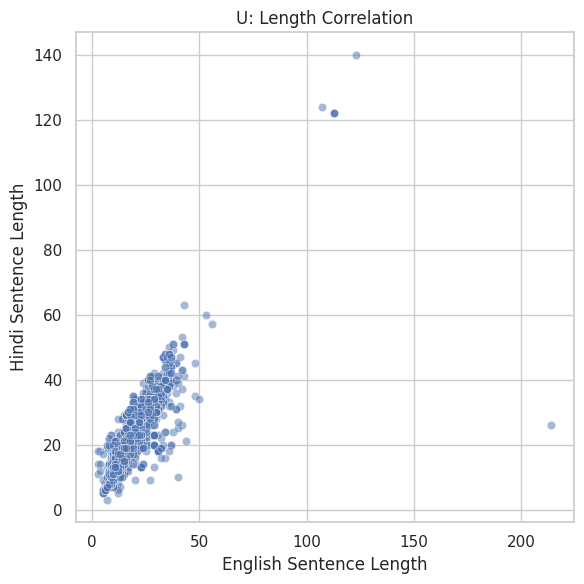


📊 Showing plots for V


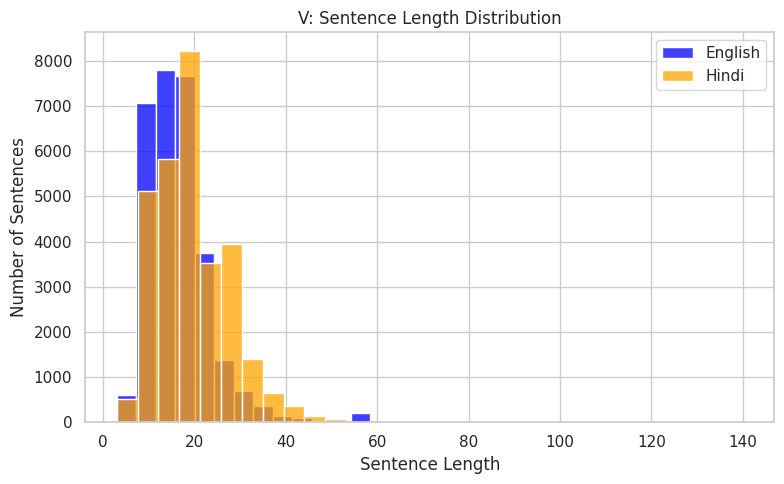

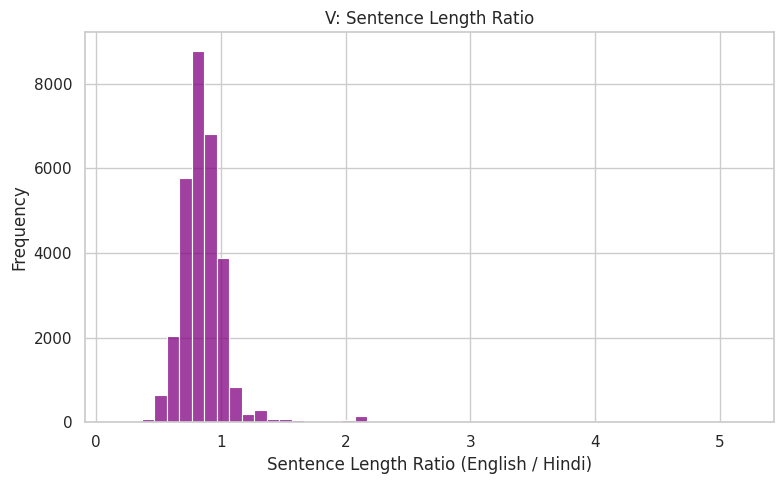

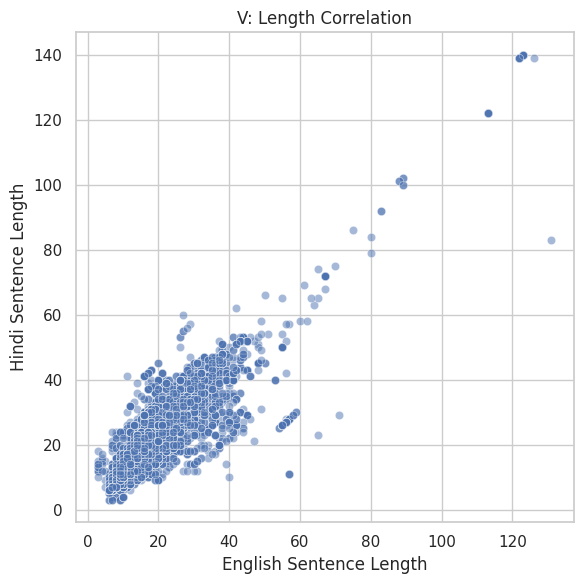


📊 Showing plots for W


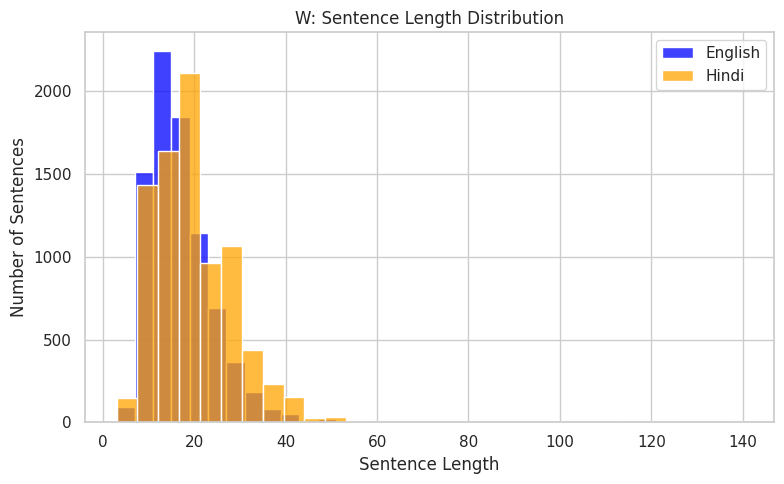

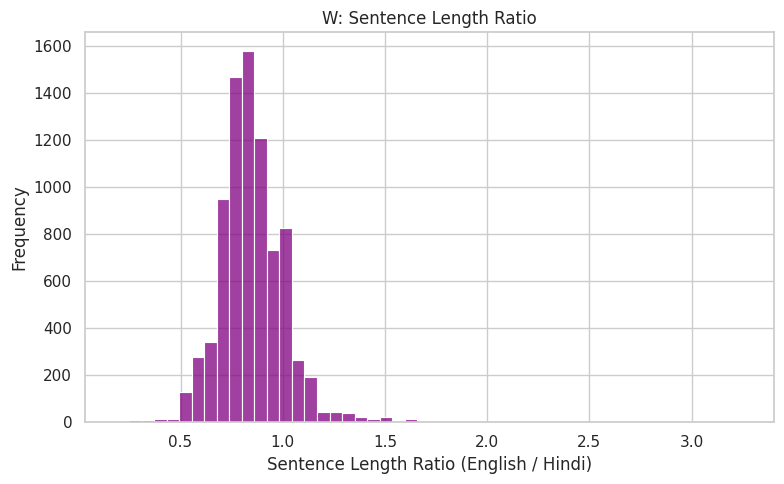

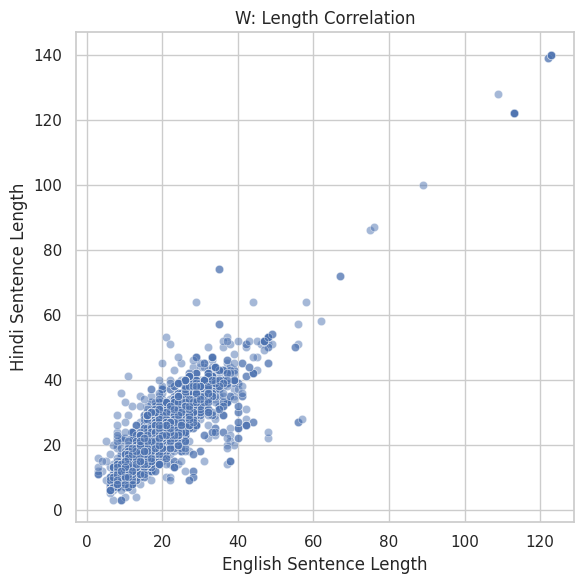


📊 Showing plots for X


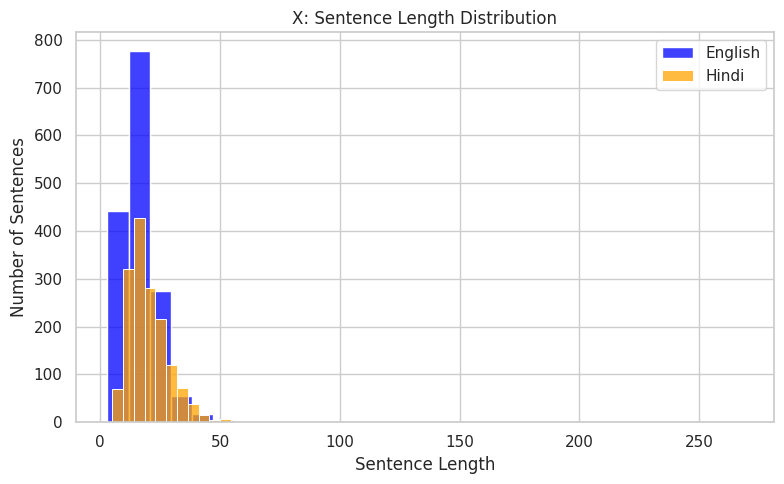

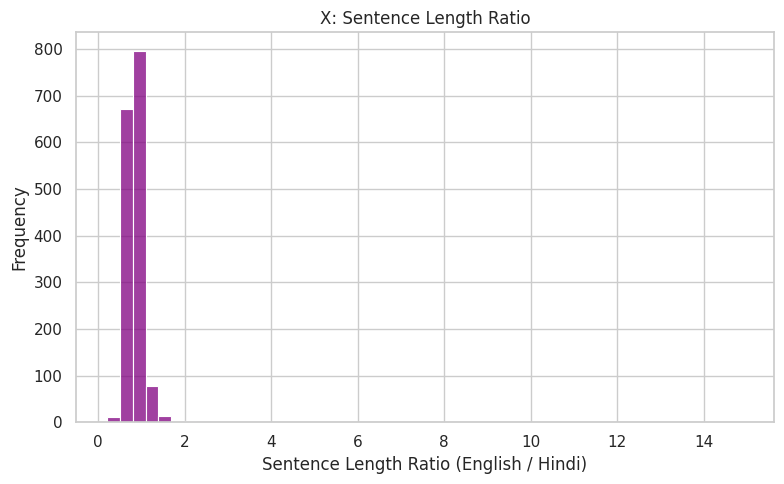

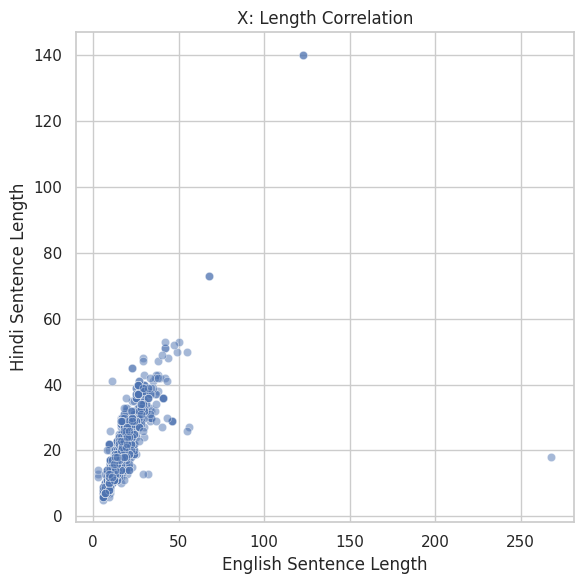


📊 Showing plots for Y


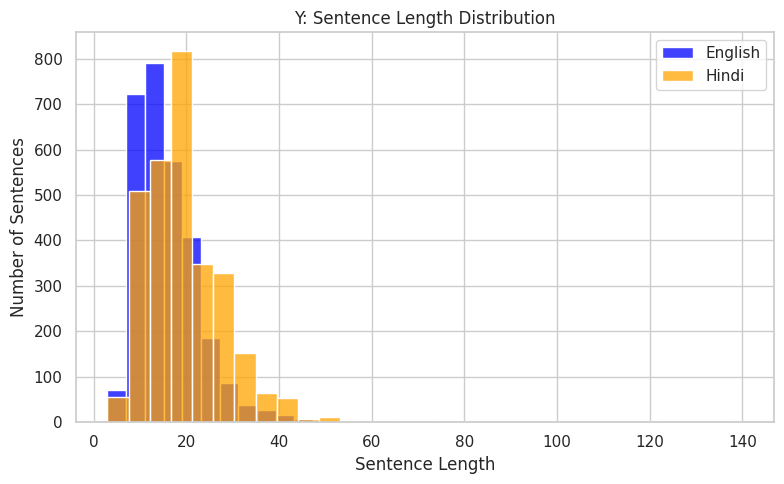

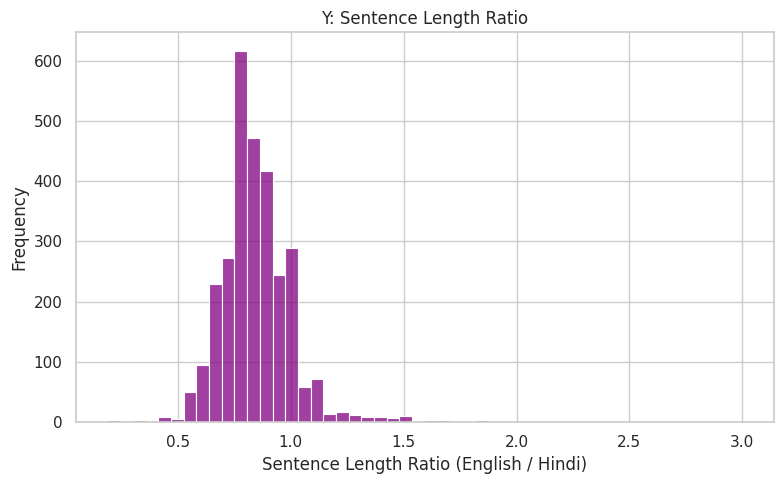

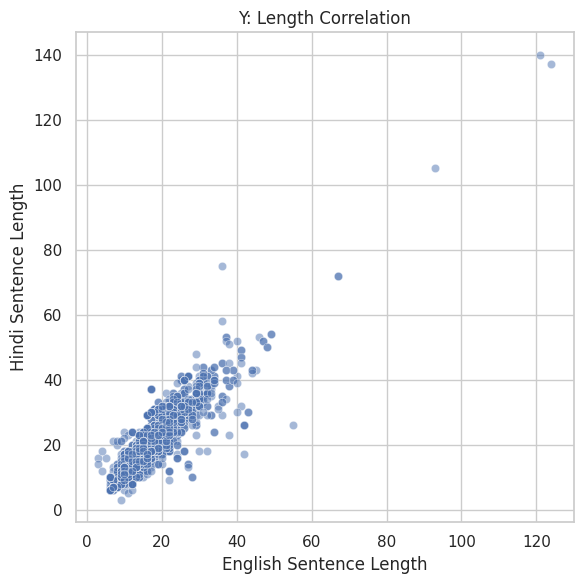


📊 Showing plots for Z


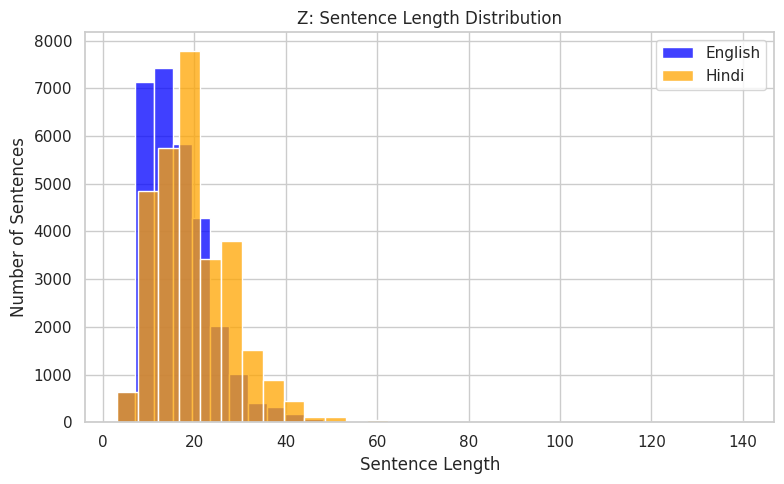

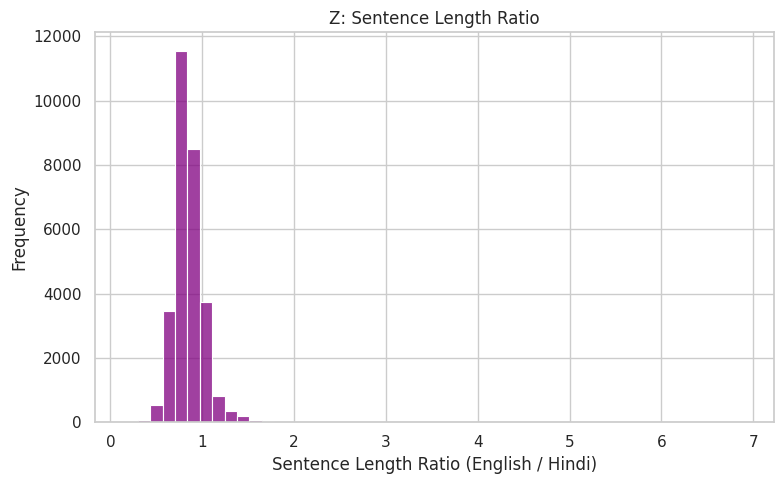

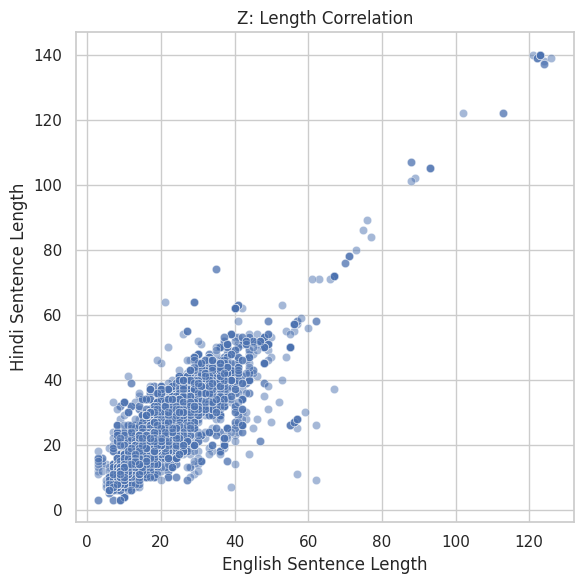

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Inline plot rendering for Colab
%matplotlib inline

# Set path
input_path = "/content/drive/MyDrive/Colab Notebooks/labse_output_rowbyrow"

# Files A to Z
files = [f"{chr(i)}_with_similarity.csv" for i in range(ord("A"), ord("Z")+1)]

# Plot settings
sns.set(style="whitegrid")

for file in files:
    try:
        file_path = os.path.join(input_path, file)
        if not os.path.exists(file_path):
            print(f"❌ Skipping {file}: Not found.")
            continue

        df = pd.read_csv(file_path)

        if not {"COLUMN-1", "COLUMN-2"}.issubset(df.columns):
            print(f"❌ Skipping {file}: Required columns not found.")
            continue

        df["eng_len"] = df["COLUMN-1"].astype(str).apply(lambda x: len(x.split()))
        df["hin_len"] = df["COLUMN-2"].astype(str).apply(lambda x: len(x.split()))
        df["ratio"] = df["eng_len"] / df["hin_len"].replace(0, 1)

        letter = file[0]
        print(f"\n📊 Showing plots for {letter}")

        # Histogram: Sentence Length Distribution
        plt.figure(figsize=(8, 5))
        sns.histplot(df["eng_len"], color="blue", label="English", kde=False, bins=30)
        sns.histplot(df["hin_len"], color="orange", label="Hindi", kde=False, bins=30)
        plt.xlabel("Sentence Length")
        plt.ylabel("Number of Sentences")
        plt.title(f"{letter}: Sentence Length Distribution")
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Histogram: Sentence Length Ratio
        plt.figure(figsize=(8, 5))
        sns.histplot(df["ratio"], bins=50, color="purple")
        plt.xlabel("Sentence Length Ratio (English / Hindi)")
        plt.ylabel("Frequency")
        plt.title(f"{letter}: Sentence Length Ratio")
        plt.tight_layout()
        plt.show()

        # Scatter Plot: Correlation
        plt.figure(figsize=(6, 6))
        sns.scatterplot(x="eng_len", y="hin_len", data=df, alpha=0.5)
        plt.xlabel("English Sentence Length")
        plt.ylabel("Hindi Sentence Length")
        plt.title(f"{letter}: Length Correlation")
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ Error in {file}: {e}")



✅ Combined total sentences: 609603


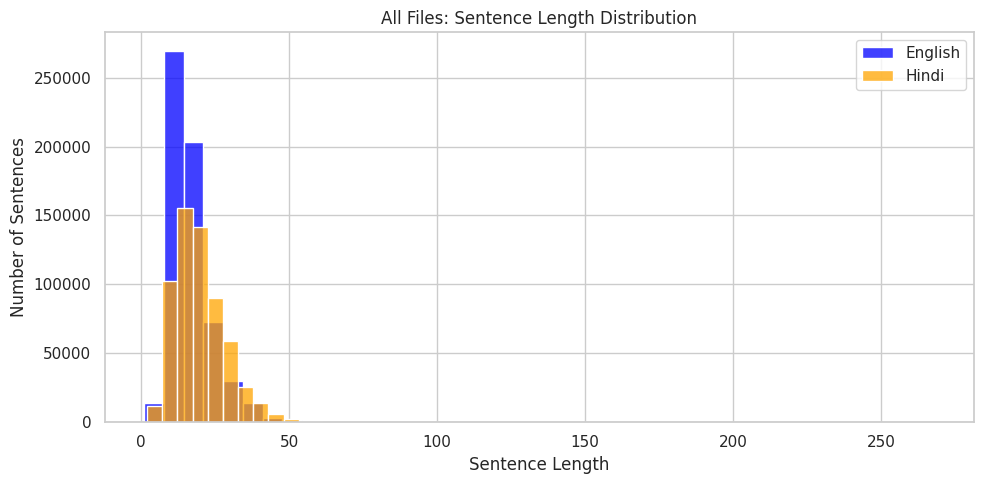

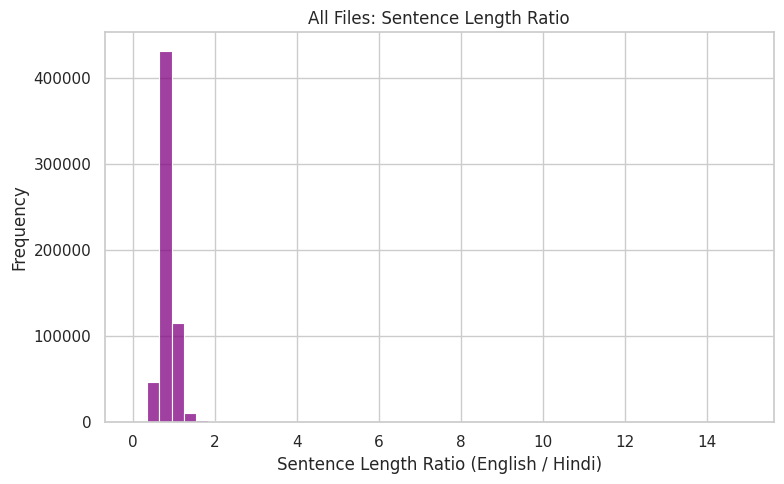

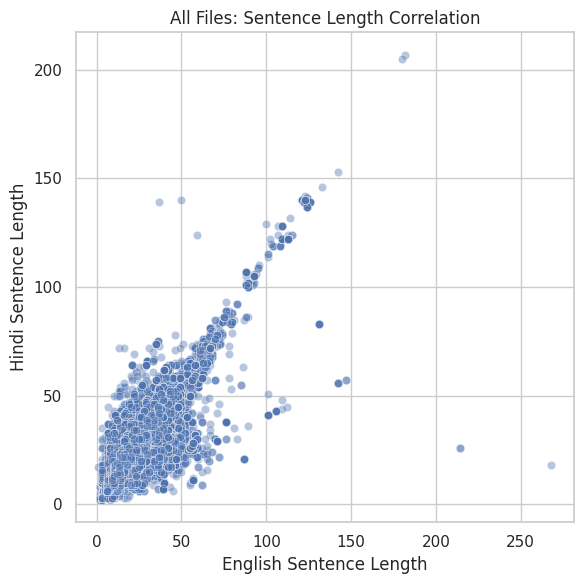

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Inline plots
%matplotlib inline
sns.set(style="whitegrid")

# Path to all files
input_path = "/content/drive/MyDrive/Colab Notebooks/labse_output_rowbyrow"
files = [f"{chr(i)}_with_similarity.csv" for i in range(ord("A"), ord("Z")+1)]

# Combine all files
dfs = []
for file in files:
    file_path = os.path.join(input_path, file)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        if {"COLUMN-1", "COLUMN-2"}.issubset(df.columns):
            dfs.append(df)
        else:
            print(f"⚠️ Missing columns in: {file}")
    else:
        print(f"❌ File not found: {file}")

# Concatenate all
df_combined = pd.concat(dfs, ignore_index=True)
df_combined["eng_len"] = df_combined["COLUMN-1"].astype(str).apply(lambda x: len(x.split()))
df_combined["hin_len"] = df_combined["COLUMN-2"].astype(str).apply(lambda x: len(x.split()))
df_combined["ratio"] = df_combined["eng_len"] / df_combined["hin_len"].replace(0, 1)

print(f"\n✅ Combined total sentences: {len(df_combined)}")

# 📊 Histogram: Sentence Length Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_combined["eng_len"], color="blue", label="English", bins=40)
sns.histplot(df_combined["hin_len"], color="orange", label="Hindi", bins=40)
plt.xlabel("Sentence Length")
plt.ylabel("Number of Sentences")
plt.title("All Files: Sentence Length Distribution")
plt.legend()
plt.tight_layout()
plt.show()

# 📊 Histogram: Sentence Length Ratio
plt.figure(figsize=(8, 5))
sns.histplot(df_combined["ratio"], bins=50, color="purple")
plt.xlabel("Sentence Length Ratio (English / Hindi)")
plt.ylabel("Frequency")
plt.title("All Files: Sentence Length Ratio")
plt.tight_layout()
plt.show()

# 📈 Scatter Plot: Sentence Length Correlation
plt.figure(figsize=(6, 6))
sns.scatterplot(x="eng_len", y="hin_len", data=df_combined, alpha=0.4)
plt.xlabel("English Sentence Length")
plt.ylabel("Hindi Sentence Length")
plt.title("All Files: Sentence Length Correlation")
plt.tight_layout()
plt.show()


✅ Total Similarity Scores Loaded: 609603


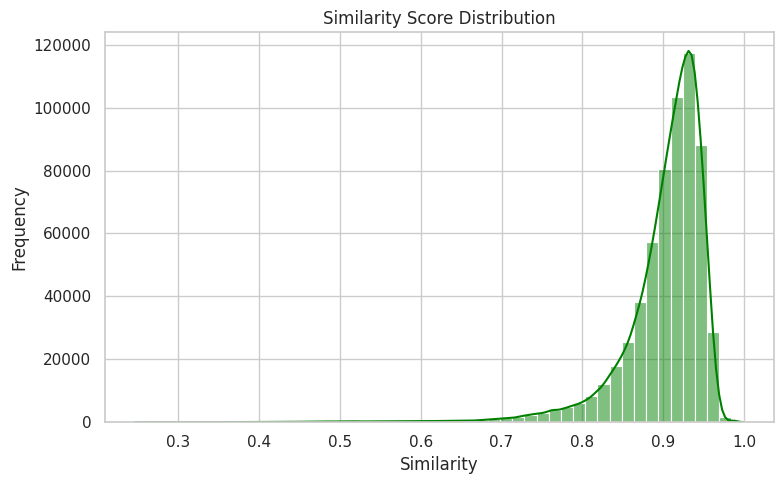

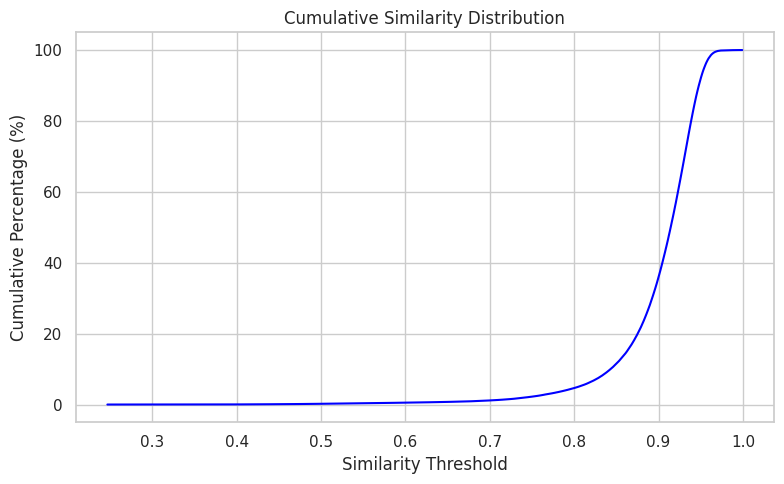

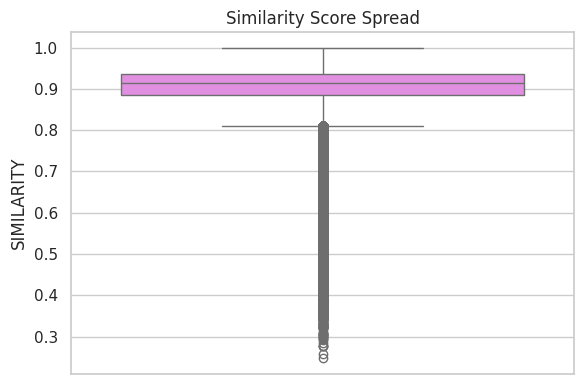

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Inline display
%matplotlib inline
sns.set(style="whitegrid")

# Path to similarity files
input_path = "/content/drive/MyDrive/Colab Notebooks/labse_output_rowbyrow"
files = [f"{chr(i)}_with_similarity.csv" for i in range(ord("A"), ord("Z")+1)]

# Collect similarity scores
similarities = []

for file in files:
    path = os.path.join(input_path, file)
    if os.path.exists(path):
        df = pd.read_csv(path)
        if "SIMILARITY" in df.columns:
            similarities.extend(df["SIMILARITY"].dropna().tolist())

# Convert to DataFrame
sim_df = pd.DataFrame({"SIMILARITY": similarities})
print(f"✅ Total Similarity Scores Loaded: {len(sim_df)}")

# 🔹 1. Similarity Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(sim_df["SIMILARITY"], bins=50, color="green", kde=True)
plt.title("Similarity Score Distribution")
plt.xlabel("Similarity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 🔹 2. Cumulative Distribution
plt.figure(figsize=(8, 5))
sim_df_sorted = sim_df.sort_values("SIMILARITY").reset_index(drop=True)
sim_df_sorted["cumulative_percent"] = sim_df_sorted.index / len(sim_df_sorted) * 100
plt.plot(sim_df_sorted["SIMILARITY"], sim_df_sorted["cumulative_percent"], color="blue")
plt.xlabel("Similarity Threshold")
plt.ylabel("Cumulative Percentage (%)")
plt.title("Cumulative Similarity Distribution")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔹 3. Boxplot to Spot Outliers
plt.figure(figsize=(6, 4))
sns.boxplot(y="SIMILARITY", data=sim_df, color="violet")
plt.title("Similarity Score Spread")
plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd

# Define paths
input_path = "/content/drive/MyDrive/Colab Notebooks/labse_output_rowbyrow"
output_path = input_path  # Same as input
output_suffix = "_filtered_above_08.csv"
summary = []

for letter in [chr(c) for c in range(ord("A"), ord("Z") + 1)]:
    file_name = f"{letter}_with_similarity.csv"
    file_path = os.path.join(input_path, file_name)

    if not os.path.exists(file_path):
        print(f"❌ Skipping {letter}: File not found.")
        continue

    try:
        # Load file
        df = pd.read_csv(file_path)
        original_len = len(df)

        # Apply similarity threshold
        df_filtered = df[df["SIMILARITY"] >= 0.8]
        filtered_len = len(df_filtered)

        # Save filtered file
        output_file = os.path.join(output_path, f"{letter}{output_suffix}")
        df_filtered.to_csv(output_file, index=False)

        # Print and record
        print(f"🔹 {letter}: {filtered_len} / {original_len} rows kept (≥ 0.8)")
        summary.append({
            "File": letter,
            "Original Count": original_len,
            "Filtered Count (≥ 0.8)": filtered_len,
            "Retention %": round((filtered_len / original_len) * 100, 2) if original_len else 0
        })

    except Exception as e:
        print(f"❌ Error processing {letter}: {e}")

# Display summary
summary_df = pd.DataFrame(summary)
print("\n📊 Summary: Rows Before vs After Applying Similarity Threshold (0.8)")
print(summary_df.to_string(index=False))

# Save summary in same directory
summary_csv_path = os.path.join(output_path, "threshold_08_summary.csv")
summary_df.to_csv(summary_csv_path, index=False)


🔹 A: 81199 / 88277 rows kept (≥ 0.8)
🔹 B: 22185 / 23876 rows kept (≥ 0.8)
🔹 C: 62348 / 67115 rows kept (≥ 0.8)
🔹 D: 35122 / 37382 rows kept (≥ 0.8)
🔹 E: 31411 / 33630 rows kept (≥ 0.8)
🔹 F: 26531 / 28223 rows kept (≥ 0.8)
🔹 G: 19204 / 20061 rows kept (≥ 0.8)
🔹 H: 4830 / 5226 rows kept (≥ 0.8)
🔹 I: 12200 / 12803 rows kept (≥ 0.8)
🔹 J: 3606 / 3784 rows kept (≥ 0.8)
🔹 K: 6189 / 6554 rows kept (≥ 0.8)
🔹 L: 24372 / 25219 rows kept (≥ 0.8)
🔹 M: 29573 / 30758 rows kept (≥ 0.8)
🔹 N: 7009 / 7178 rows kept (≥ 0.8)
🔹 O: 37916 / 38383 rows kept (≥ 0.8)
🔹 P: 25512 / 26033 rows kept (≥ 0.8)
🔹 Q: 5646 / 5737 rows kept (≥ 0.8)
🔹 R: 31988 / 32428 rows kept (≥ 0.8)
🔹 S: 29433 / 30050 rows kept (≥ 0.8)
🔹 T: 9628 / 9815 rows kept (≥ 0.8)
🔹 U: 4915 / 4995 rows kept (≥ 0.8)
🔹 V: 29149 / 29867 rows kept (≥ 0.8)
🔹 W: 8071 / 8261 rows kept (≥ 0.8)
🔹 X: 1511 / 1575 rows kept (≥ 0.8)
🔹 Y: 2872 / 2934 rows kept (≥ 0.8)
🔹 Z: 28835 / 29439 rows kept (≥ 0.8)

📊 Summary: Rows Before vs After Applying Similarity Thres

In [ ]:
import os
import pandas as pd

input_path = "/content/drive/MyDrive/Colab Notebooks/labse_output_rowbyrow"
summary = []

for letter in [chr(i) for i in range(ord("A"), ord("Z")+1)]:
    file_path = os.path.join(input_path, f"{letter}_filtered_above_08.csv")
    if not os.path.exists(file_path):
        continue

    df = pd.read_csv(file_path)
    total = len(df)

    # Check for duplicates
    exact_duplicates = df.duplicated(subset=["COLUMN-1", "COLUMN-2"]).sum()
    src_duplicates = df.duplicated(subset=["COLUMN-1"], keep=False).sum()
    trg_duplicates = df.duplicated(subset=["COLUMN-2"], keep=False).sum()

    summary.append({
        "File": letter,
        "Total Pairs": total,
        "Exact Duplicates": exact_duplicates,
        "Eng Source Duplicates": src_duplicates,
        "Hin Target Duplicates": trg_duplicates
    })

# Display summary
summary_df = pd.DataFrame(summary)
print("🔎 Duplicate Check in *_filtered_above_08.csv Files:\n")
print(summary_df.to_string(index=False))


🔎 Duplicate Check in *_filtered_above_08.csv Files:

File  Total Pairs  Exact Duplicates  Eng Source Duplicates  Hin Target Duplicates
   A        81199                 0                      0                      0
   B        22185                 0                      0                      0
   C        62348                 0                      0                      0
   D        35122                 0                      0                      0
   E        31411                 0                      0                      0
   F        26531                 0                      0                      0
   G        19204                 0                      0                      0
   H         4830                 0                      0                      0
   I        12200                 0                      0                      0
   J         3606                 0                      0                      0
   K         6189                 0          